## Capstone Project: Sales Forecasting

By Tara Danneman

### Problem Statement:

Fresh Analytics, a data analytics company, aims to understand and predict the demand for various items across restaurants. The primary objective of the project is to forecast the sales of items at different restaurants over several years. Accurate demand forecasting is crucial for making informed business decisions related to production, sales, and staffing. The project involves using historical sales data to develop predictive models that can provide reliable sales forecasts, ultimately aiding in better business planning and decision-making.

Key aspects include:
- **Business Scenario**: The need for accurate demand forecasting in competitive market conditions to support business decisions at both international and domestic levels.
- **Datasets**: The use of three datasets (restaurants.csv, sales.csv, items.csv) providing information about restaurants, items, and sales transactions.
- **Project Tasks**: 
  - Preliminary analysis and data merging.
  - Exploratory data analysis to uncover sales patterns and trends.
  - Feature engineering for model development.
  - Building and comparing machine learning models (Linear Regression, Random Forest, XGBoost) using RMSE for evaluation.
  - Developing and evaluating a deep learning model (LSTM) using MAPE for evaluation.
  - Using the best models to forecast future sales.

The ultimate goal is to leverage both traditional machine learning and advanced deep learning techniques to create accurate and actionable sales forecasts.

Outline:
To implement the deep learning coding project for sales forecasting based on the problem statement, here's a step-by-step plan:

### Step 1: Preliminary Analysis

1. **Import the datasets**:
    - Import `restaurants.csv`, `sales.csv`, and `items.csv` into the Python environment using pandas.

2. **Examine the datasets**:
    - Check the shape, structure, and summary statistics of each dataset.
    - Identify and handle any outliers or missing values.

3. **Merge the datasets**:
    - Merge the datasets into a single DataFrame that includes `date`, `item id`, `price`, `item count`, `item name`, `kcal`, `store id`, and `store name`.

### Step 2: Exploratory Data Analysis (EDA)

1. **Date-wise sales analysis**:
    - Plot the overall date-wise sales to understand the sales pattern over time.

2. **Sales fluctuation analysis**:
    - Analyze and visualize how sales fluctuate across different days of the week.

3. **Monthly sales trends**:
    - Examine and visualize the sales trends for different months of the year.
    - Compare the performances of different restaurants and items in terms of total sales per month.

4. **Quarterly sales distribution**:
    - Analyze the sales distribution across different quarters averaged over the years to identify patterns.
    - Compare the performances of different restaurants in terms of total sales per quarter.

5. **Popular items identification**:
    - Identify the most popular items overall and the stores where they are sold.
    - Find out the most popular item at each store.

6. **Revenue vs. sales volume analysis**:
    - Determine if the store with the highest sales volume also makes the most money per day.

7. **Expensive item analysis**:
    - Identify the most expensive item at each restaurant and find out its calorie count.

### Step 3: Machine Learning Model Development

1. **Prepare and normalize/standardize the data**:
    - Perform feature engineering to standardize features.
    - Remove irrelevant features.
    - Split the data into training and testing sets, using the last six months as testing data.

2. **Model building and comparison**:
    - Build and train Linear Regression, Decision Tree, Random Forest, and XGBoost models.
    - Compute the Root Mean Square Error (RMSE) for each model to compare their performance.

3. **Forecasting**:
    - Use the best-performing model to make sales forecasts for the next year.

### Step 4: Deep Learning Model Development

1. **Data preparation**:
    - Use sales amount for predictions instead of item count.
    - Define the train and test series for the LSTM model.
    - Generate synthetic data for the last 12 months if necessary.

2. **Build and train the LSTM model**:
    - Design and build the LSTM network.
    - Train the LSTM model on the training data.

3. **Model evaluation**:
    - Use the LSTM model to make predictions for the test data.
    - Calculate the Mean Absolute Percentage Error (MAPE) to evaluate the model's performance.

4. **Forecasting**:
    - Develop another LSTM model using the entire series for training.
    - Use this model to forecast sales for the next three months.

### Step 5: Model Deployment and Reporting

1. **Deploy the model**:
    - Deploy the best-performing model (machine learning or deep learning) to a production environment for real-time predictions.

2. **Reporting**:
    - Create a detailed report summarizing the findings, model performance, and forecasts.
    - Include visualizations and key insights derived from the EDA and model results.

3. **Maintenance**:
    - Set up a process for regularly updating the model with new data to maintain its accuracy and relevance.

This step-by-step plan covers the entire project lifecycle from data importation to model deployment and maintenance. Following these steps will help ensure a comprehensive approach to solving the sales forecasting problem using both traditional machine learning and deep learning techniques.

## Step 1: Preliminary Analysis

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.ticker as ticker
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [2]:
# Import datasets
dfi = pd.read_csv('items.csv')
dfs = pd.read_csv('sales.csv')
dfr = pd.read_csv('restaurants.csv')

In [3]:
# Check the shape of the datasets
dfi.shape, dfs.shape, dfr.shape

((100, 5), (109600, 4), (6, 2))

In [4]:
# Check the first 5 rows of the datasets
dfi.head()

id  store_id                               name  kcal   cost
0   1         4                     Chocolate Cake   554   6.71
1   2         4  Breaded Fish with Vegetables Meal   772  15.09
2   3         1                  Sweet Fruity Cake   931  29.22
3   4         1    Amazing Steak Dinner with Rolls   763  26.42
4   5         5                          Milk Cake   583   6.07

In [5]:
dfs.head()

date  item_id  price  item_count
0  2019-01-01        3  29.22         2.0
1  2019-01-01        4  26.42        22.0
2  2019-01-01       12   4.87         7.0
3  2019-01-01       13   4.18        12.0
4  2019-01-01       16   3.21       136.0

In [6]:
dfr.head()

id            name
0   1     Bob's Diner
1   2  Beachfront Bar
2   3     Sweet Shack
3   4        Fou Cher
4   5     Corner Cafe

In [7]:
dfi.describe()

id    store_id         kcal        cost
count  100.000000  100.000000   100.000000  100.000000
mean    50.500000    3.520000   536.730000   11.763700
std     29.011492    1.708446   202.212852    8.991254
min      1.000000    1.000000    78.000000    1.390000
25%     25.750000    2.000000   406.250000    5.280000
50%     50.500000    4.000000   572.500000    7.625000
75%     75.250000    5.000000   638.250000   18.790000
max    100.000000    6.000000  1023.000000   53.980000

In [8]:
dfs.describe()

item_id          price     item_count
count  109600.000000  109600.000000  109600.000000
mean       50.500000      11.763700       6.339297
std        28.866202       8.946225      30.003728
min         1.000000       1.390000       0.000000
25%        25.750000       5.280000       0.000000
50%        50.500000       7.625000       0.000000
75%        75.250000      18.790000       0.000000
max       100.000000      53.980000     570.000000

In [9]:
dfr.describe()

id
count  6.000000
mean   3.500000
std    1.870829
min    1.000000
25%    2.250000
50%    3.500000
75%    4.750000
max    6.000000

In [10]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        100 non-null    int64  
 1   store_id  100 non-null    int64  
 2   name      100 non-null    object 
 3   kcal      100 non-null    int64  
 4   cost      100 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.0+ KB


In [11]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        109600 non-null  object 
 1   item_id     109600 non-null  int64  
 2   price       109600 non-null  float64
 3   item_count  109600 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.3+ MB


In [12]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6 non-null      int64 
 1   name    6 non-null      object
dtypes: int64(1), object(1)
memory usage: 228.0+ bytes


In [13]:
# Check for null values
dfi.isnull().sum()

id          0
store_id    0
name        0
kcal        0
cost        0
dtype: int64

In [14]:
dfs.isnull().sum()


date          0
item_id       0
price         0
item_count    0
dtype: int64

In [15]:
dfr.isnull().sum()

id      0
name    0
dtype: int64

In [16]:
dfs.columns

Index(['date', 'item_id', 'price', 'item_count'], dtype='object')

In [17]:
dfi.columns

Index(['id', 'store_id', 'name', 'kcal', 'cost'], dtype='object')

In [18]:
dfr.columns

Index(['id', 'name'], dtype='object')

Notes: 
In order to merge the data set, some of the columns need to be renamed to match their corresponding column in a differing dataset. First, change the 'id' column in dfr to 'store_id' and then the 'id' column in dfi to 'item_id'. Then You can proceed with merging.

In [19]:
# Renaming columns to match them with the other datasets
dfr.rename(columns={'id': 'store_id'}, inplace=True)
dfi.rename(columns={'id': 'item_id'}, inplace=True)

In [20]:
# Then merge the datasets accordingly

# First merge dfs and dfi on 'item_id'
df = pd.merge(dfs, dfi, on='item_id')

# Then merge the resulting dataframe with dfr on 'store_id
df = pd.merge(df, dfr, on='store_id')

In [21]:
# Check the results
df.head(200)
# Note: rename 'name_x' to 'item_name' and 'name_y' to 'restaurant' so that you know its item name and data is more readable. Also, drop price because its the same as cost.


date  item_id  price  item_count  store_id             name_x  \
0    2019-01-01        3  29.22         2.0         1  Sweet Fruity Cake   
1    2019-01-02        3  29.22         0.0         1  Sweet Fruity Cake   
2    2019-01-03        3  29.22         0.0         1  Sweet Fruity Cake   
3    2019-01-04        3  29.22         6.0         1  Sweet Fruity Cake   
4    2019-01-05        3  29.22         4.0         1  Sweet Fruity Cake   
..          ...      ...    ...         ...       ...                ...   
195  2019-07-15        3  29.22         3.0         1  Sweet Fruity Cake   
196  2019-07-16        3  29.22         5.0         1  Sweet Fruity Cake   
197  2019-07-17        3  29.22         3.0         1  Sweet Fruity Cake   
198  2019-07-18        3  29.22         3.0         1  Sweet Fruity Cake   
199  2019-07-19        3  29.22         2.0         1  Sweet Fruity Cake   

     kcal   cost       name_y  
0     931  29.22  Bob's Diner  
1     931  29.22  Bob's Diner  
2     931  29.22  Bob's Diner  
3     931  29.22  Bob's Diner  
4     931  29.22  Bob's Diner  
..    ...    ...          ...  
195   931  29.22  Bob's Diner  
196   931  29.22  Bob's Diner  
197   931  29.22  Bob's Diner  
198   931  29.22  Bob's Diner  
199   931  29.22  Bob's Diner  

[200 rows x 9 columns]

In [22]:
df.rename(columns={'name_x': 'item_name'}, inplace=True)
df.rename(columns={'name_y': 'restaurant'}, inplace=True)
df.drop('price', axis=1, inplace=True)
df.head()

date  item_id  item_count  store_id          item_name  kcal   cost  \
0  2019-01-01        3         2.0         1  Sweet Fruity Cake   931  29.22   
1  2019-01-02        3         0.0         1  Sweet Fruity Cake   931  29.22   
2  2019-01-03        3         0.0         1  Sweet Fruity Cake   931  29.22   
3  2019-01-04        3         6.0         1  Sweet Fruity Cake   931  29.22   
4  2019-01-05        3         4.0         1  Sweet Fruity Cake   931  29.22   

    restaurant  
0  Bob's Diner  
1  Bob's Diner  
2  Bob's Diner  
3  Bob's Diner  
4  Bob's Diner

In [23]:
# Create a new 'sales' column to get the sum of the sales of that item for the day to be used later in the EDA
df['sales'] = df['item_count'] * df['cost']

In [24]:
df.head()

date  item_id  item_count  store_id          item_name  kcal   cost  \
0  2019-01-01        3         2.0         1  Sweet Fruity Cake   931  29.22   
1  2019-01-02        3         0.0         1  Sweet Fruity Cake   931  29.22   
2  2019-01-03        3         0.0         1  Sweet Fruity Cake   931  29.22   
3  2019-01-04        3         6.0         1  Sweet Fruity Cake   931  29.22   
4  2019-01-05        3         4.0         1  Sweet Fruity Cake   931  29.22   

    restaurant   sales  
0  Bob's Diner   58.44  
1  Bob's Diner    0.00  
2  Bob's Diner    0.00  
3  Bob's Diner  175.32  
4  Bob's Diner  116.88

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        109600 non-null  object 
 1   item_id     109600 non-null  int64  
 2   item_count  109600 non-null  float64
 3   store_id    109600 non-null  int64  
 4   item_name   109600 non-null  object 
 5   kcal        109600 non-null  int64  
 6   cost        109600 non-null  float64
 7   restaurant  109600 non-null  object 
 8   sales       109600 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 7.5+ MB


In [26]:
df.shape

(109600, 9)

In [27]:
df.columns

Index(['date', 'item_id', 'item_count', 'store_id', 'item_name', 'kcal',
       'cost', 'restaurant', 'sales'],
      dtype='object')

## Step 2: EDA

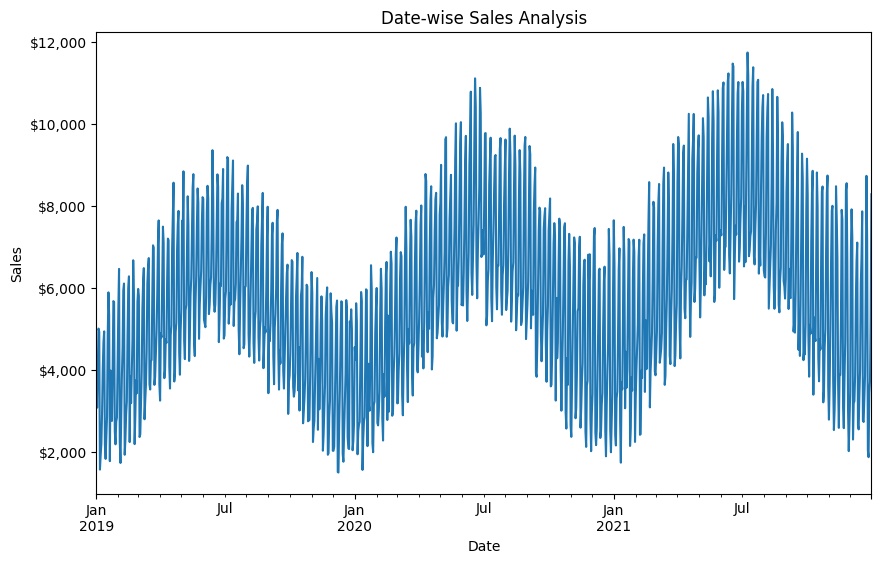

In [28]:
# Date-wise sales analysis

# Check if 'date' is not the index
if not isinstance(df.index, pd.DatetimeIndex):
    # Convert 'date' column to datetime format
    df['date'] = pd.to_datetime(df['date'])

    # Set the 'date' column as the index of the dataframe
    df.set_index('date', inplace=True)

# Resample the data by date and sum the sales for each date
df_resampled = df['sales'].resample('D').sum()

# Plot the data
plt.figure(figsize = (10,6))
df_resampled.plot()
plt.title('Date-wise Sales Analysis')
plt.xlabel('Date')
plt.ylabel('Sales')


# Format y-axis as dollar currency
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

plt.show()


Notes: Overall, sales are consistently highest in the summer and lowest in the winter. 

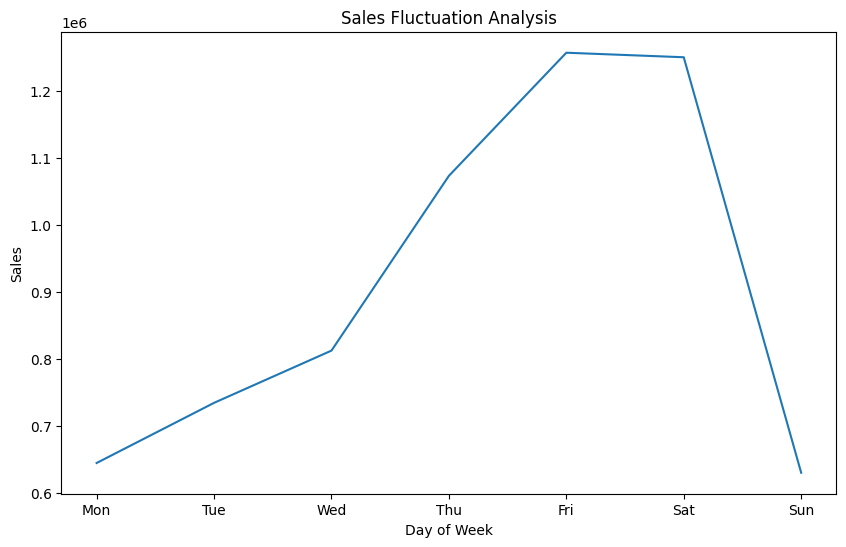

In [29]:
# Sales Fluctuation Analysis

# Create a new column 'day_of_week' that represents the day of the week
df['day_of_week'] = df.index.dayofweek

# Group by 'day_of_week' and sum the sales for each group
df_grouped = df.groupby('day_of_week')['sales'].sum()

# Plot the data
plt.figure(figsize = (10,6))
df_grouped.plot()
plt.title('Sales Fluctuation Analysis')
plt.xlabel('Day of Week')
plt.ylabel('Sales')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

Notes: Not surprisingly, sales are highest on the weekends. 

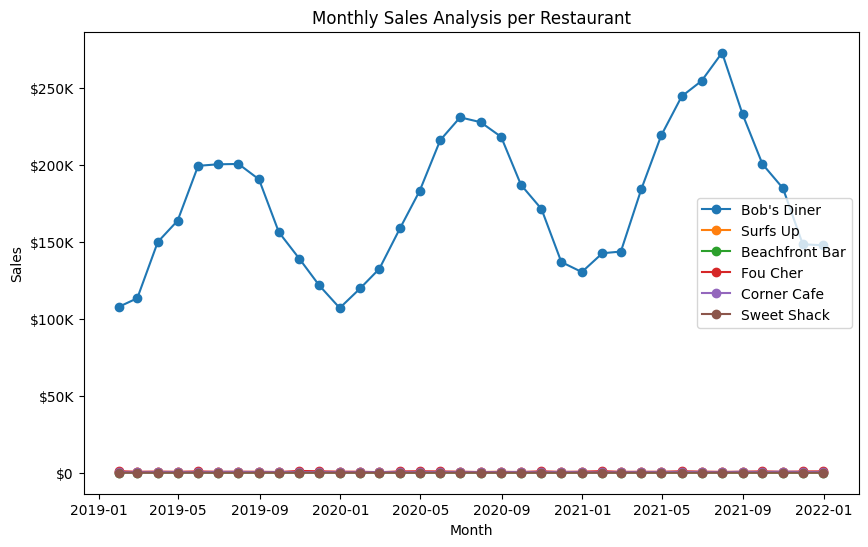

In [30]:
# Monthly Sales Trends - by restaurant and items

# Sales by restaurant
# Function to format y-values as dollars
def currency(x, pos):
    'The two args are the value and tick position'
    if x >= 1000:
        return '${:1.0f}K'.format(x*1e-3)
    else:
        return '${:1.0f}'.format(x)

formatter = ticker.FuncFormatter(currency)

# Get the unique restaurants
restaurants = df['restaurant'].unique()

# Create a new figure
fig, ax = plt.subplots(figsize=(10,6))

# Loop over the restaurants
for restaurant in restaurants:
  
    # Filter the data for the current restaurant
    df_restaurant = df[df['restaurant'] == restaurant]
    
    # Resample the data by month and sum the sales for each month
    df_resampled = df_restaurant['sales'].resample('M').sum()
    
    # Plot the data
    ax.plot(df_resampled.index, df_resampled, 'o-', label=restaurant)

# Set the title and labels
ax.set_title('Monthly Sales Analysis per Restaurant')
ax.set_xlabel('Month')
ax.set_ylabel('Sales')
ax.yaxis.set_major_formatter(formatter)

# Add a legend
ax.legend()

# Show the plot
plt.show()

**Notes**: Bob's Diner exhibits significantly higher total sales compared to other locations. It is essential to investigate this anomaly to ensure it is not due to data inaccuracies.

Additionally, this graph of individual restaurant data reveals that Bob's Diner's disproportionately high sales figures skew the overall date-wise sales analysis, making it unrepresentative of the sales patterns of other restaurants.

In [31]:
# Examining the restaurants separately to see if the data can tell us why the trends for Bobs Diner are so much higher

# Group by 'restaurant' and sum the 'sales' for each group
df_grouped = df.groupby('restaurant')['sales'].sum()

# Print the result
print(df_grouped)

restaurant
Beachfront Bar       3796.20
Bob's Diner       6337275.69
Corner Cafe         16551.43
Fou Cher            27885.37
Surfs Up            15651.49
Sweet Shack          2578.27
Name: sales, dtype: float64


In [32]:
# Counting how many menu items each restaurant has
# Group by 'restaurant' and count the unique 'item_name' for each group
df_unique_items = df.groupby('restaurant')['item_name'].nunique()

# Print the result
print(df_unique_items)

restaurant
Beachfront Bar     6
Bob's Diner       24
Corner Cafe       24
Fou Cher          28
Surfs Up          10
Sweet Shack        8
Name: item_name, dtype: int64


In [33]:
# Highest selling items at Bob's Diner

# Filter the data for "Bob's Diner"
df_bobs_diner = df[df['restaurant'] == "Bob's Diner"]

# Group by 'item_name' and sum the 'sales' for each group
df_grouped = df_bobs_diner.groupby('item_name')['sales'].sum()

# Sort the grouped data in descending order and take the first 7 items
top_5_items = df_grouped.sort_values(ascending=False).head(7)

print(top_5_items)

item_name
Amazing pork lunch                 1094500.99
Blue Ribbon Beef Entree             999628.38
Amazing Steak Dinner with Rolls     909878.38
Sea Bass with Vegetables Dinner     685371.25
Strawberry Smoothy                  683013.93
Mutton Dinner                       569937.60
Frozen Milky Smoothy                330597.90
Name: sales, dtype: float64


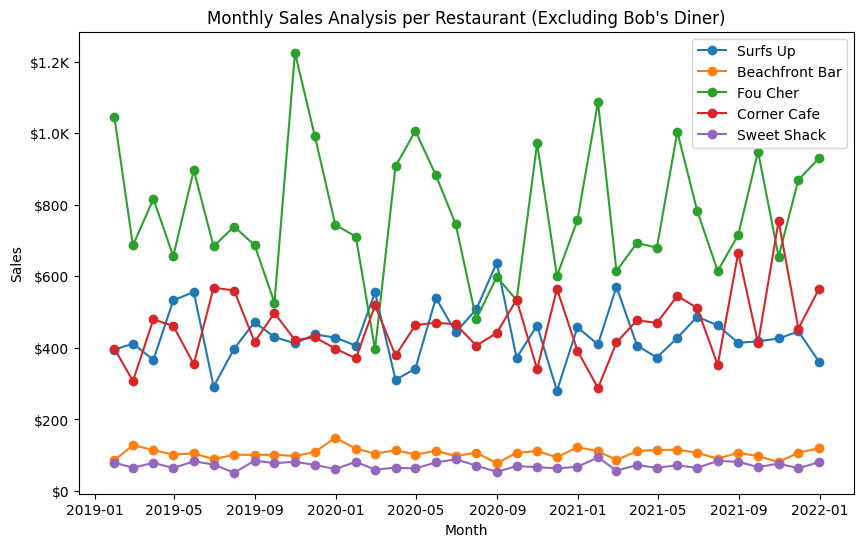

In [34]:
# Plot the restuarants without Bob's Diner to analyze their sales trends

# Function to format y-values as dollars
def currency(x, pos):
    'The two args are the value and tick position'
    if x >= 1000:
        return '${:1.1f}K'.format(x*1e-3)  # Adjusted to show one decimal place for thousands
    else:
        return '${:1.0f}'.format(x)

formatter = ticker.FuncFormatter(currency)

# Get the unique restaurants
restaurants = df['restaurant'].unique()

# Create a new figure
fig, ax = plt.subplots(figsize=(10,6))

# Loop over the restaurants
for restaurant in restaurants:
    # Skip "Bob's Diner"
    if restaurant == "Bob's Diner":
        continue
    
    # Filter the data for the current restaurant
    df_restaurant = df[df['restaurant'] == restaurant]
    
    # Resample the data by month and sum the sales for each month
    df_resampled = df_restaurant['sales'].resample('M').sum()
    
    # Plot the data
    ax.plot(df_resampled.index, df_resampled, 'o-', label=restaurant)

# Set the title and labels
ax.set_title('Monthly Sales Analysis per Restaurant (Excluding Bob\'s Diner)')
ax.set_xlabel('Month')
ax.set_ylabel('Sales')
ax.yaxis.set_major_formatter(formatter)

# Add a legend
ax.legend()

# Show the plot
plt.show()

**Notes**: Fou Cher seems to have the next highest sales, no discernable trends as to the season or months the sales happen the most. Given how low the sales are for Beachfront Bar and Sweet Shack, the recommendation would be to shut them down. 

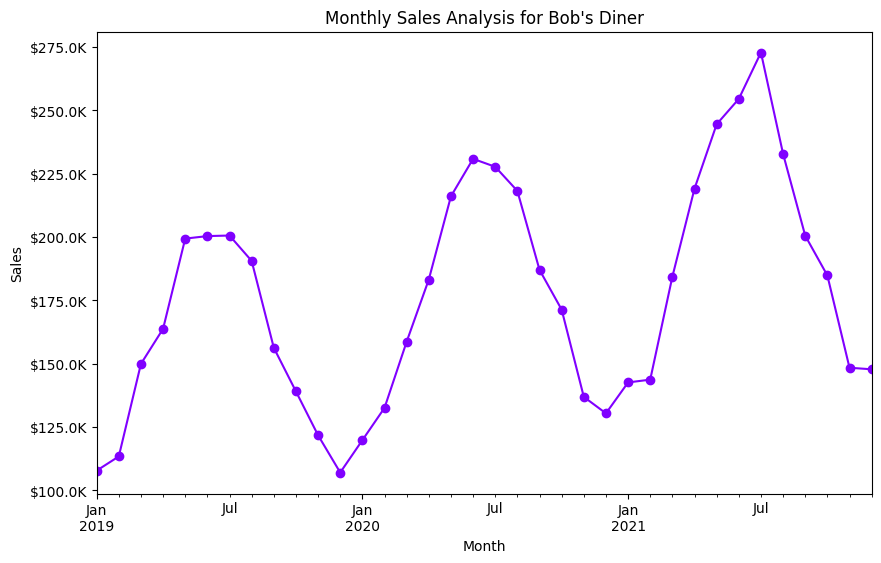

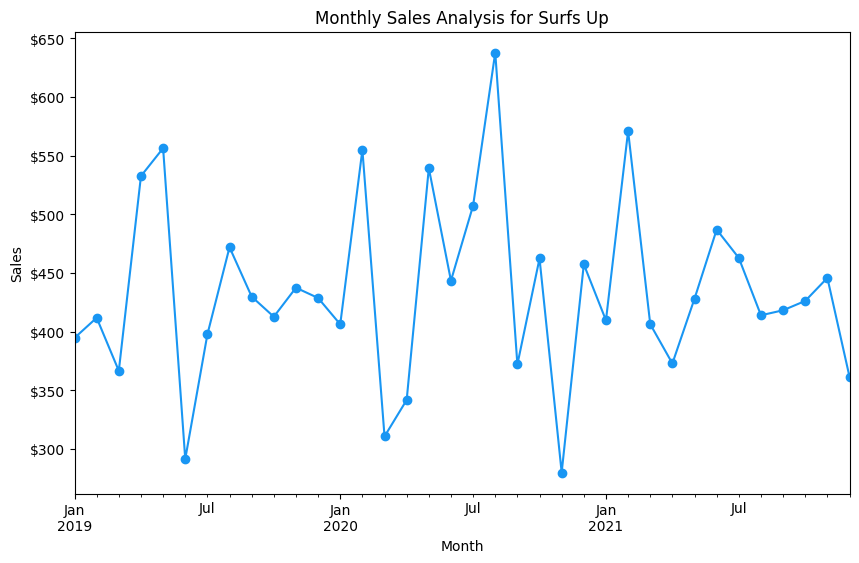

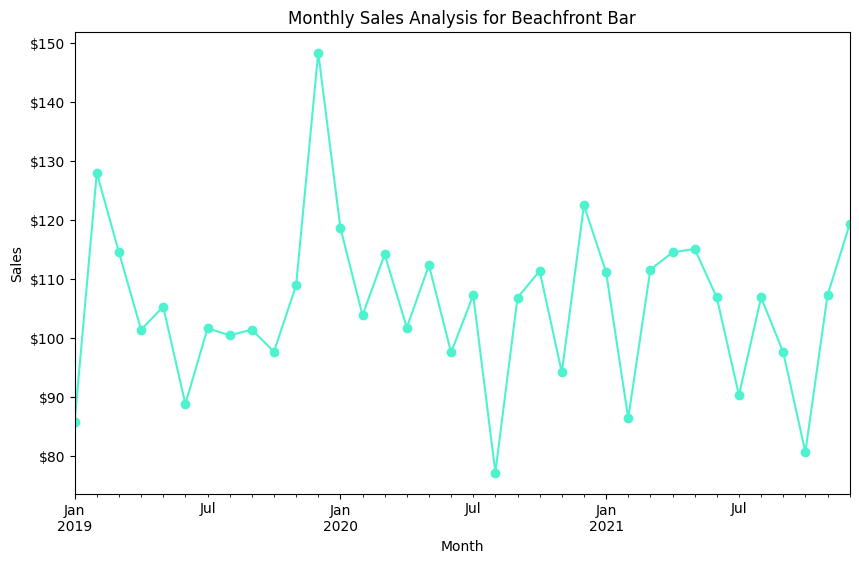

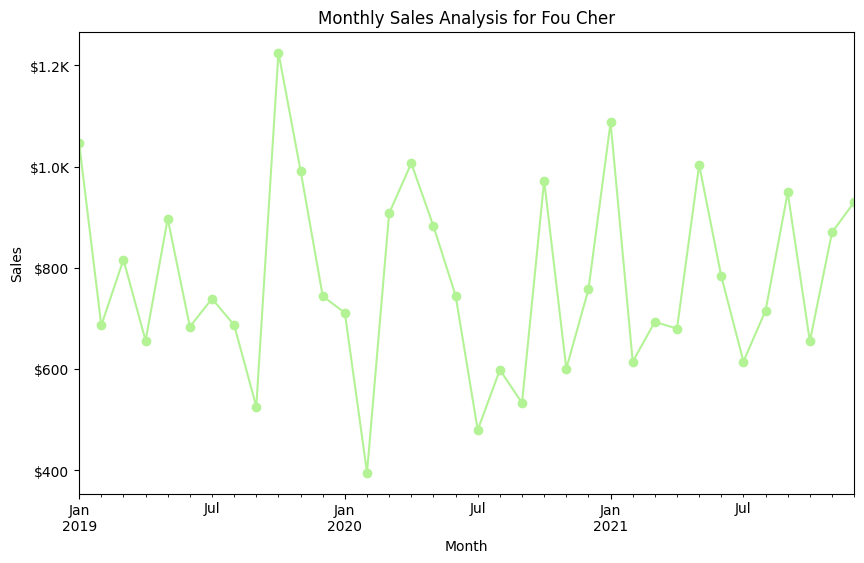

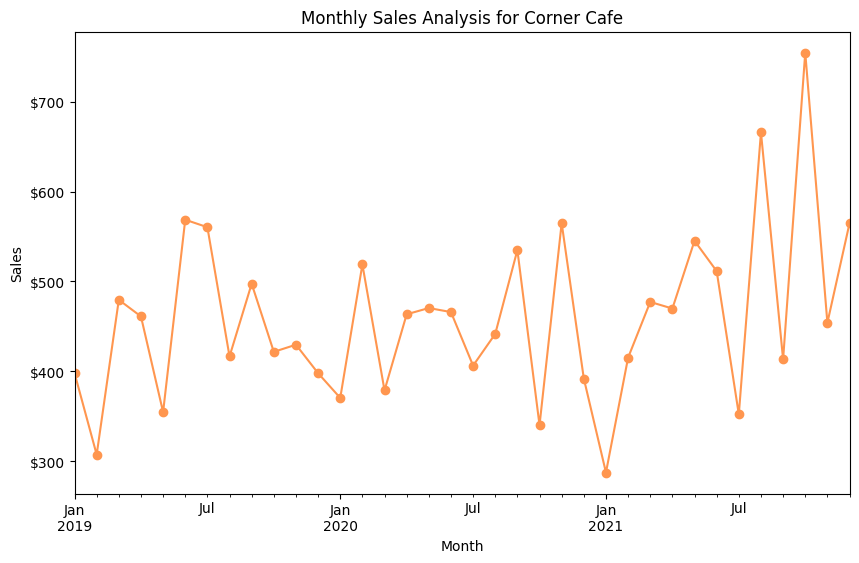

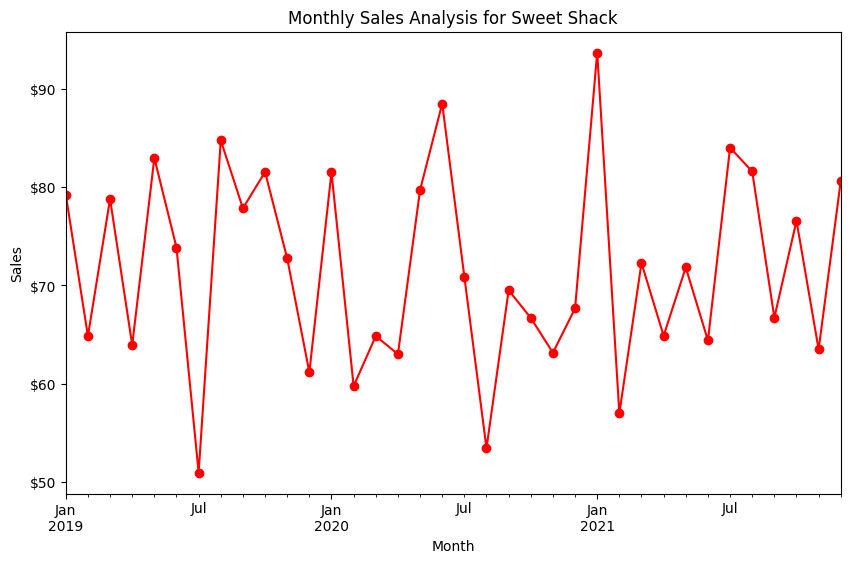

In [35]:
# Plot the monthly sales per restaurant

# Function to format y-values as dollars
def currency(x, pos):
    'The two args are the value and tick position'
    if x >= 1000:
        return '${:1.1f}K'.format(x*1e-3)  # Adjusted to show one decimal place for thousands
    else:
        return '${:1.0f}'.format(x)

formatter = ticker.FuncFormatter(currency)

# Get the unique restaurants
restaurants = df['restaurant'].unique()
colors = cm.rainbow(np.linspace(0, 1, len(restaurants)))

# Loop over the restaurants
for restaurant, color in zip(restaurants, colors):
    # Filter the data for the current restaurant
    df_restaurant = df[df['restaurant'] == restaurant]
    
    # Resample the data by month and sum the sales for each month
    df_resampled = df_restaurant['sales'].resample('M').sum()
    
    # Plot the data
    fig, ax = plt.subplots(figsize = (10,6))
    df_resampled.plot(marker = 'o', color=color, ax=ax)
    ax.yaxis.set_major_formatter(formatter)
    plt.title(f'Monthly Sales Analysis for {restaurant}')
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.show()

**Notes**: The only restaurant showing any discernable pattern in the sales cycle is Bob's Diner. The other restaurants seem to go up and down month to month, with sales being very low at every location besides Bob's Diner. If they were all under one franchise, the advisement would be to close the lowest 3 locations and put more resources into Bob's Diner.

What could help is a further analysis of which items sell well, or do not sell at all, to determine what ingredients to stock and what items to drop off the menu completely.

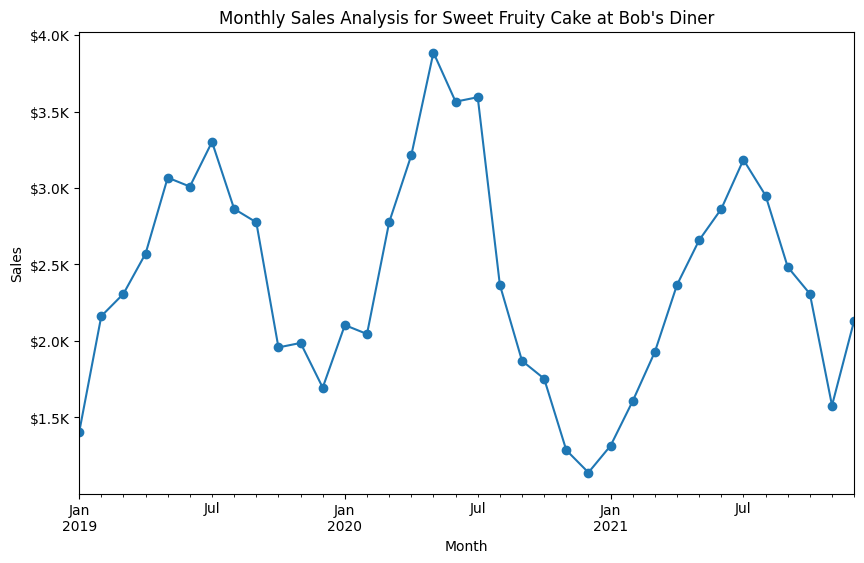

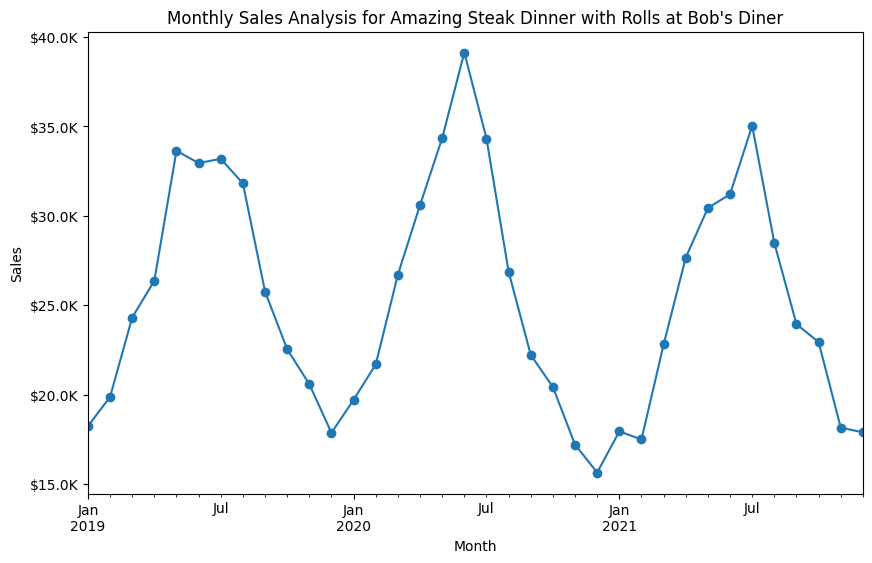

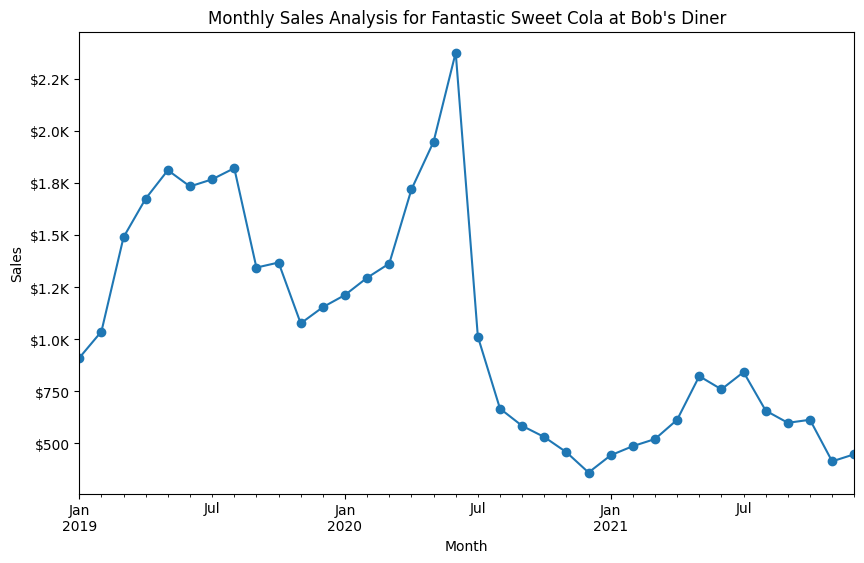

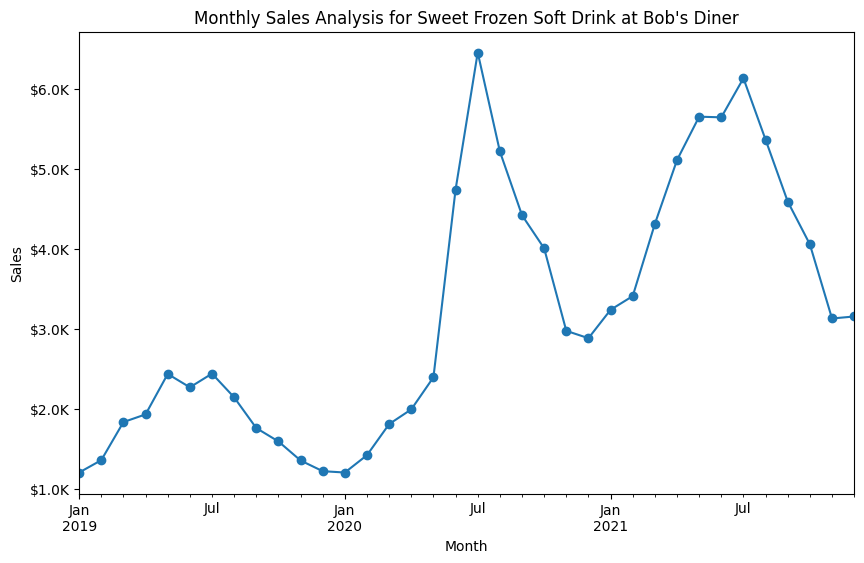

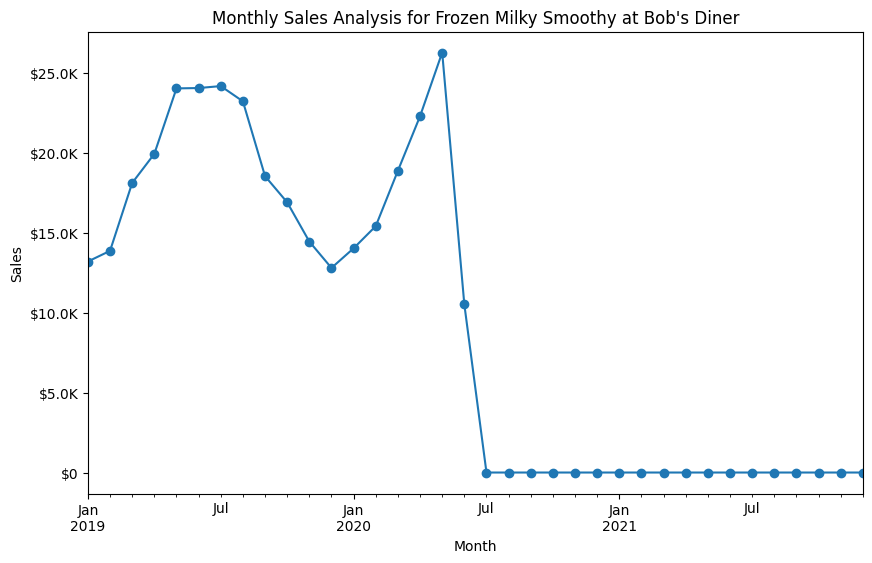

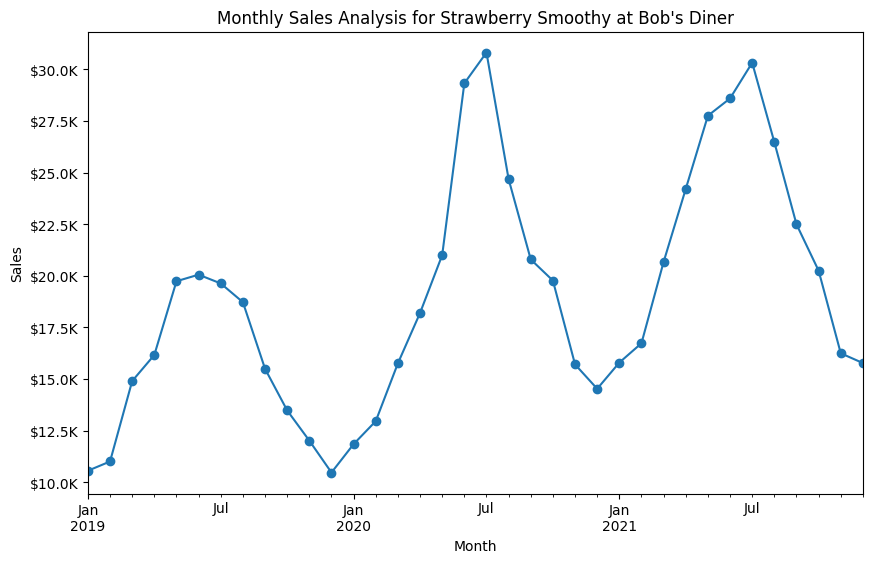

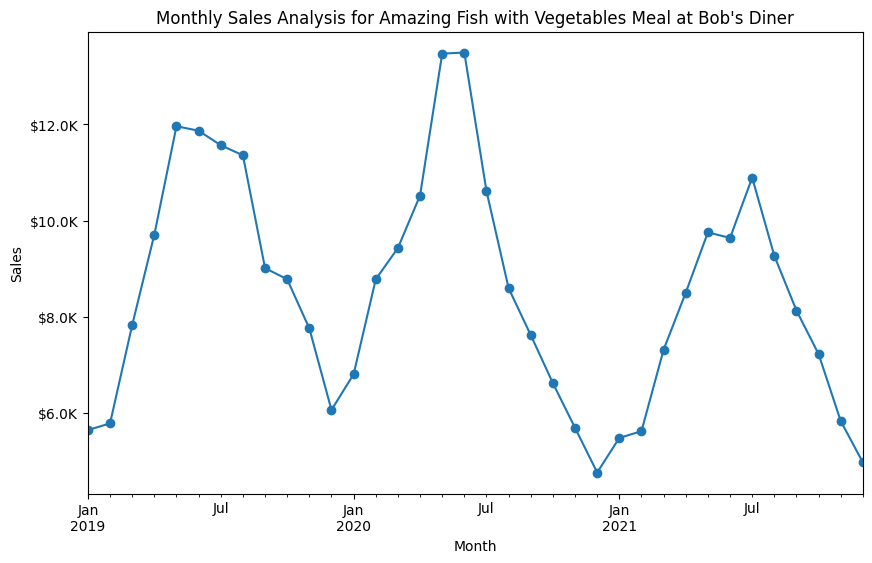

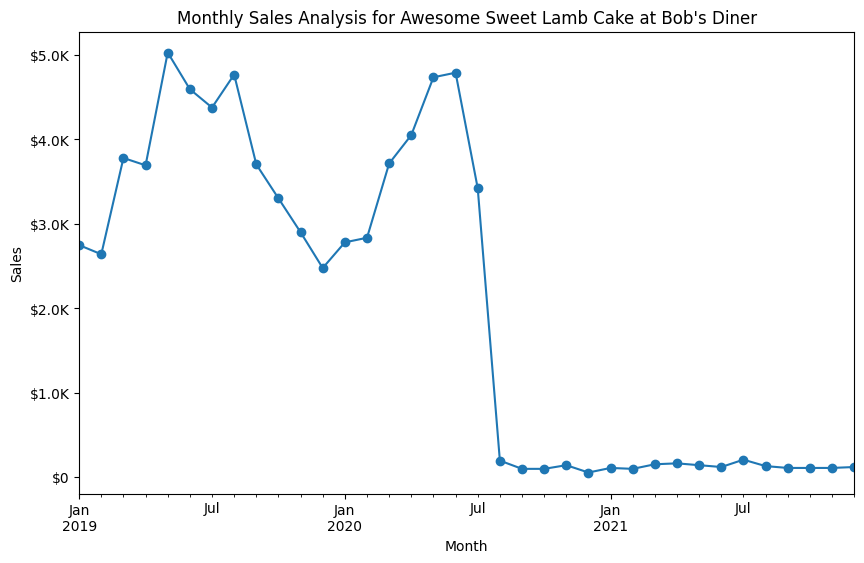

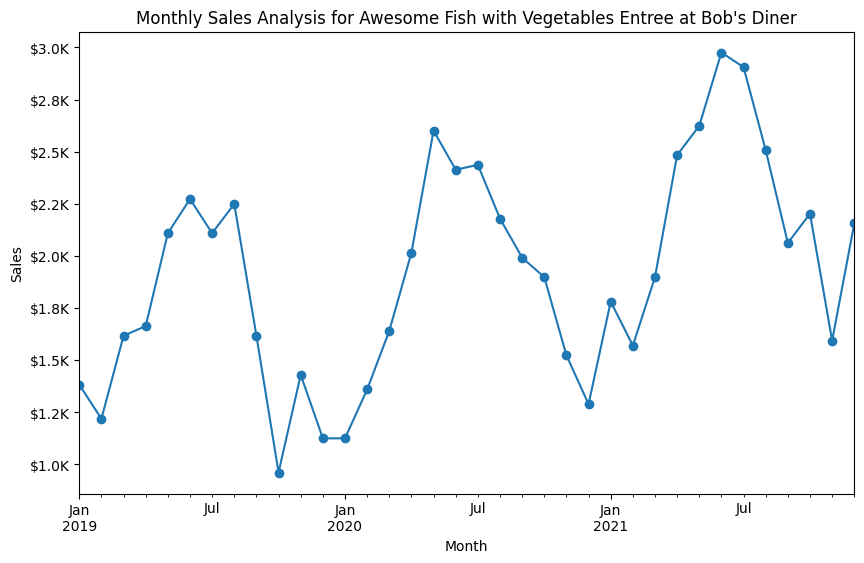

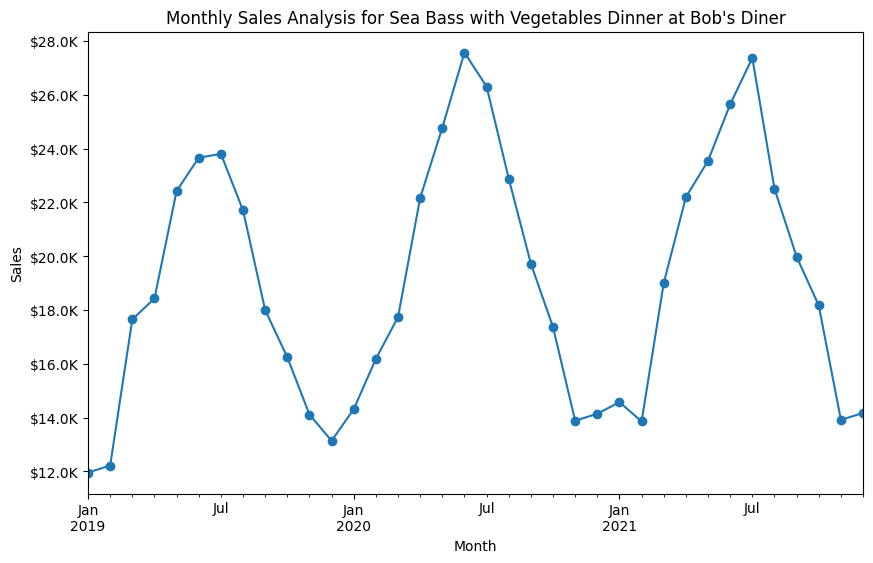

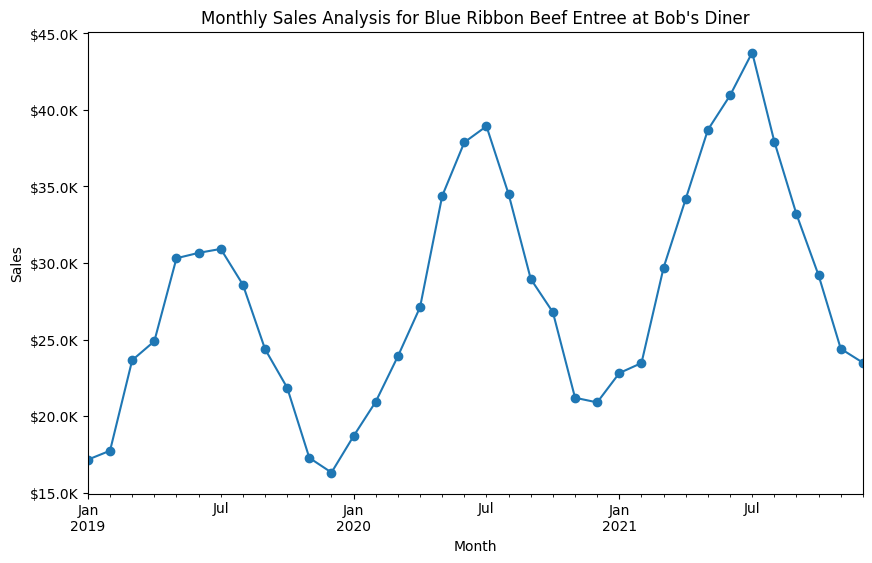

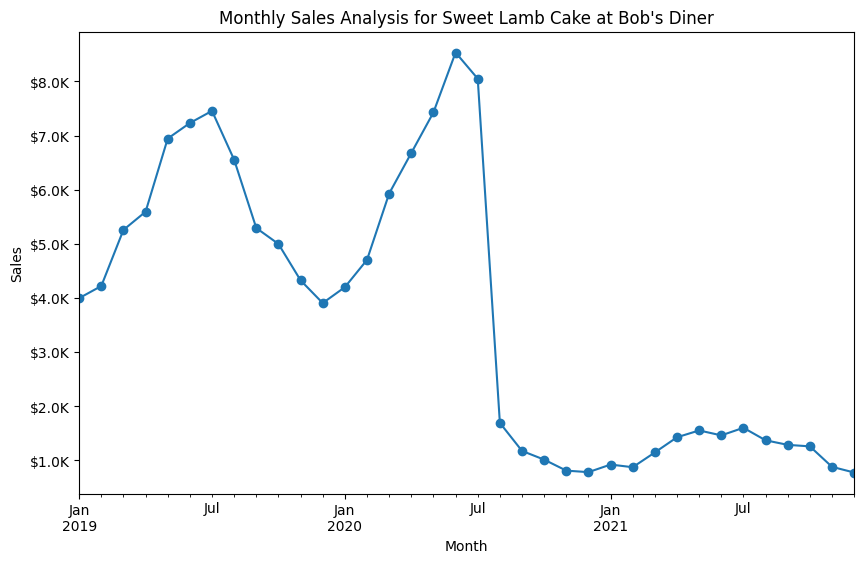

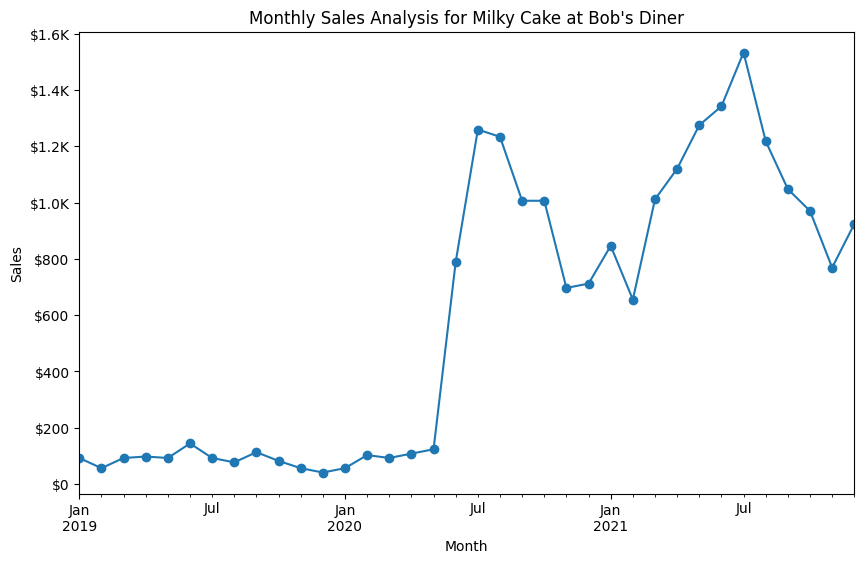

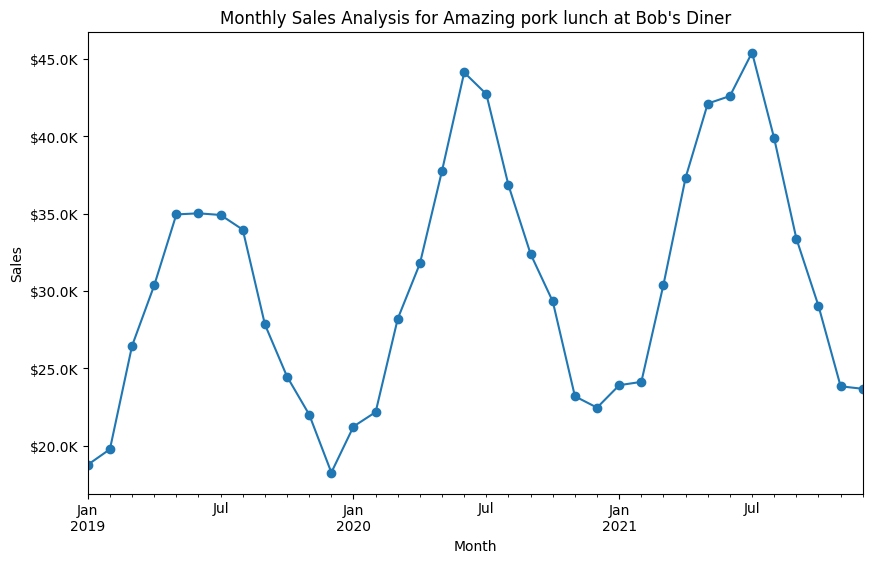

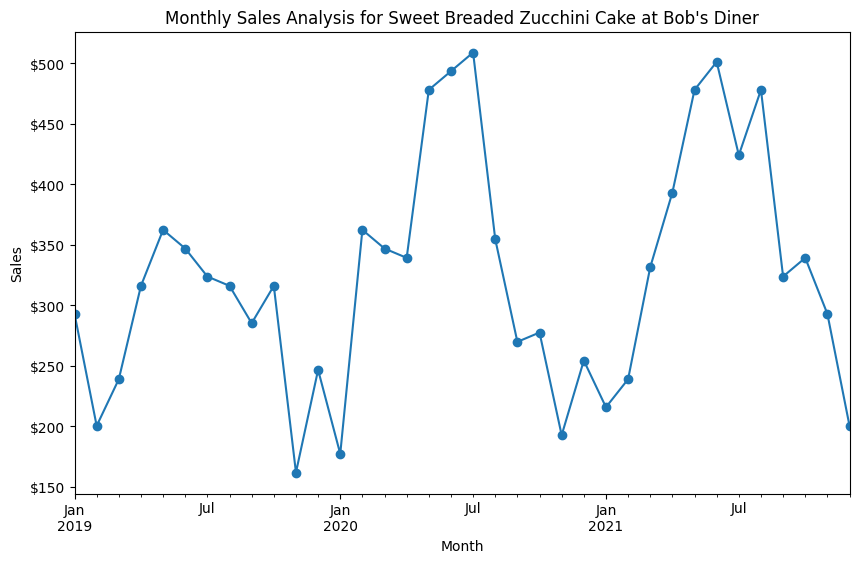

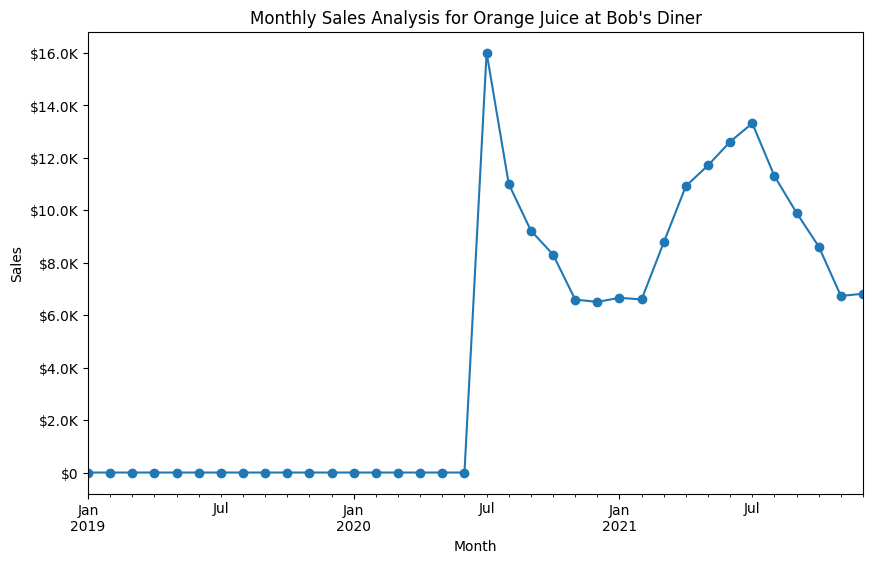

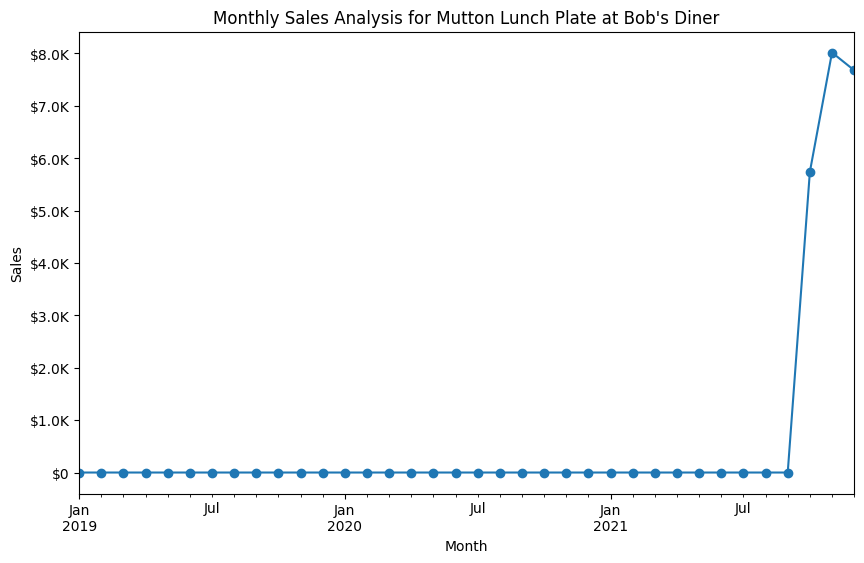

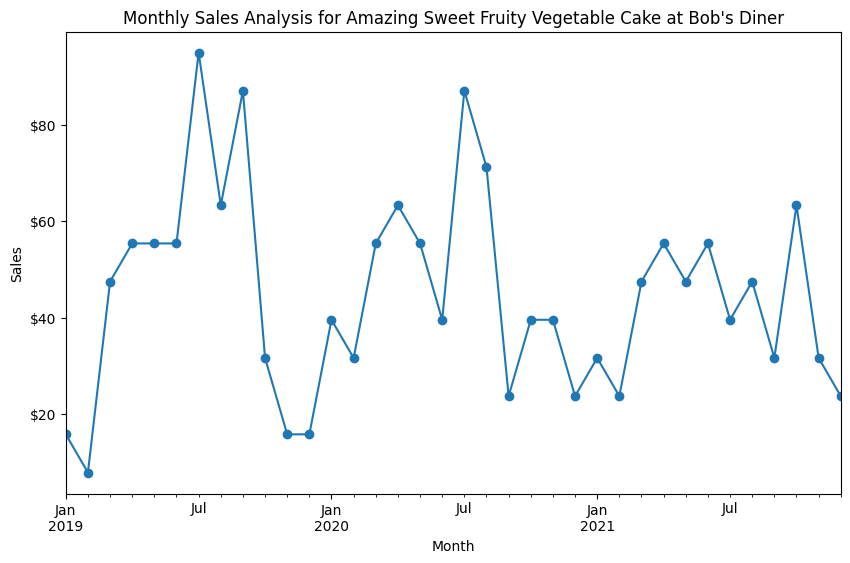

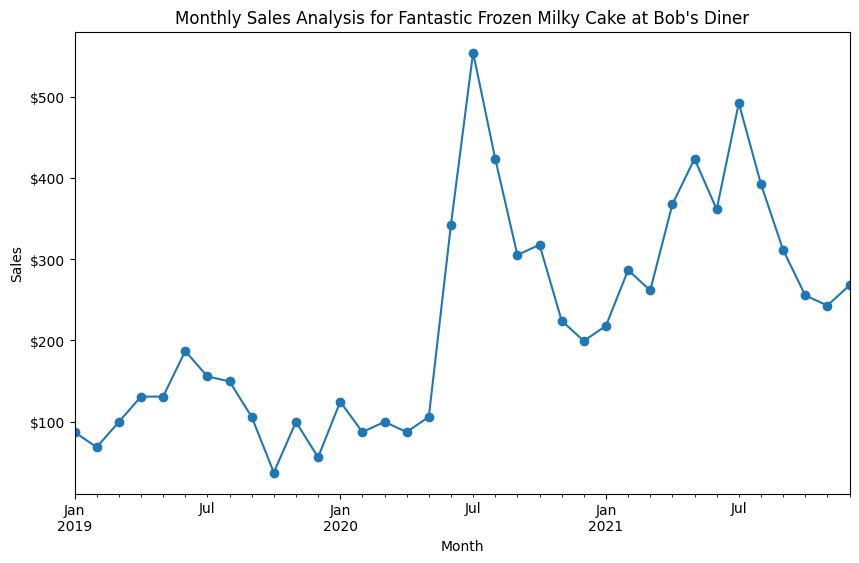

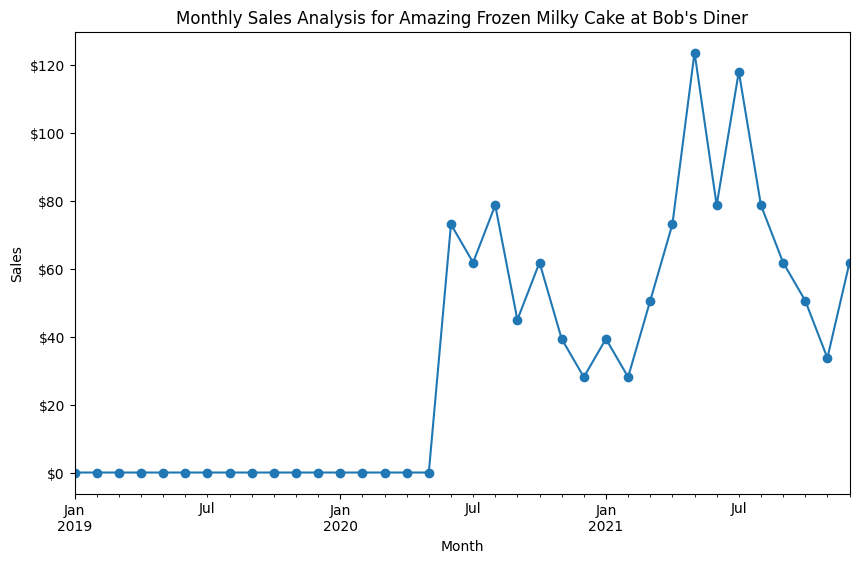

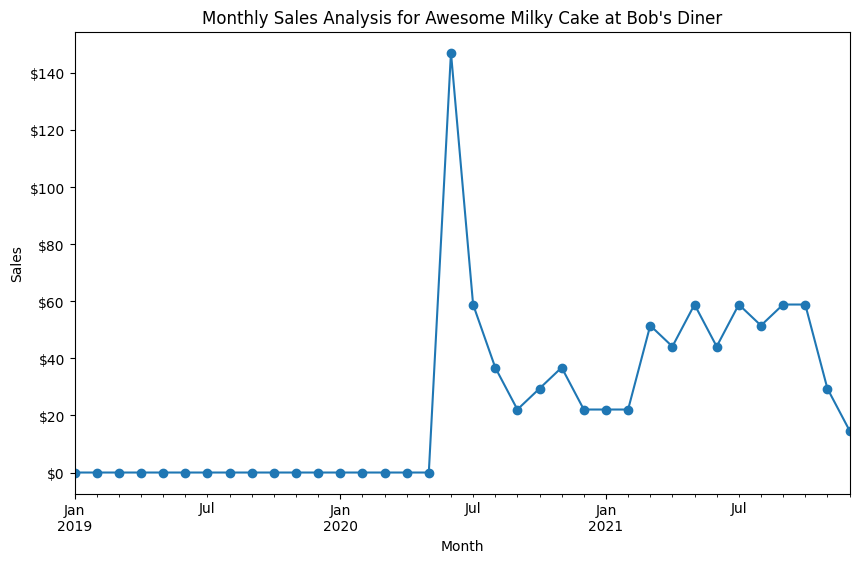

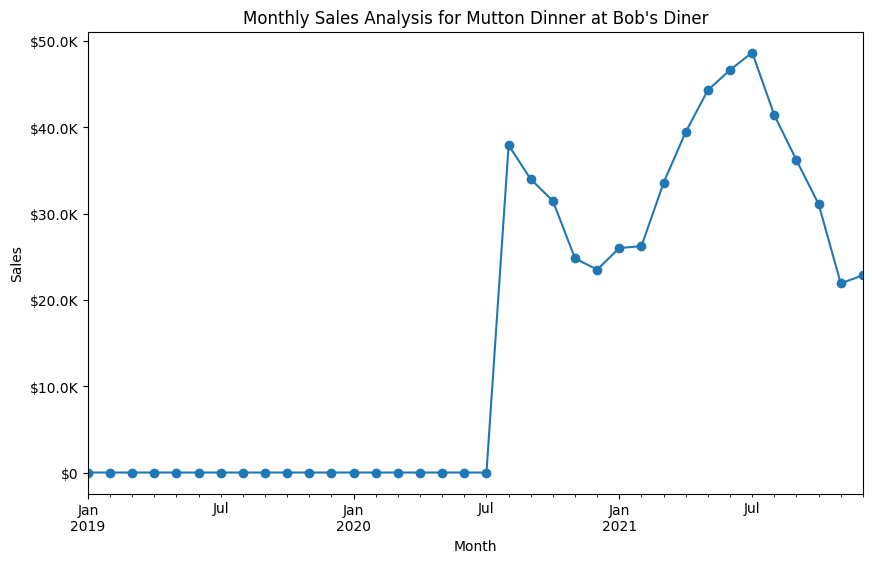

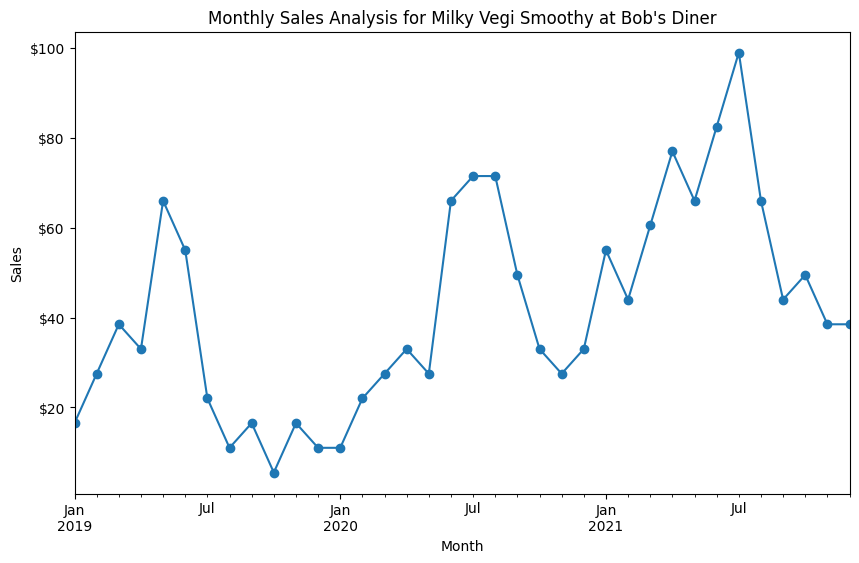

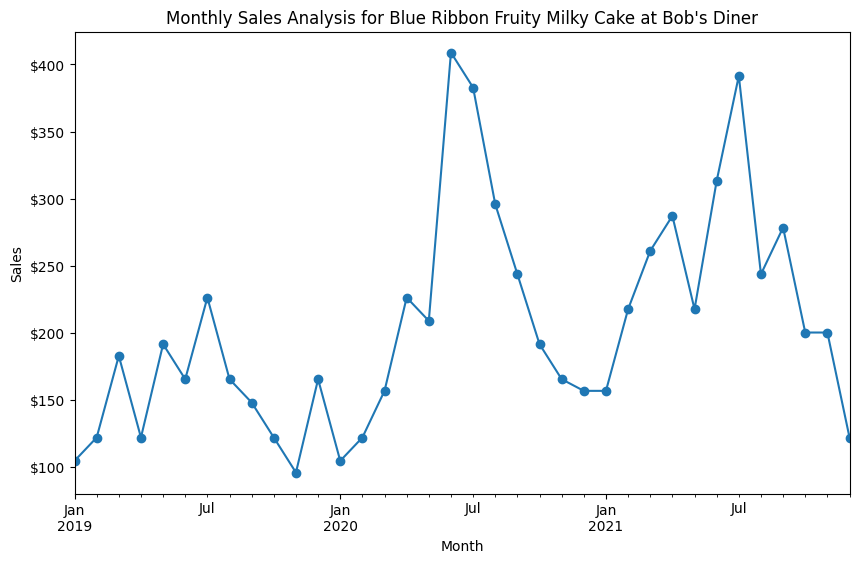

In [36]:
# Plot the item sales by month for "Bob's Diner"
# Function to format y-values as dollars
def currency(x, pos):
    'The two args are the value and tick position'
    if x >= 1000:
        return '${:1.1f}K'.format(x*1e-3)  # Adjusted to show one decimal place for thousands
    else:
        return '${:1.0f}'.format(x)

formatter = ticker.FuncFormatter(currency)

# Filter the DataFrame for "Bob's Diner"
df_bobs_diner = df[df['restaurant'] == "Bob's Diner"]

# Get the unique items sold at "Bob's Diner"
items = df_bobs_diner['item_name'].unique()

# Loop over the items
for item in items:
    # Filter the data for the current item at "Bob's Diner"
    df_item = df_bobs_diner[df_bobs_diner['item_name'] == item]
    
    # Resample the data by month and sum the sales for each month
    df_resampled = df_item['sales'].resample('M').sum()
    
    # Plot the data
    fig, ax = plt.subplots(figsize=(10, 6))
    df_resampled.plot(marker='o', ax=ax)
    ax.yaxis.set_major_formatter(formatter)
    plt.title(f'Monthly Sales Analysis for {item} at Bob\'s Diner')
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.show()
   

**Notes**: There are general sales trends among all items, listed below.

Items which follow the trend of more sales in the summer, less in the winter - sweet fruity cake, amazing steak dinner, strawberry smooothy, amazing fish with vegetables meal, awesome fish with vegetables entree, sea bass with vegetables, blue ribbon beef, and amazing pork lunch.

Items with sales trending down - fantastic sweet cola, frozen milky smoothy, awesome sweet lamb cake, and sweet lamb cake.

Items with sales trending up - sweet frozen soft drink, milky cake, orange juice, mutton lunch, fantastic frozen milky cake, amazing frozen milky cake, awesome milky cake, and mutton dinner.

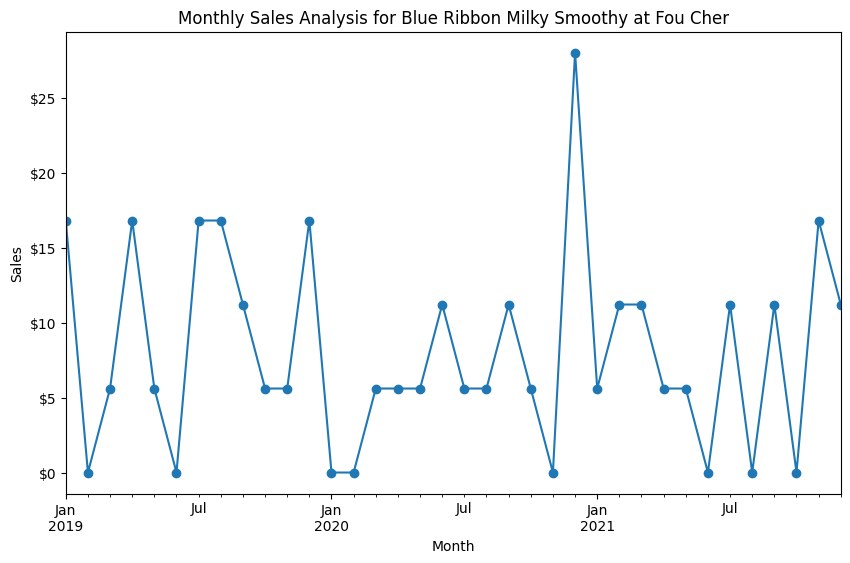

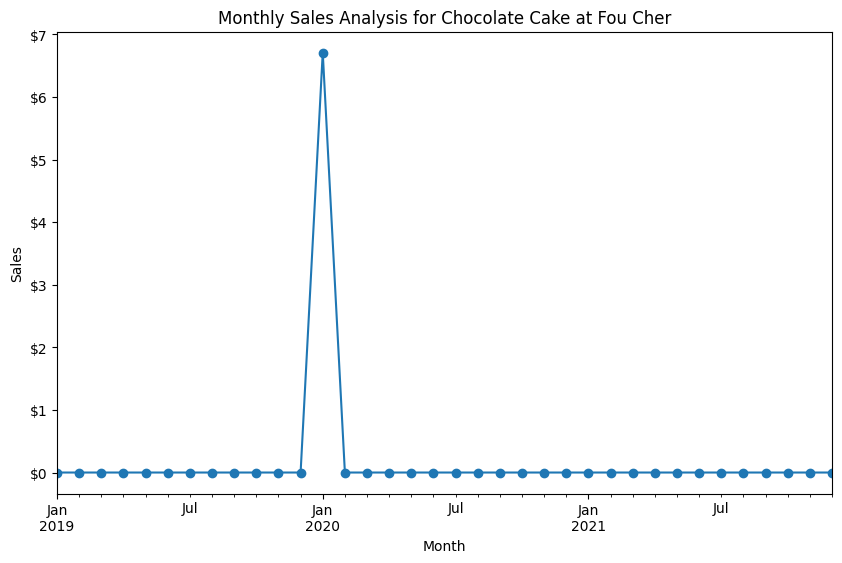

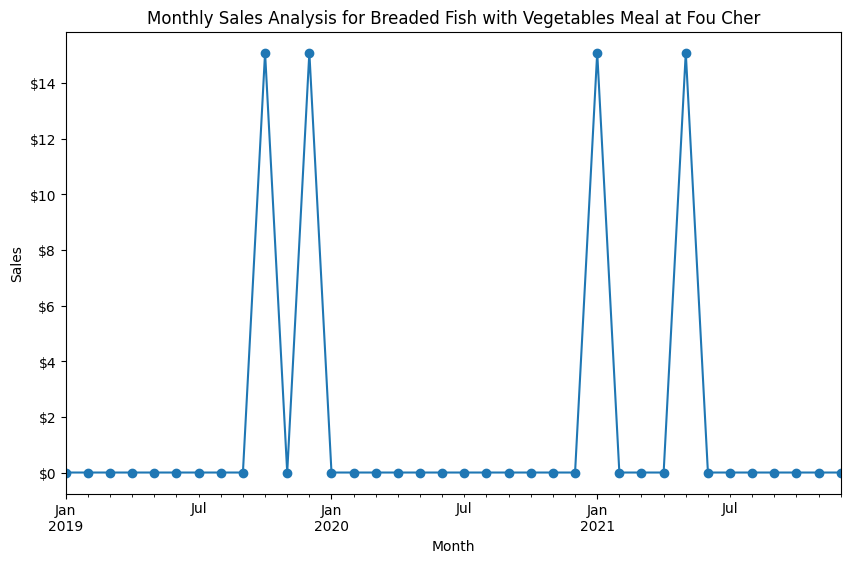

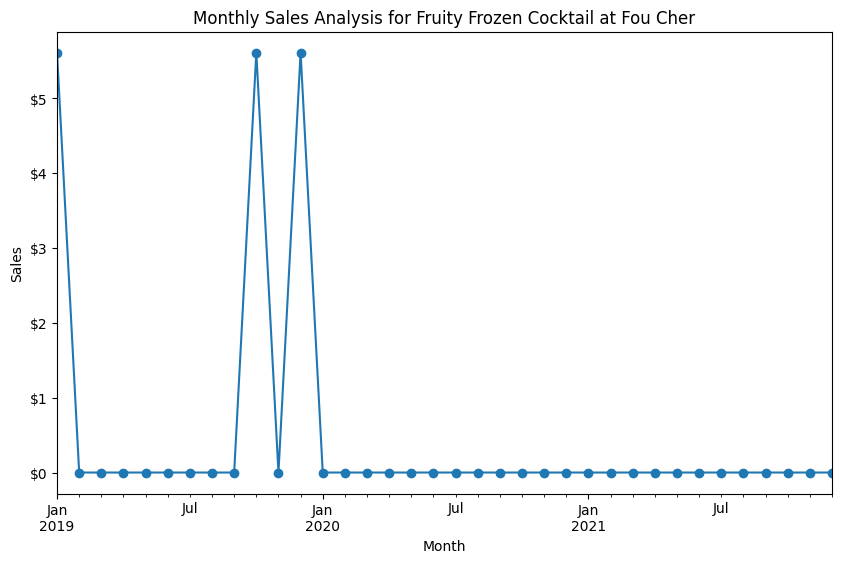

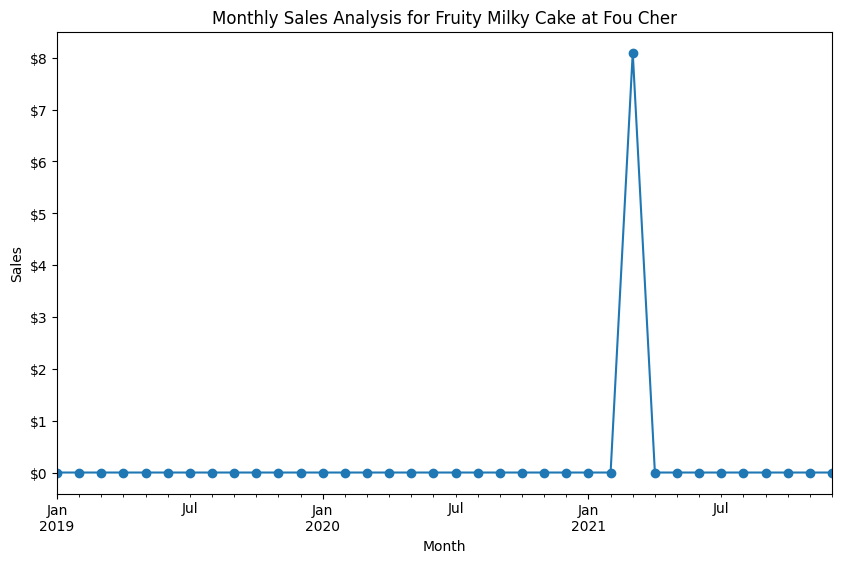

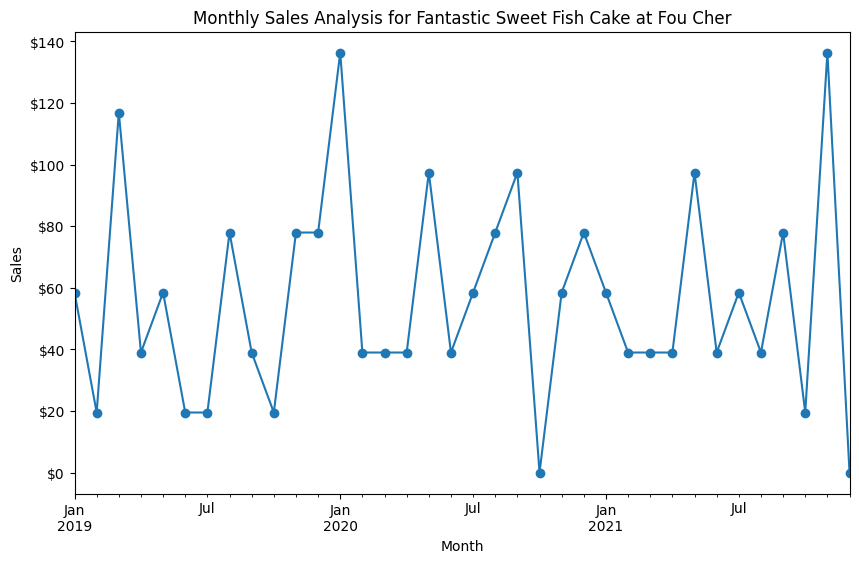

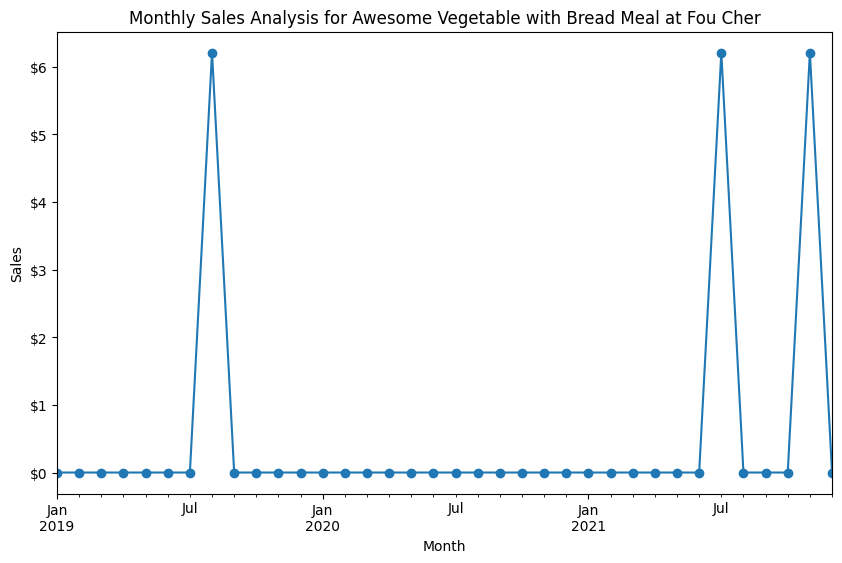

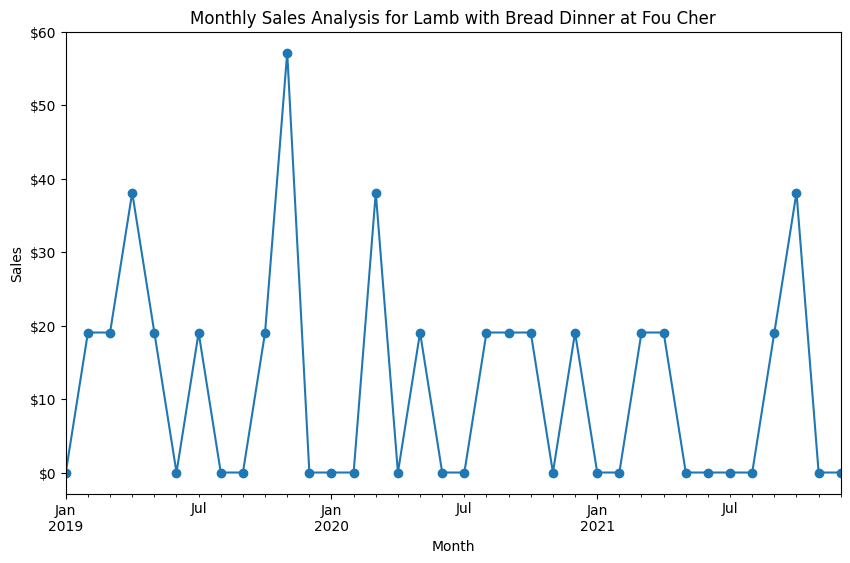

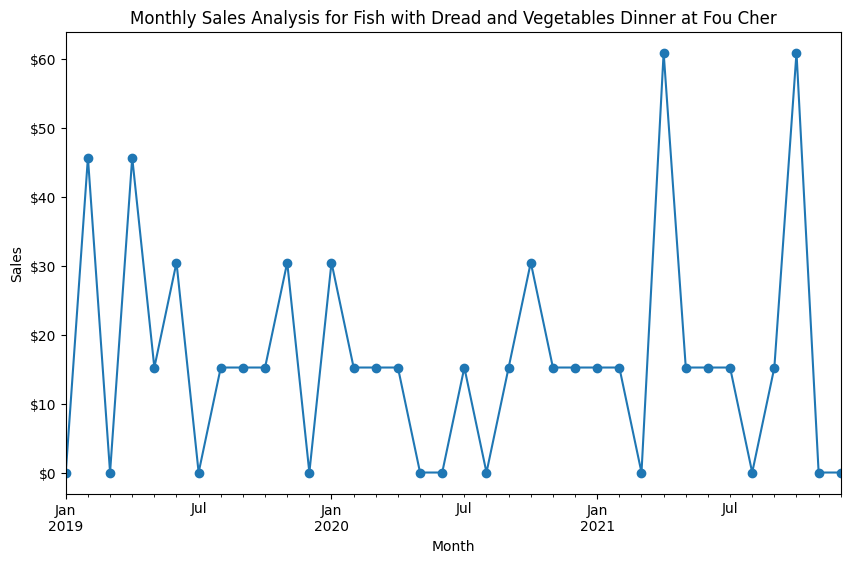

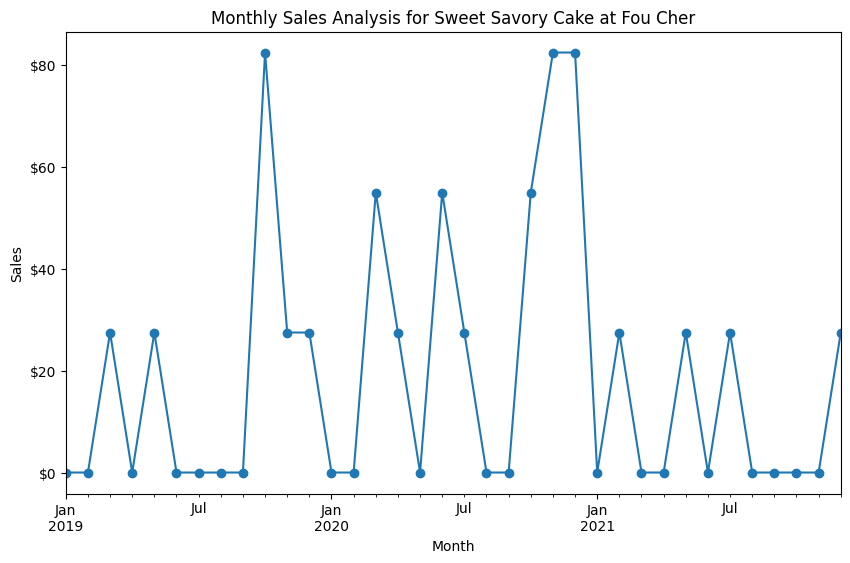

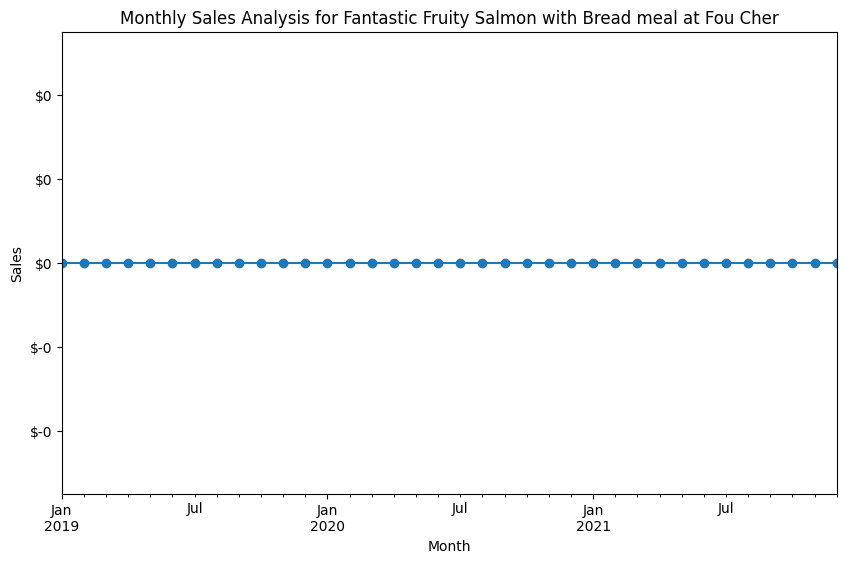

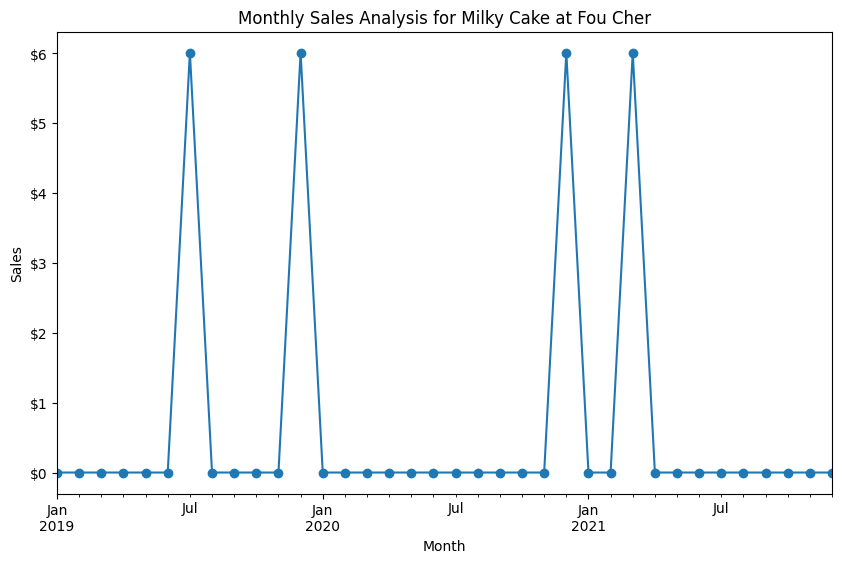

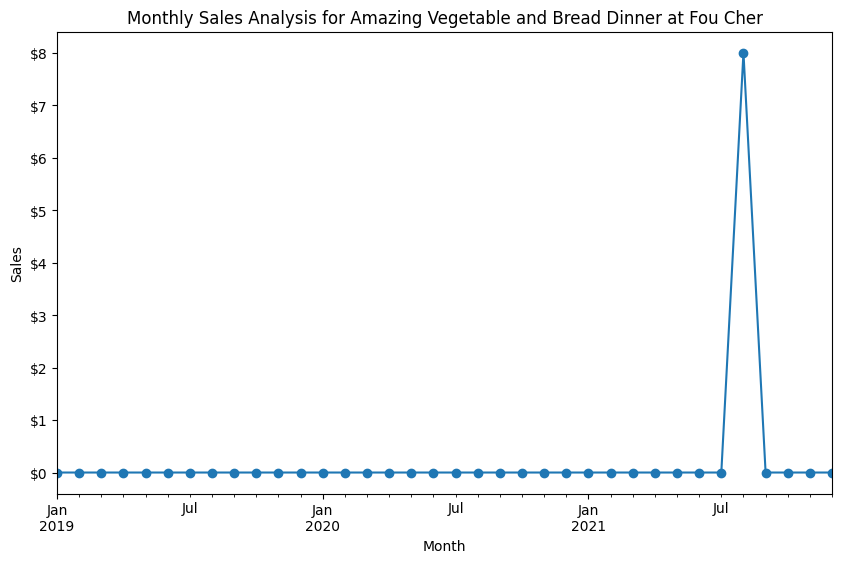

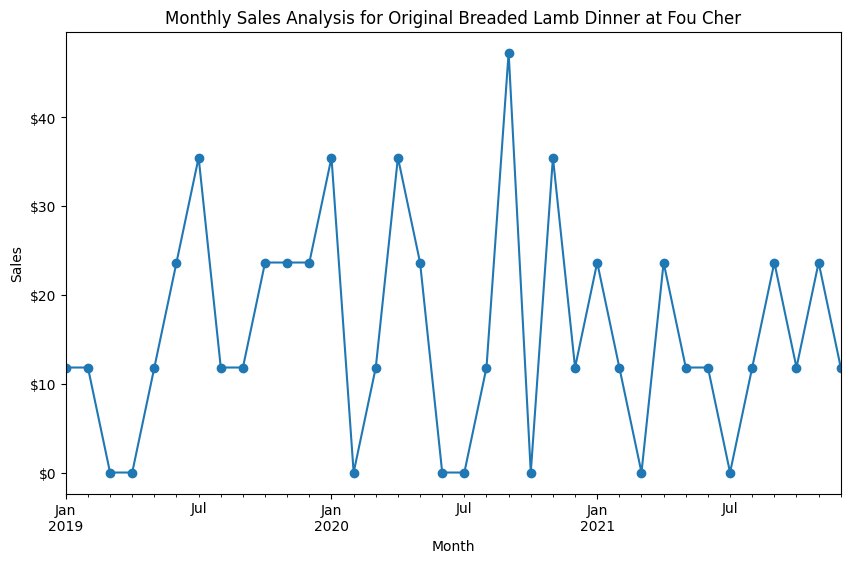

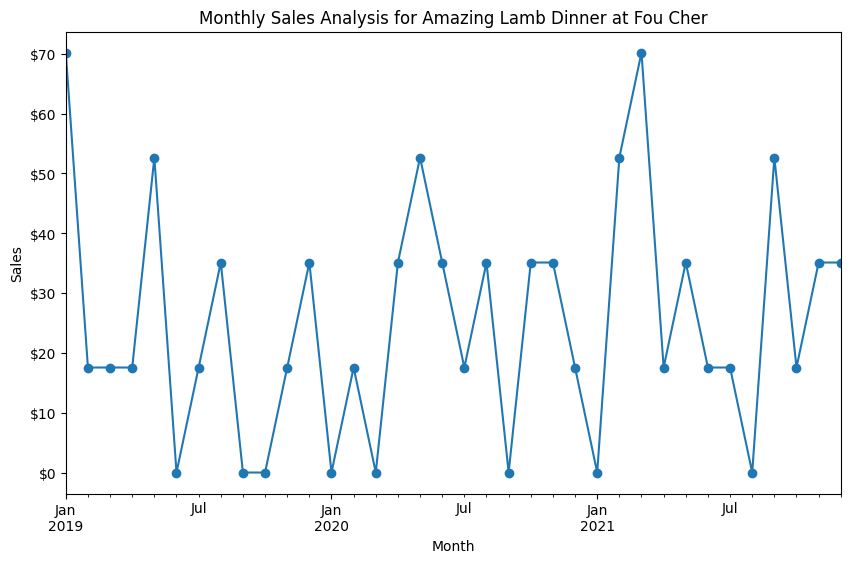

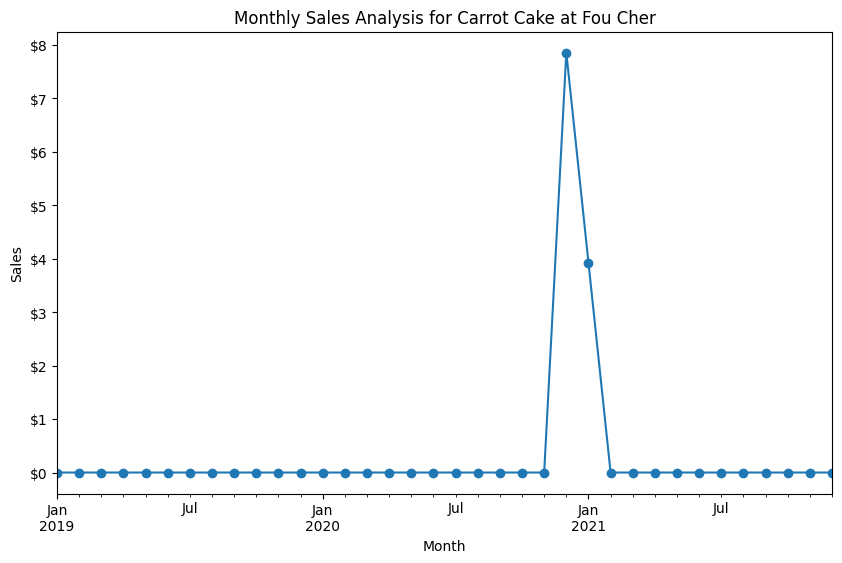

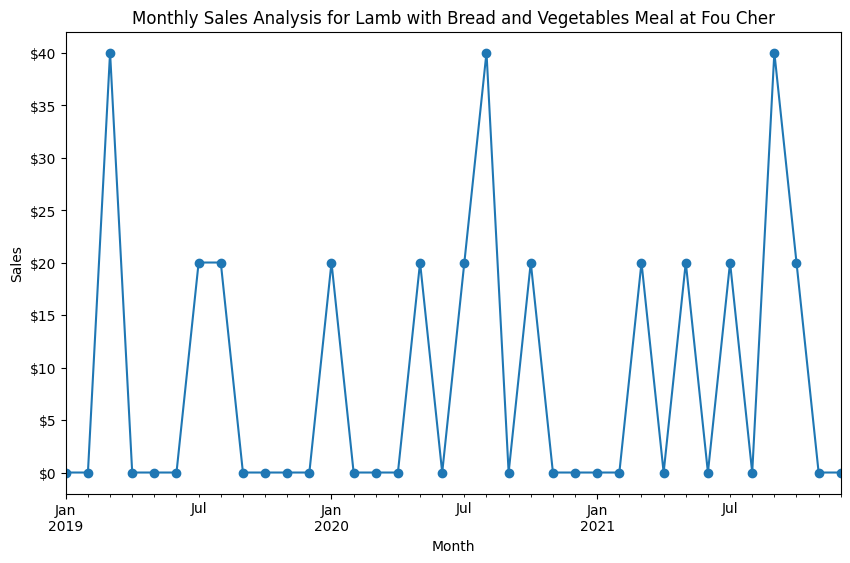

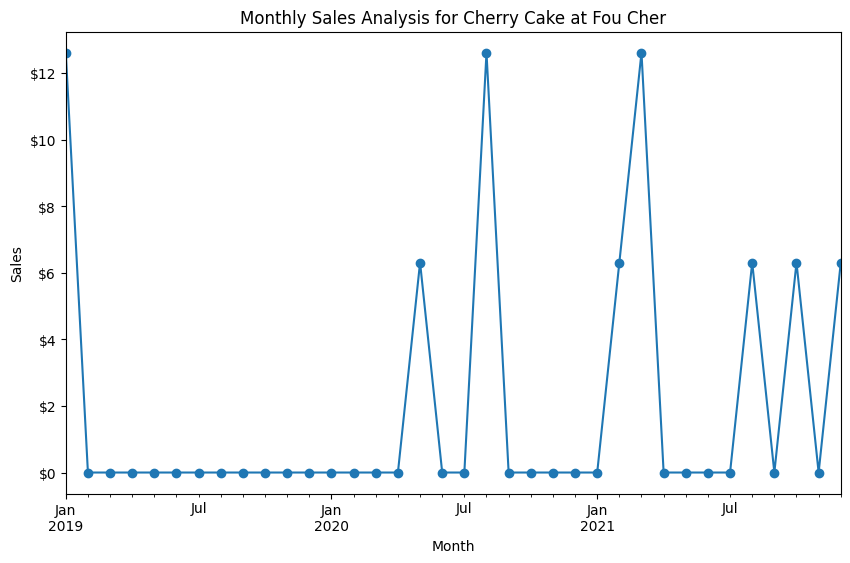

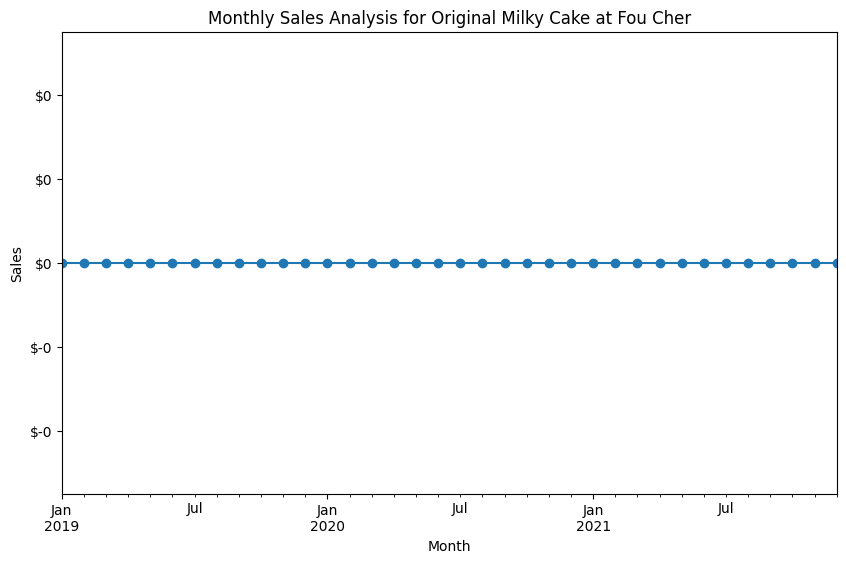

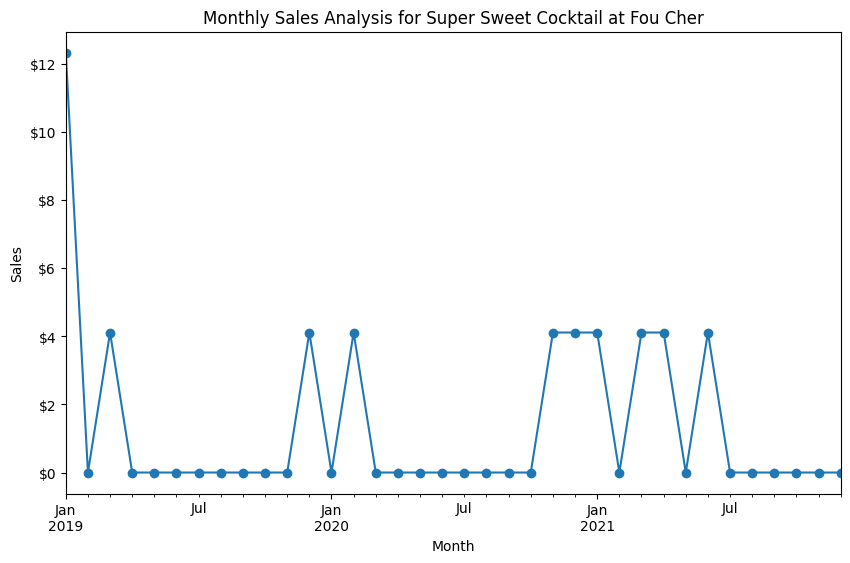

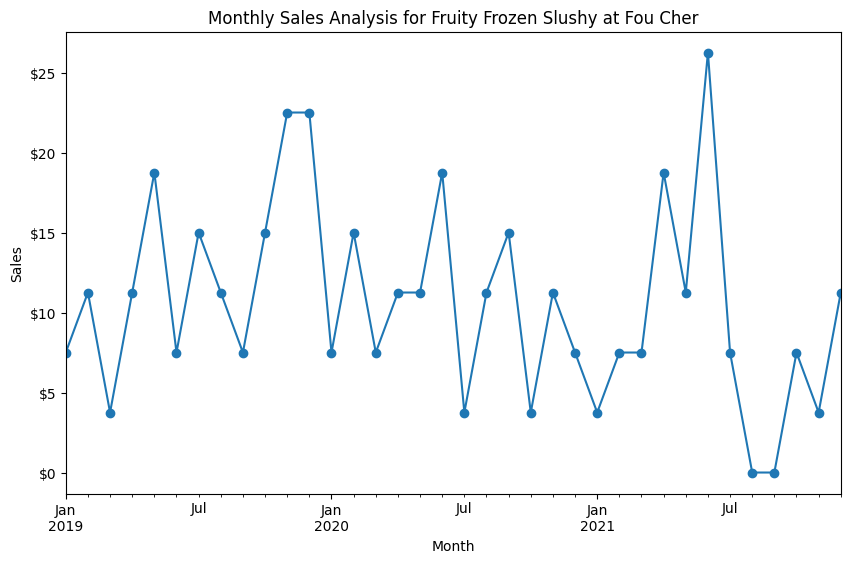

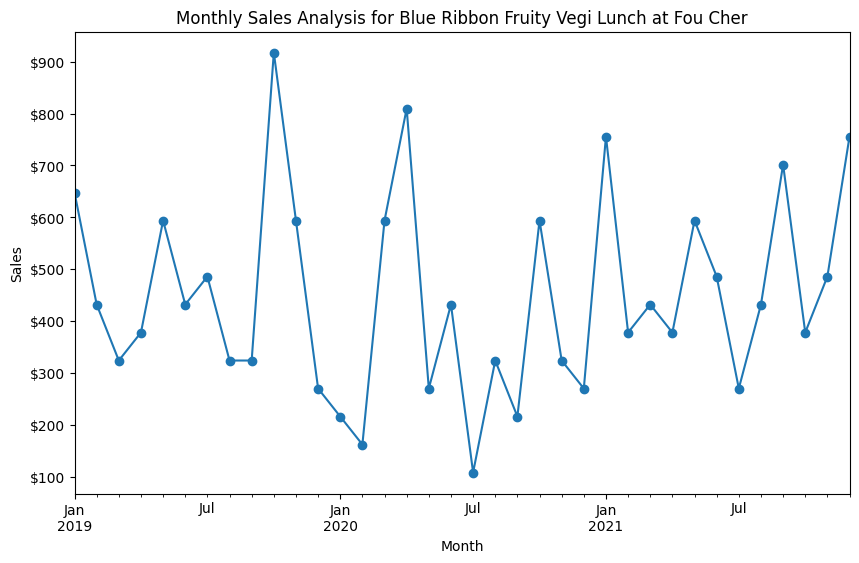

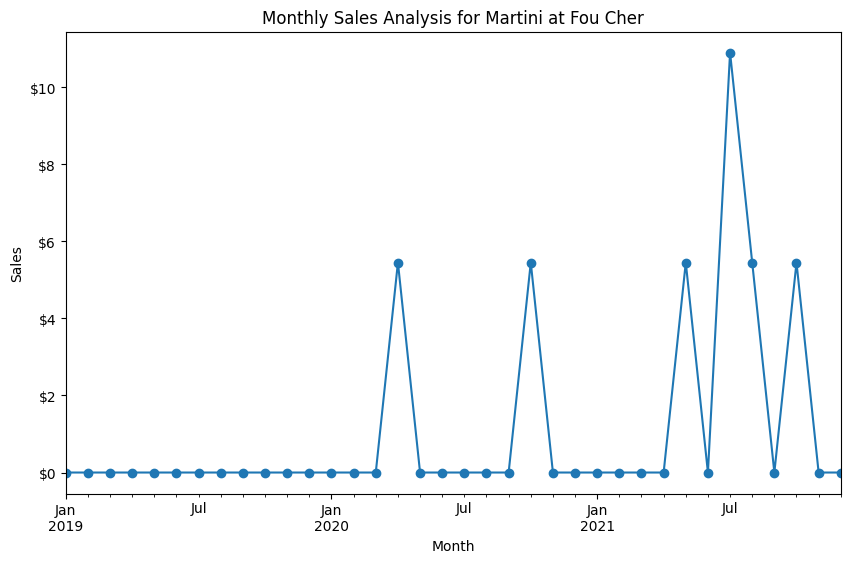

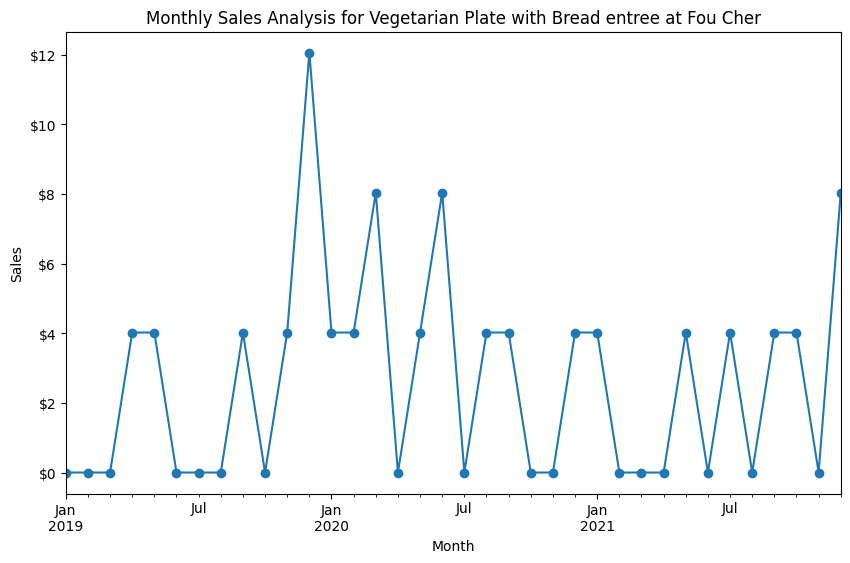

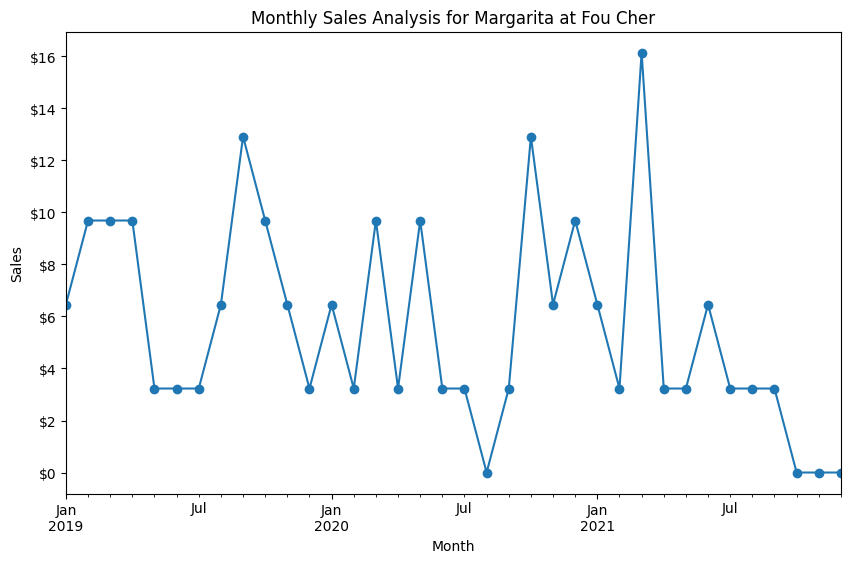

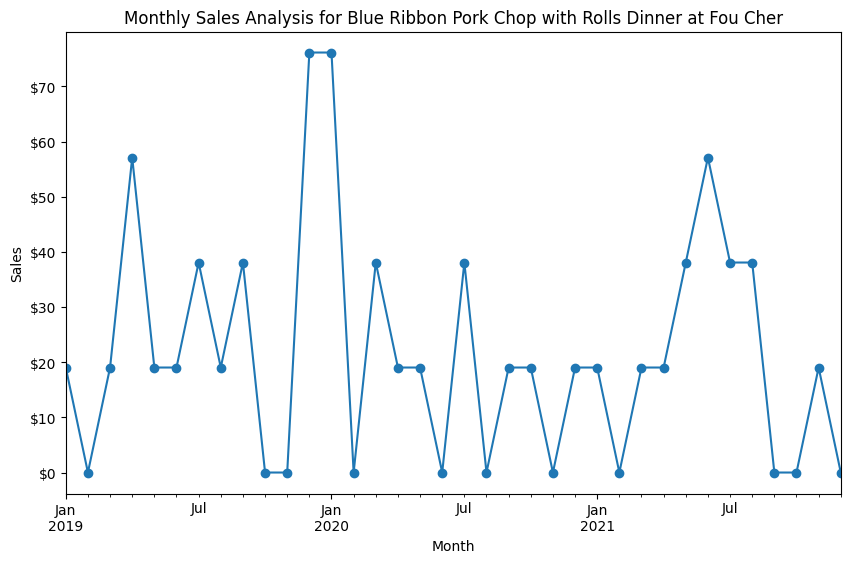

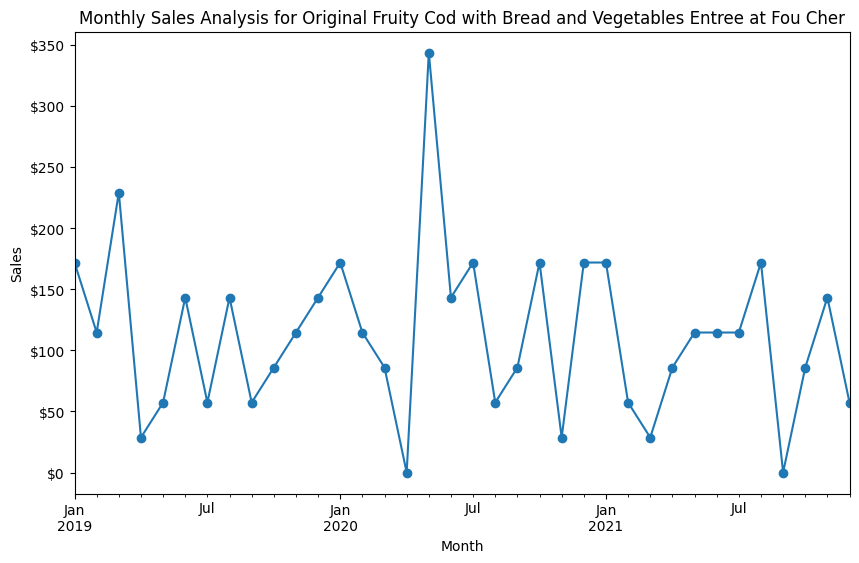

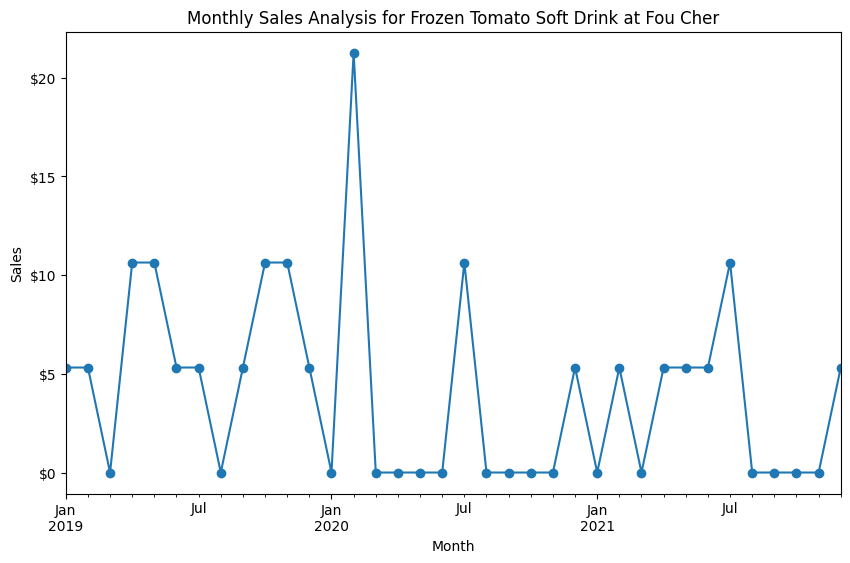

In [37]:
# Plot the item sales by month for "Bob's Diner"
# Function to format y-values as dollars
def currency(x, pos):
    'The two args are the value and tick position'
    if x >= 1000:
        return '${:1.1f}K'.format(x*1e-3)  # Adjusted to show one decimal place for thousands
    else:
        return '${:1.0f}'.format(x)

formatter = ticker.FuncFormatter(currency)

# Filter the DataFrame for "Bob's Diner"
df_fou_cher = df[df['restaurant'] == "Fou Cher"]

# Get the unique items sold at "Bob's Diner"
items = df_fou_cher['item_name'].unique()

# Loop over the items
for item in items:
    # Filter the data for the current item at "Bob's Diner"
    df_item = df_fou_cher[df_fou_cher['item_name'] == item]
    
    # Resample the data by month and sum the sales for each month
    df_resampled = df_item['sales'].resample('M').sum()
    
    # Plot the data
    fig, ax = plt.subplots(figsize=(10, 6))
    df_resampled.plot(marker='o', ax=ax)
    ax.yaxis.set_major_formatter(formatter)
    plt.title(f'Monthly Sales Analysis for {item} at Fou Cher')
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.show()

**Notes**: No discernable trends from month to month on most items that have higher sales, other than highs and lows have a fairly even overall trend.

There are several items that have 4 sales or less, those are suggested to be booted from the menu - chocolate cake, fruity milky cake, fantastic fruity salmon with bread meal, amazing vegetable and bread dinner, original milky cake, breaded fish with vegetables, fruity frozen cocktail, awesome vegetable with bread, milky cake, carrot cake. 

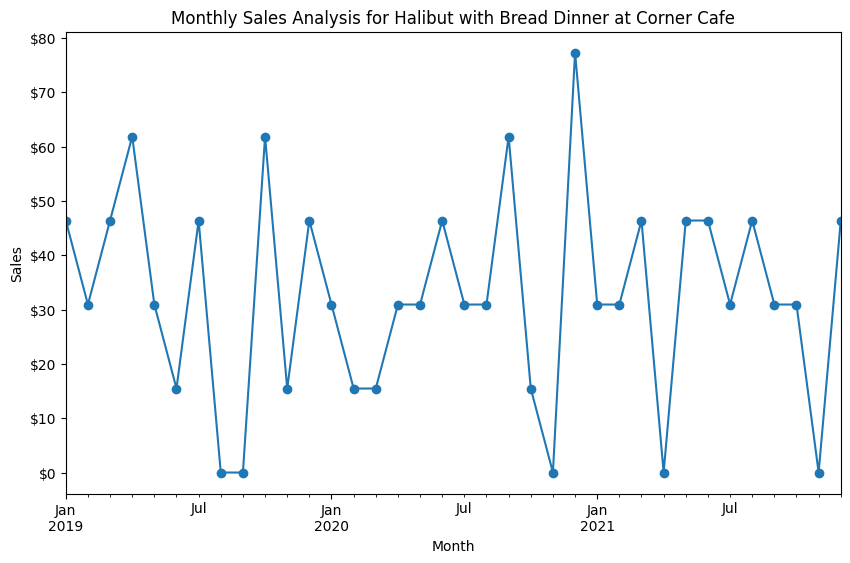

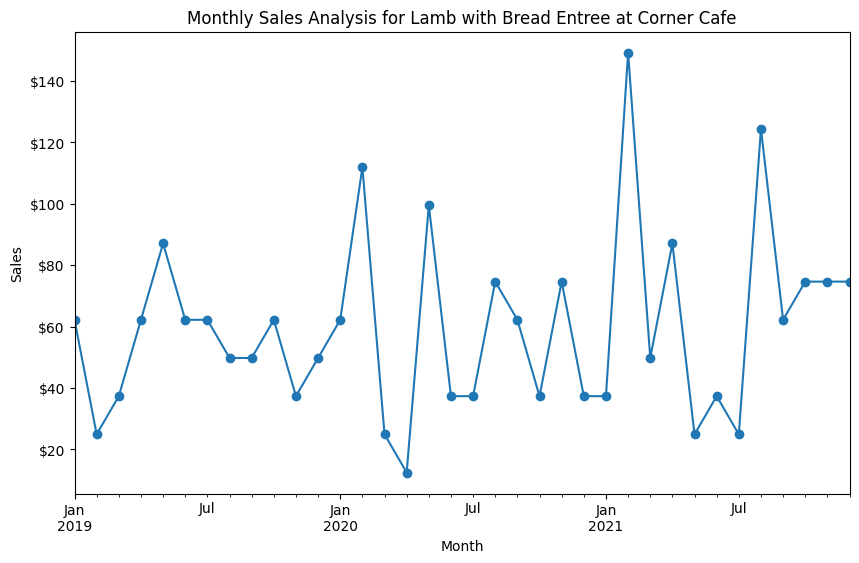

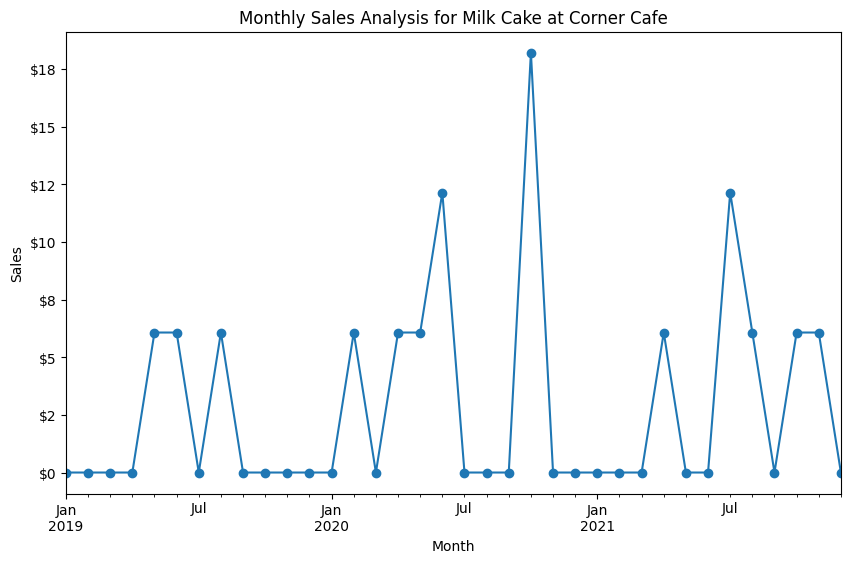

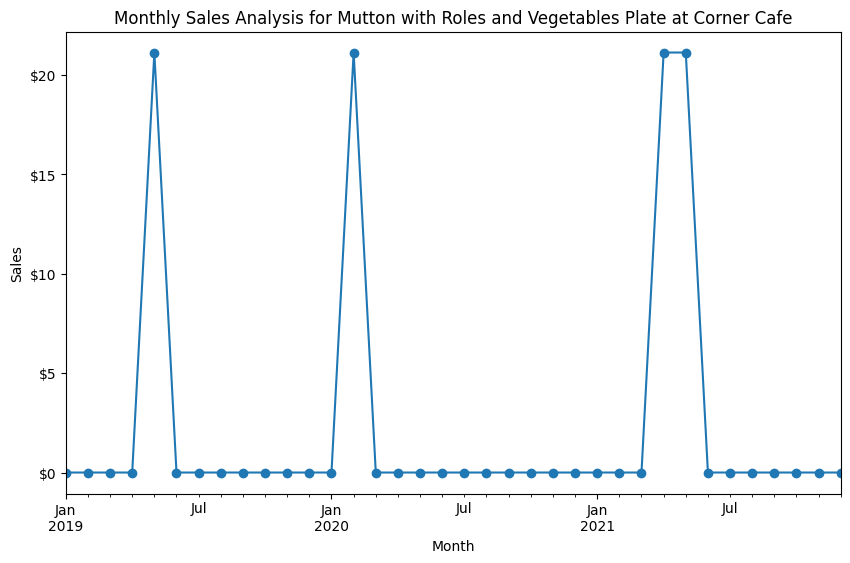

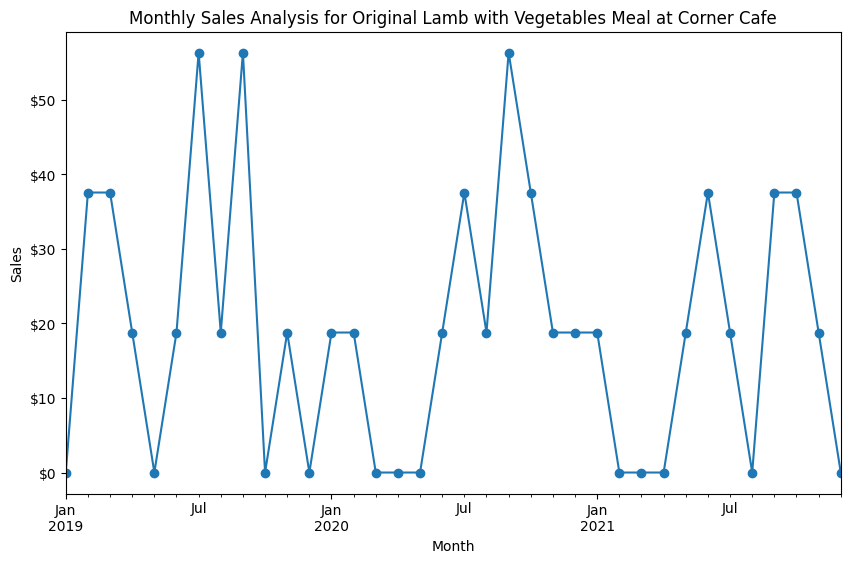

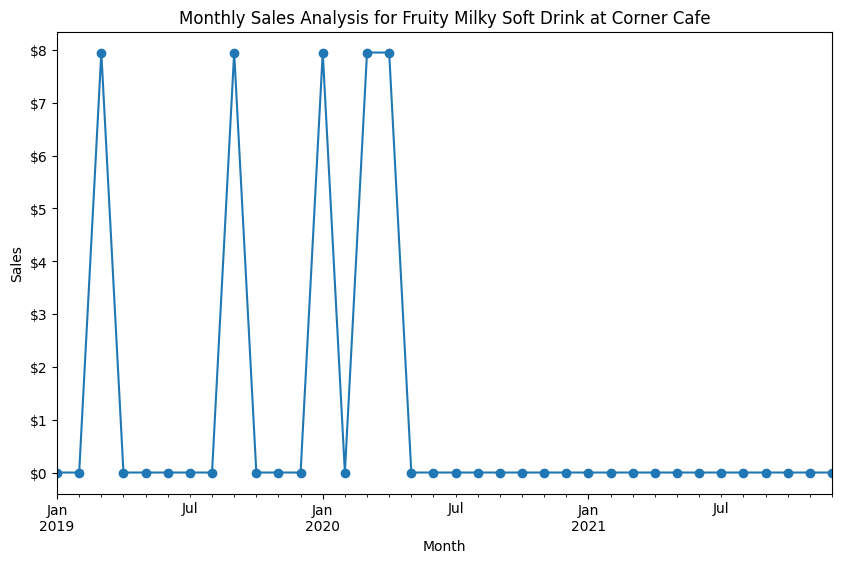

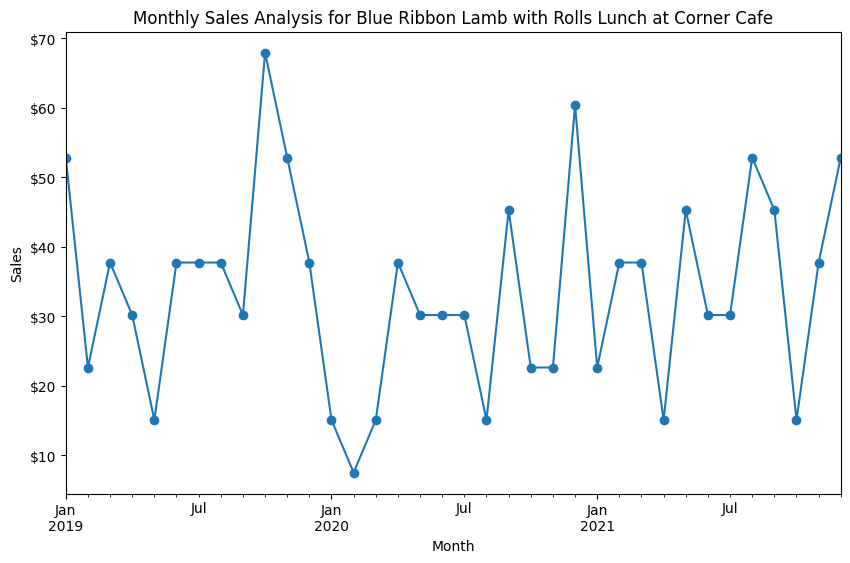

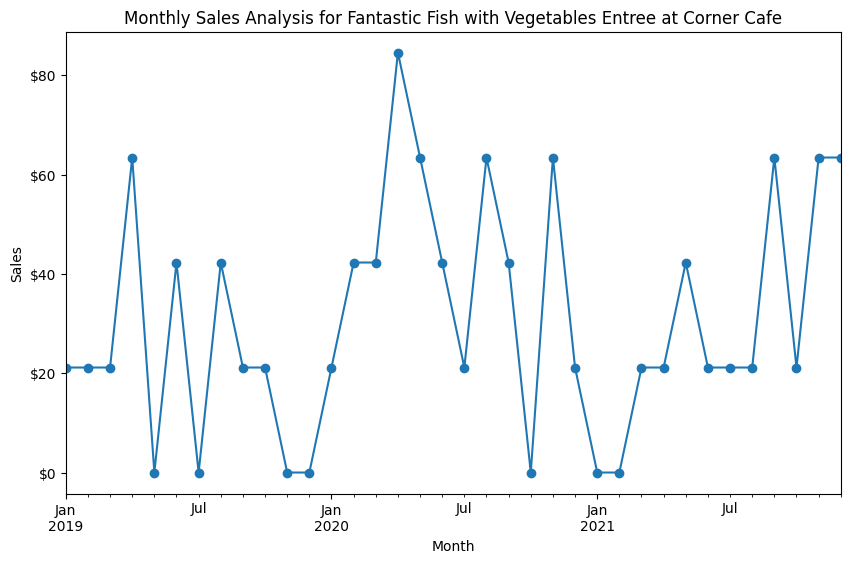

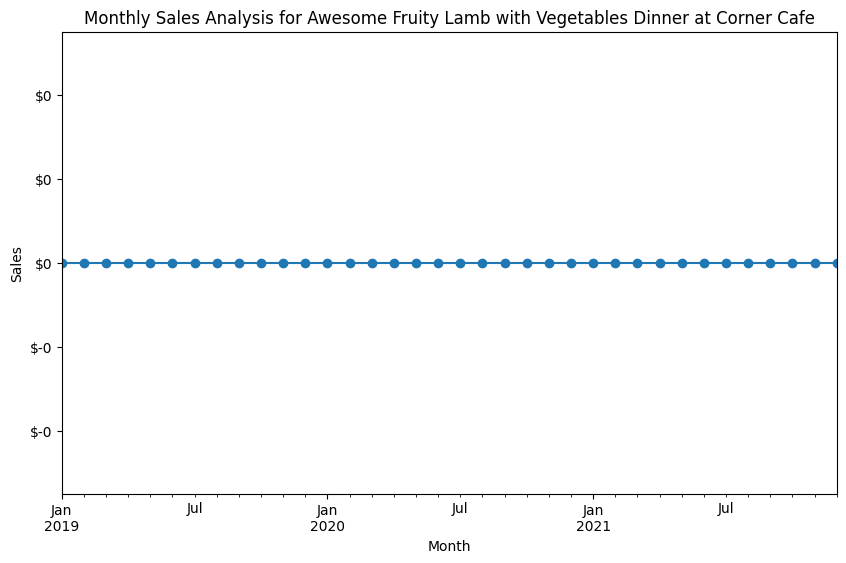

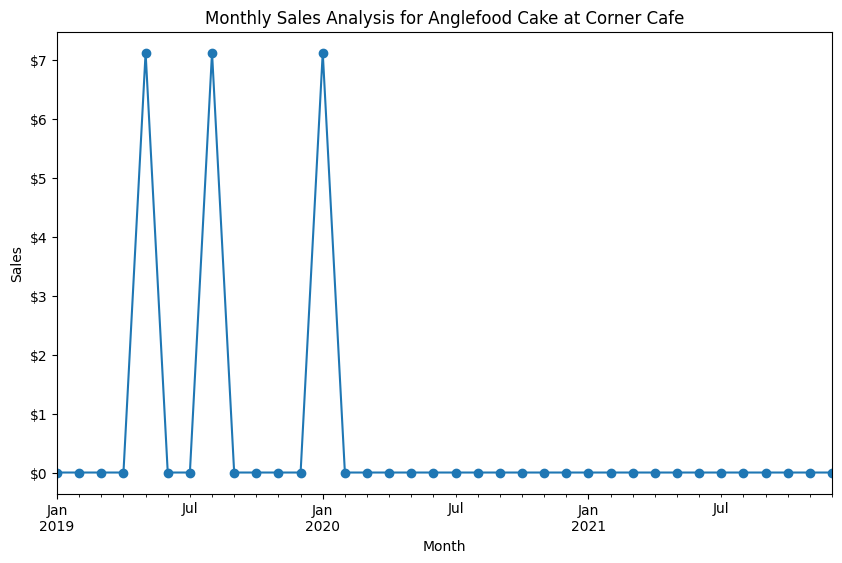

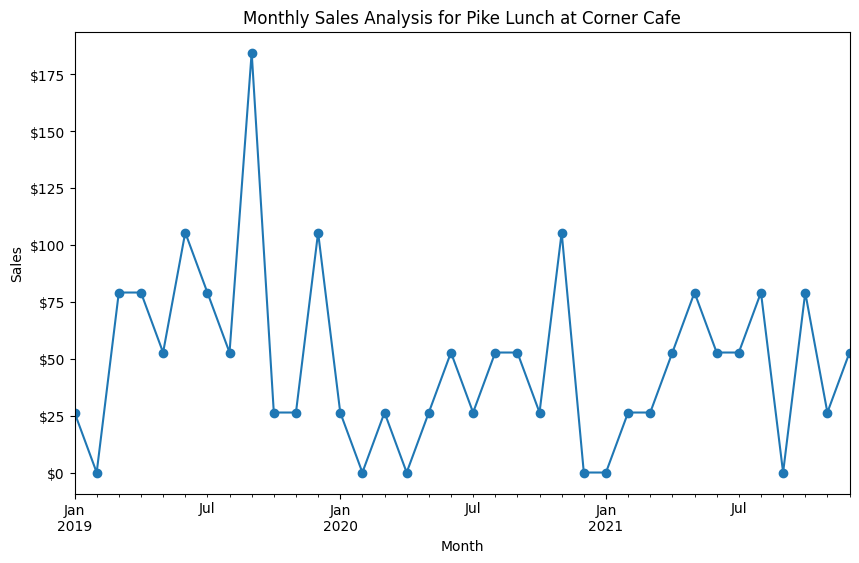

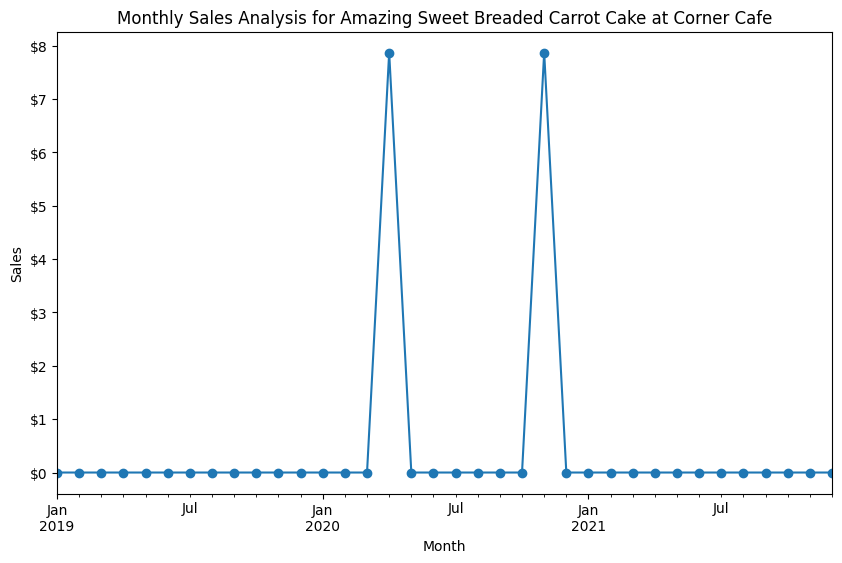

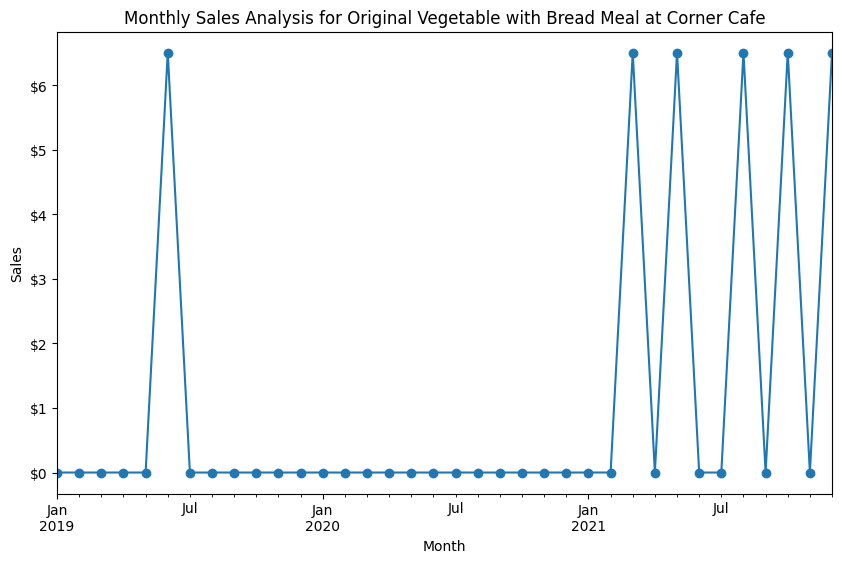

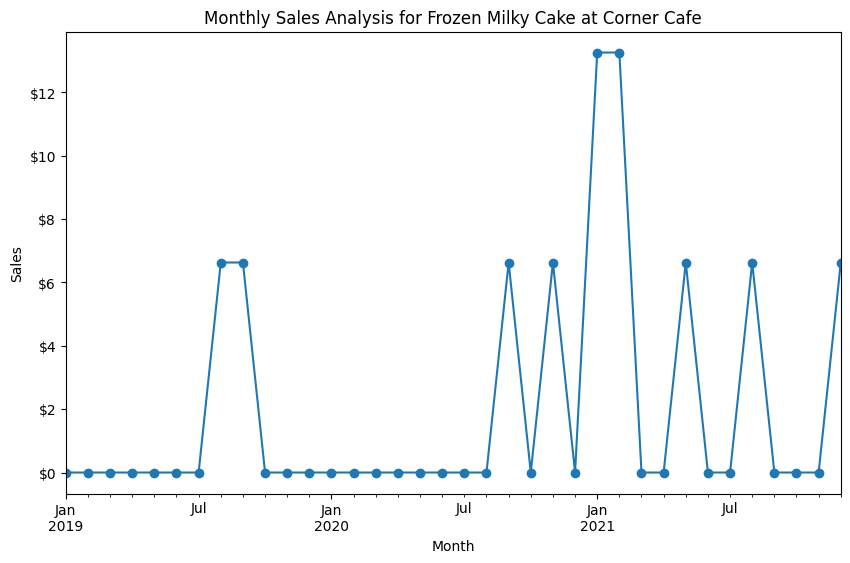

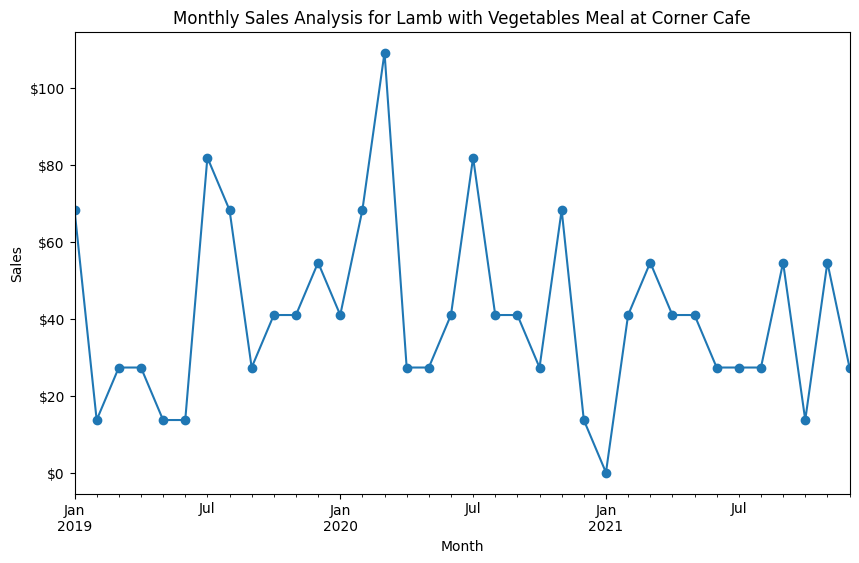

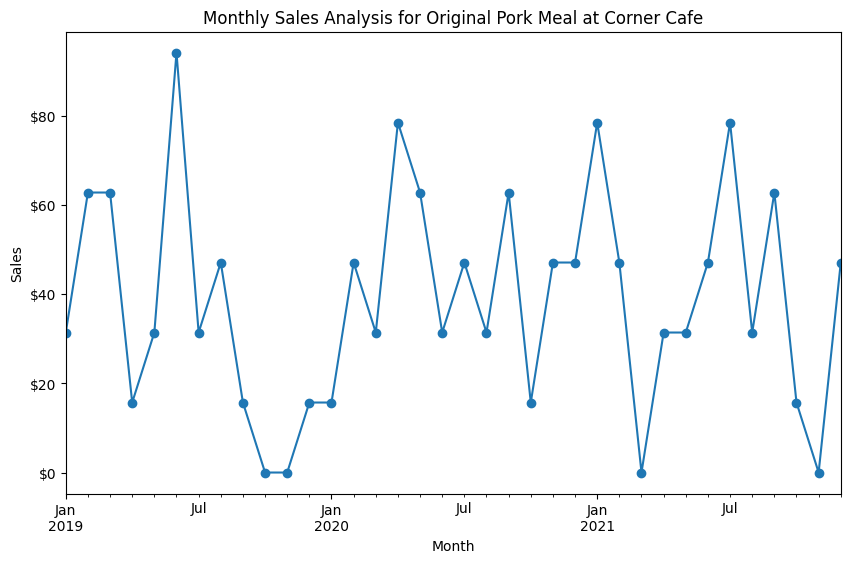

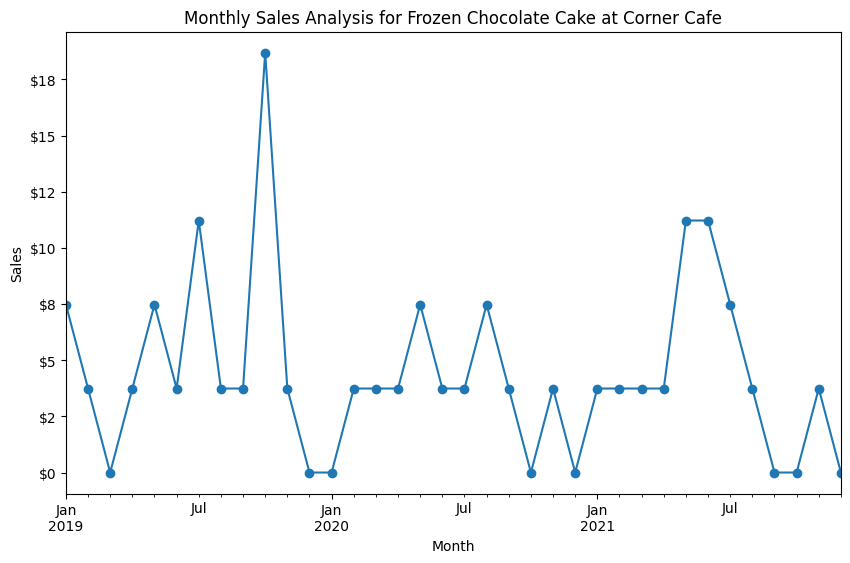

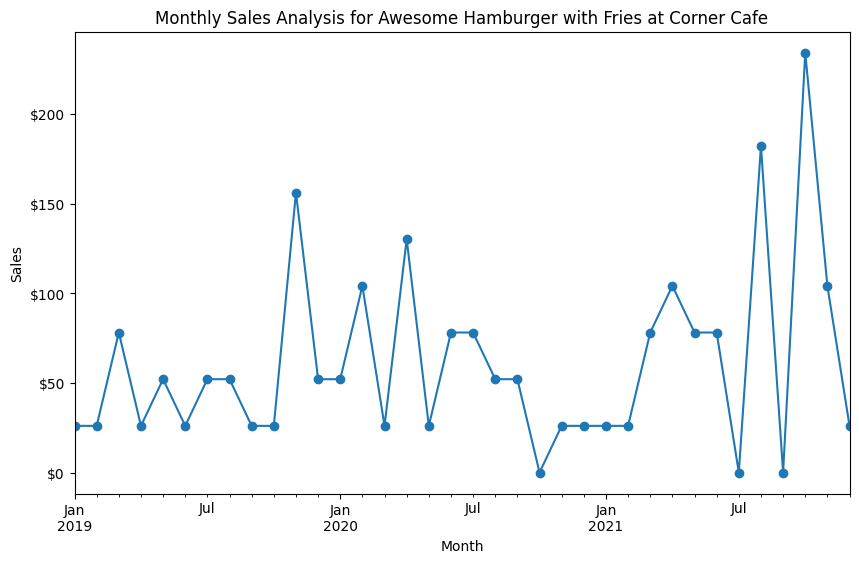

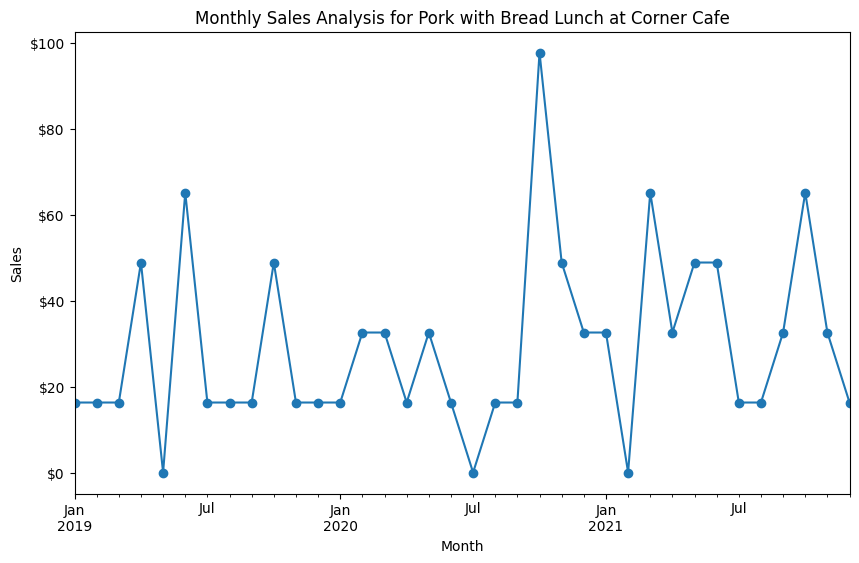

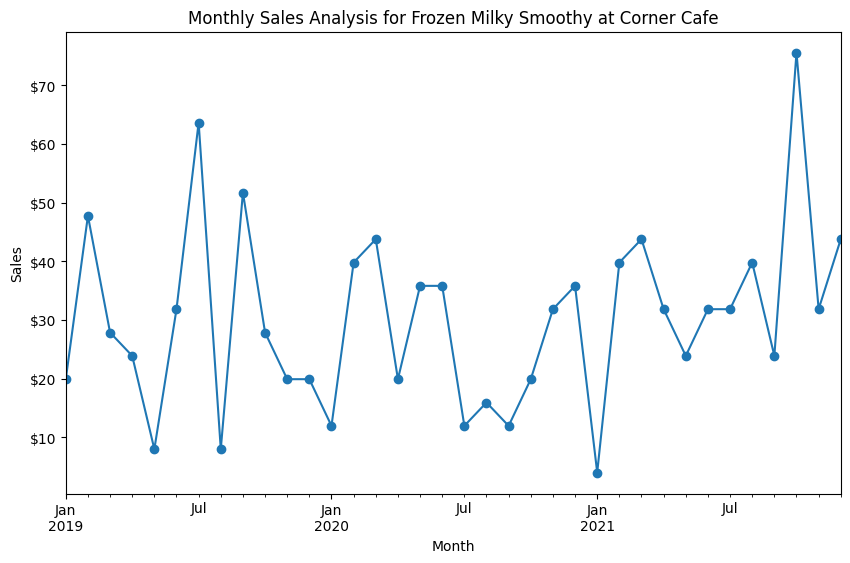

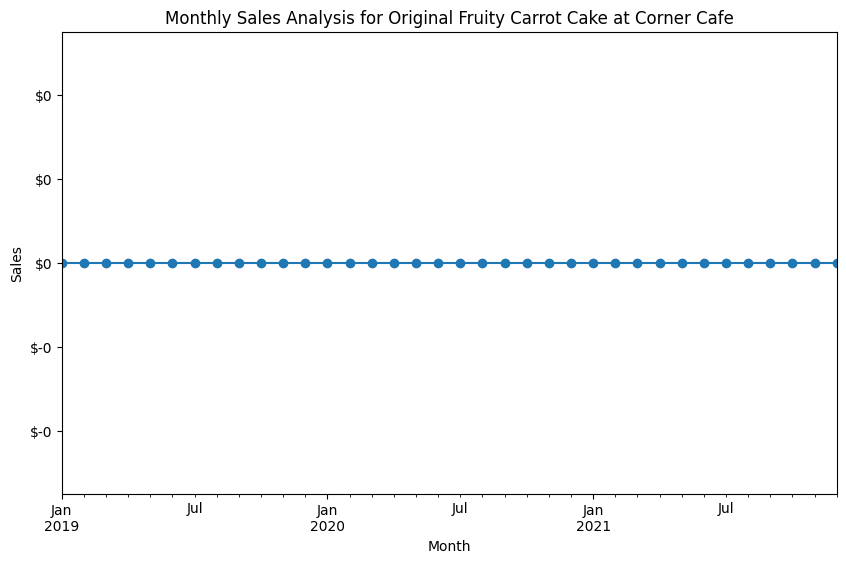

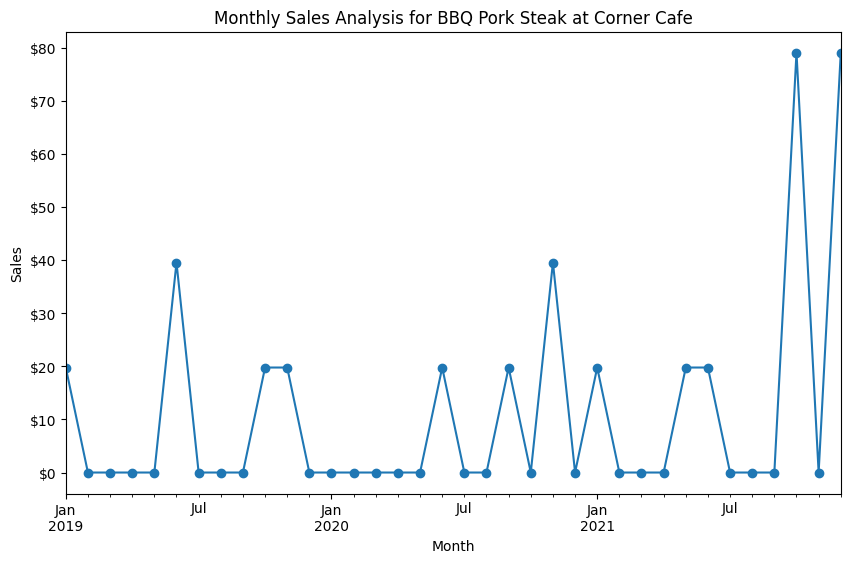

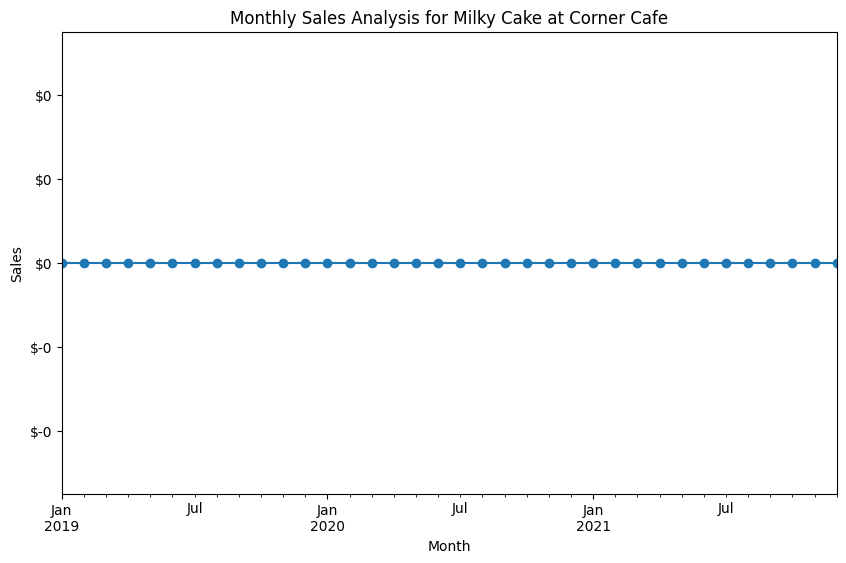

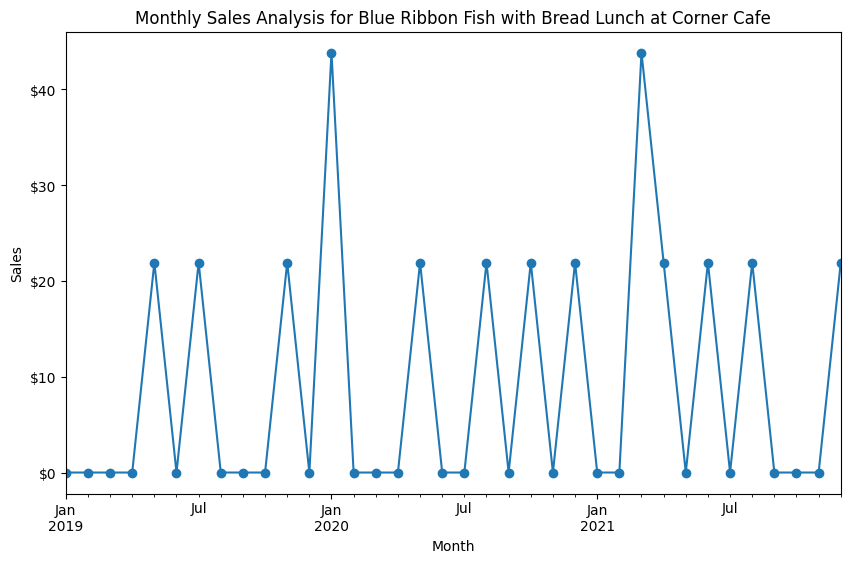

In [38]:
# Plot the item sales by month for "Corner Cafe"
# Function to format y-values as dollars
def currency(x, pos):
    'The two args are the value and tick position'
    if x >= 1000:
        return '${:1.1f}K'.format(x*1e-3)  # Adjusted to show one decimal place for thousands
    else:
        return '${:1.0f}'.format(x)

formatter = ticker.FuncFormatter(currency)

# Filter the DataFrame for "Corner Cafe"
df_corner_cafe = df[df['restaurant'] == "Corner Cafe"]

# Get the unique items sold at "Corner Cafe"
items = df_corner_cafe['item_name'].unique()

# Loop over the items
for item in items:
    # Filter the data for the current item at "Bob's Diner"
    df_item = df_corner_cafe[df_corner_cafe['item_name'] == item]
    
    # Resample the data by month and sum the sales for each month
    df_resampled = df_item['sales'].resample('M').sum()
    
    # Plot the data
    fig, ax = plt.subplots(figsize=(10, 6))
    df_resampled.plot(marker='o', ax=ax)
    ax.yaxis.set_major_formatter(formatter)
    plt.title(f'Monthly Sales Analysis for {item} at Corner Cafe')
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.show()

**Notes**: No discernable trends among sales for higher selling items.

Items with less than 4 sales or trending down - Mutton with roles and vegetables, awesome fruity lamb with vegetables dinner, angelfood cake, amazing sweet breaded carrot cake, original fruity carrot cake, milky cake.

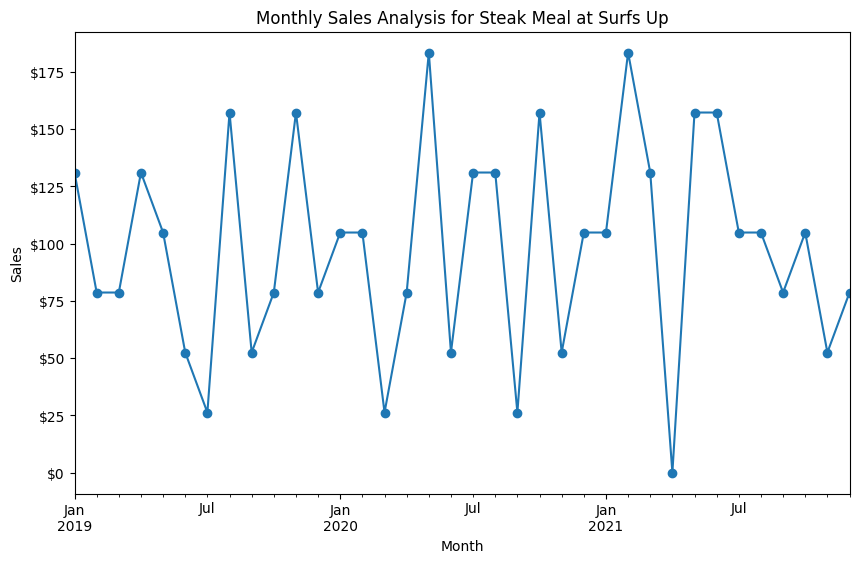

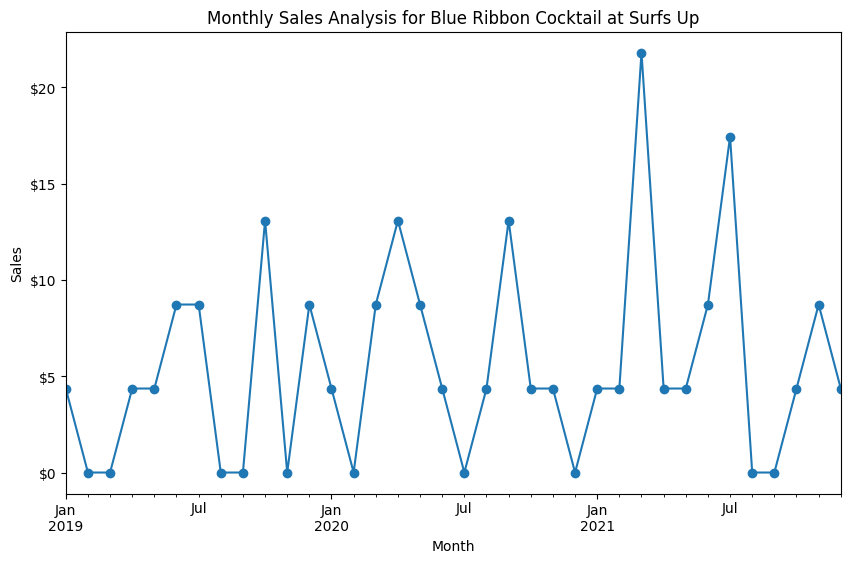

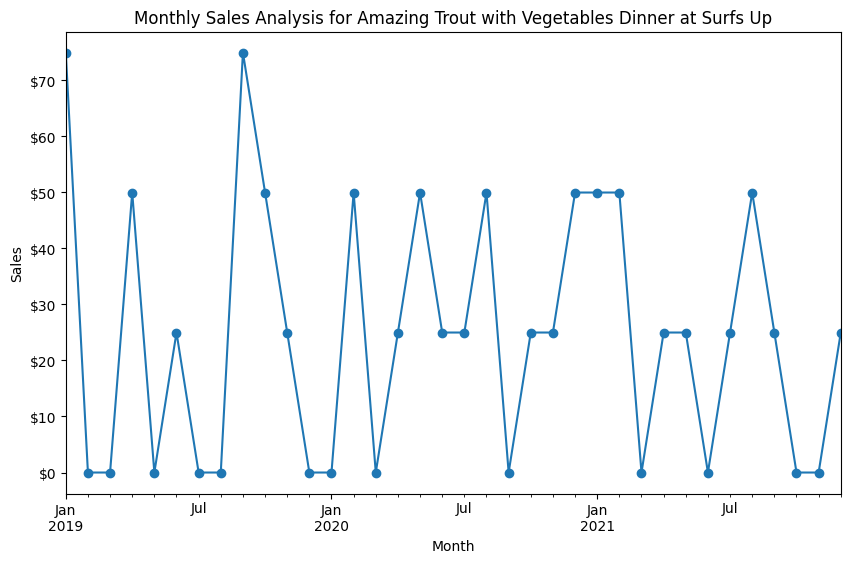

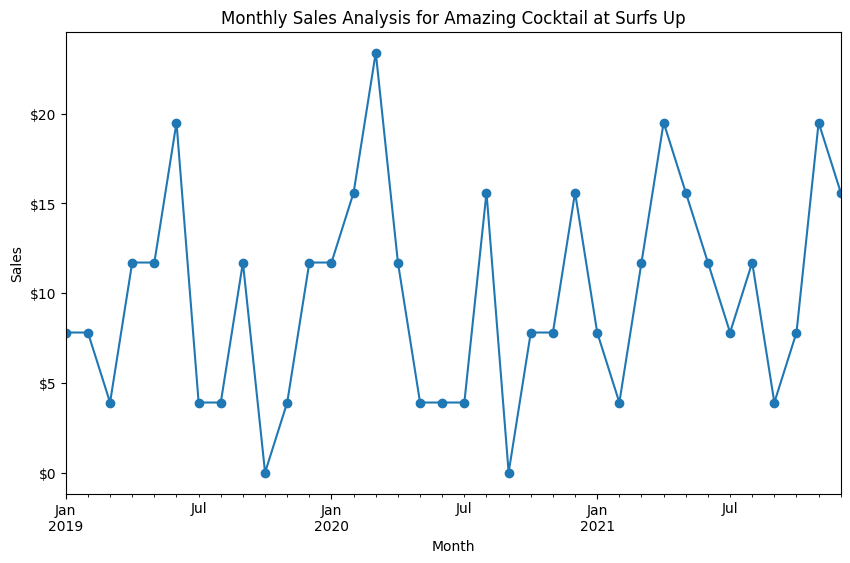

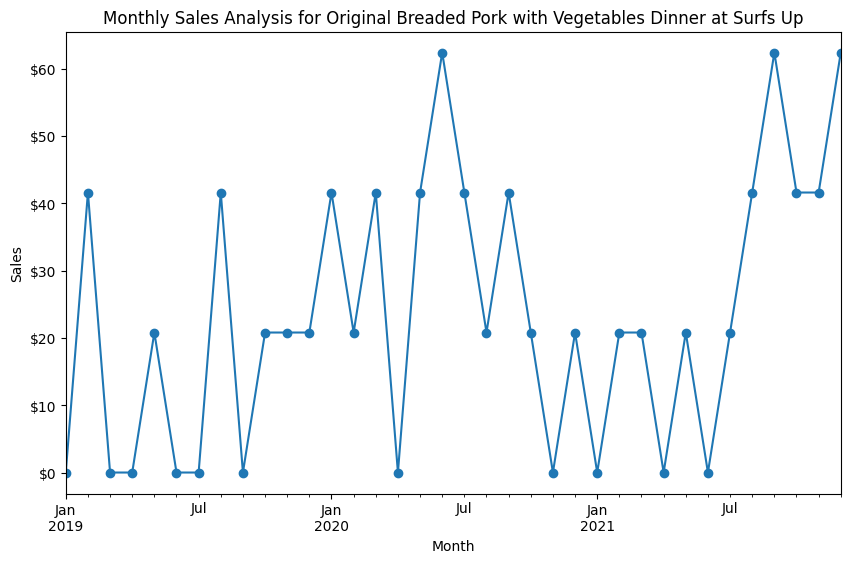

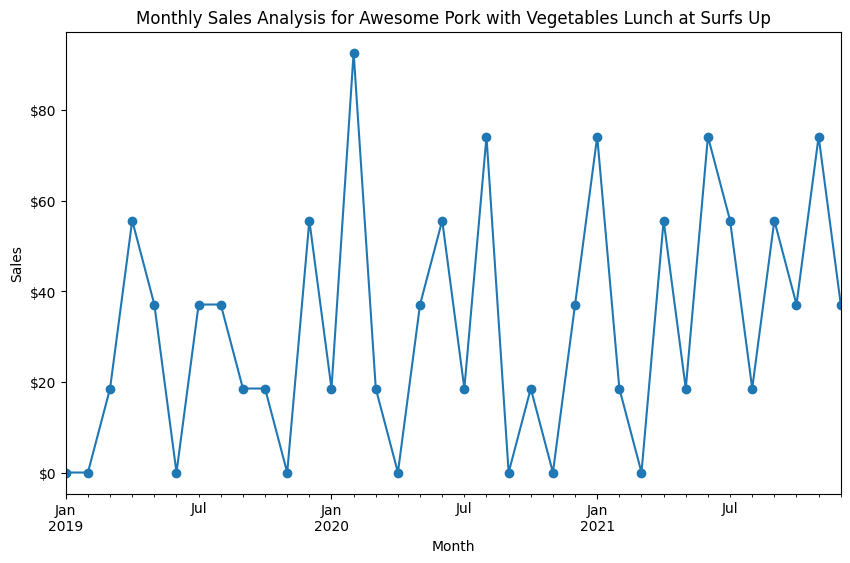

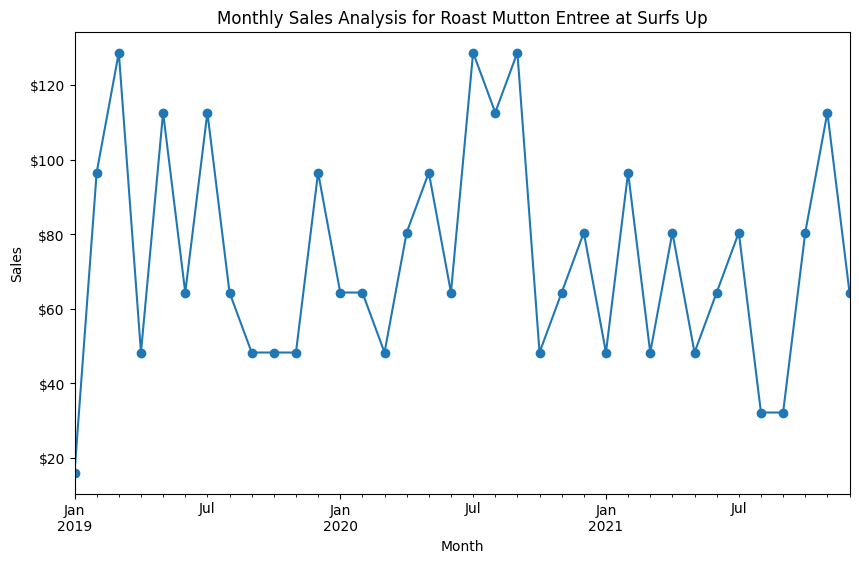

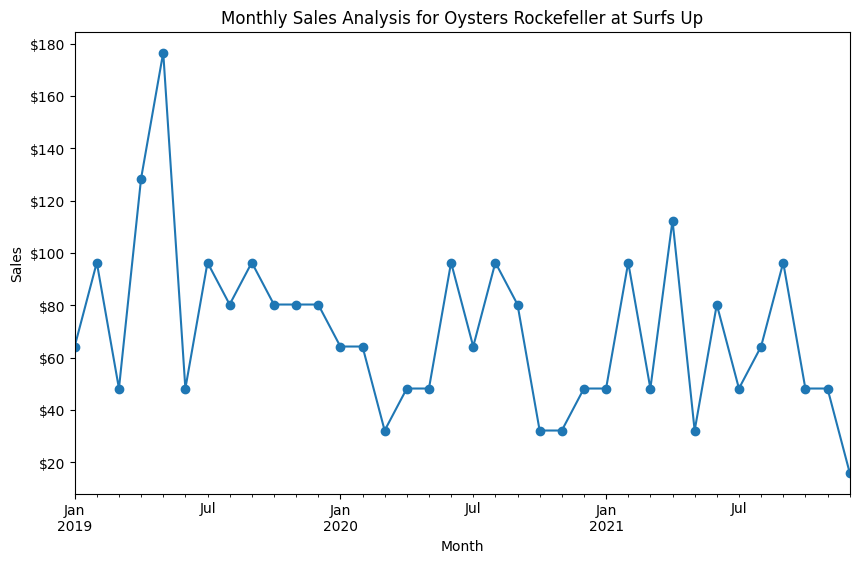

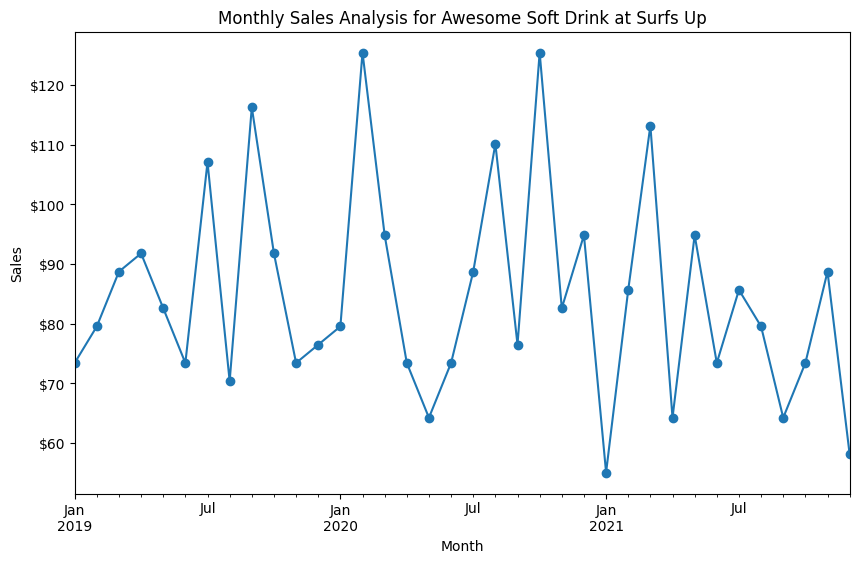

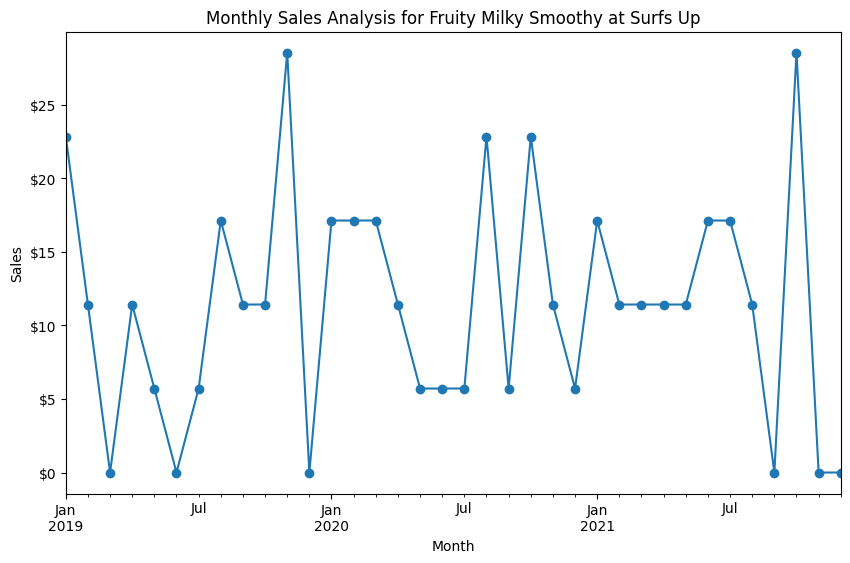

In [39]:
# Plot the item sales by month for "Surfs Up"
# Function to format y-values as dollars
def currency(x, pos):
    'The two args are the value and tick position'
    if x >= 1000:
        return '${:1.1f}K'.format(x*1e-3)  # Adjusted to show one decimal place for thousands
    else:
        return '${:1.0f}'.format(x)

formatter = ticker.FuncFormatter(currency)


df_surfs_up = df[df['restaurant'] == "Surfs Up"]

items = df_surfs_up['item_name'].unique()

# Loop over the items
for item in items:
    # Filter the data for the current item at "Bob's Diner"
    df_item = df_surfs_up[df_surfs_up['item_name'] == item]
    
    # Resample the data by month and sum the sales for each month
    df_resampled = df_item['sales'].resample('M').sum()
    
    # Plot the data
    fig, ax = plt.subplots(figsize=(10, 6))
    df_resampled.plot(marker='o', ax=ax)
    ax.yaxis.set_major_formatter(formatter)
    plt.title(f'Monthly Sales Analysis for {item} at Surfs Up')
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.show()

**Notes**: No discernable sales patterns for the items.

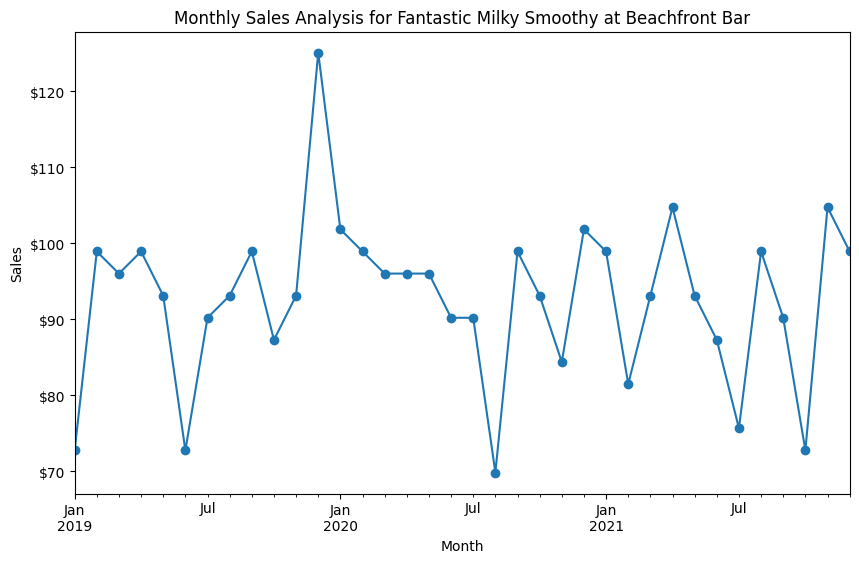

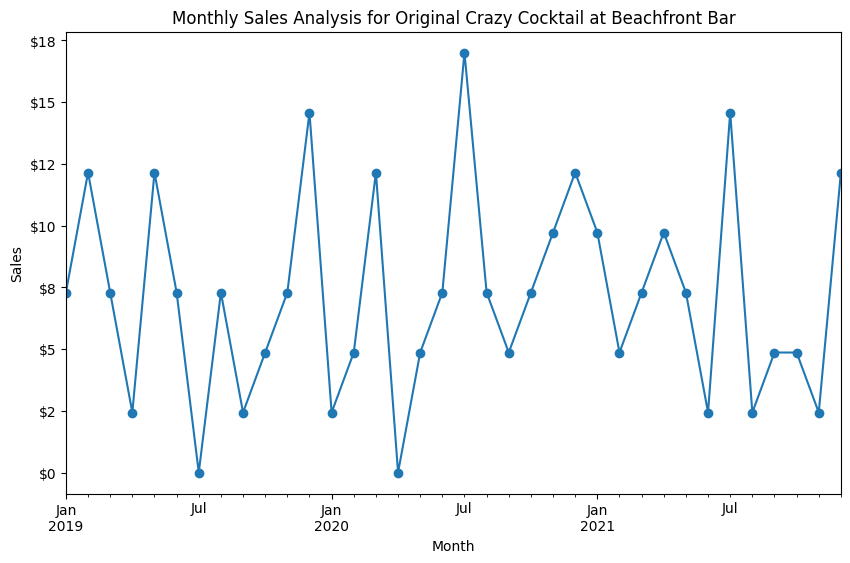

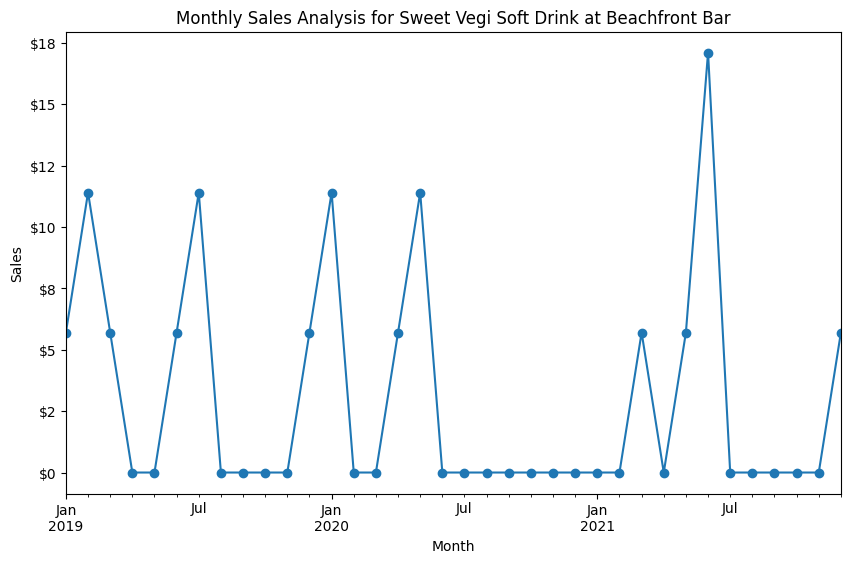

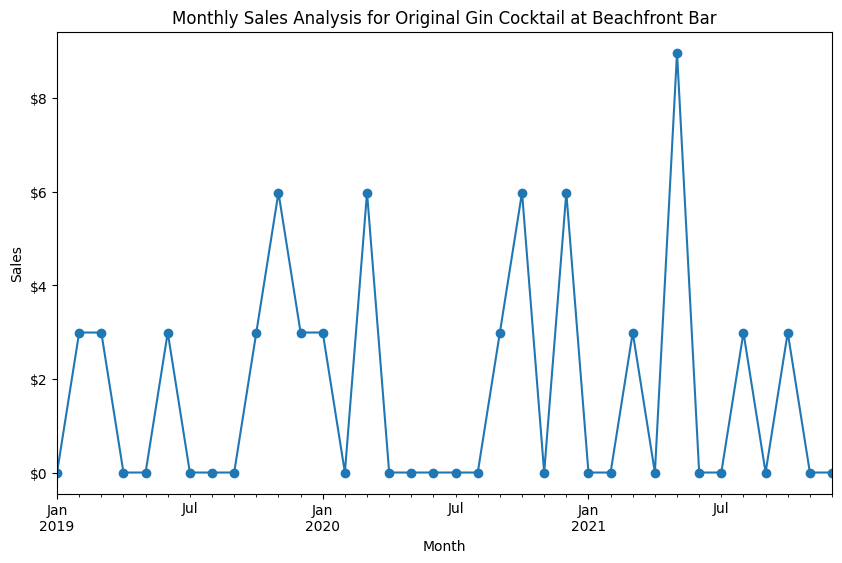

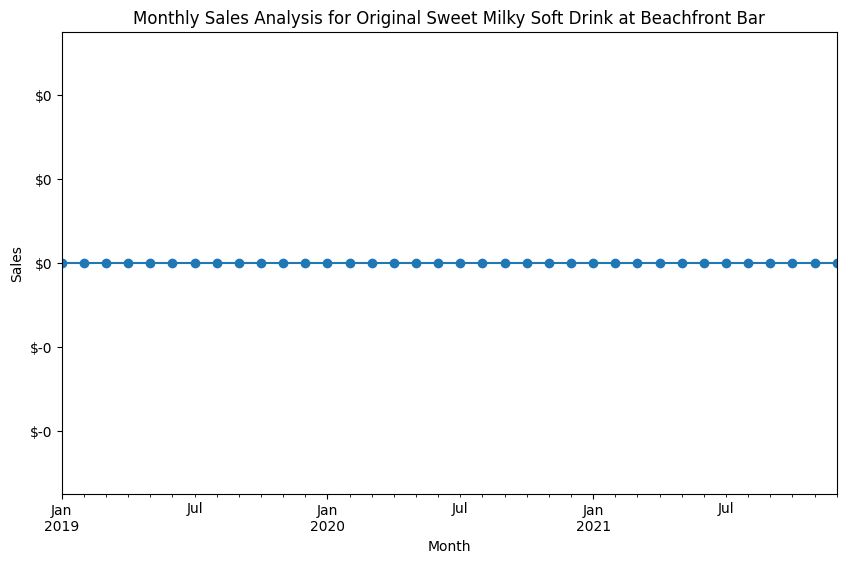

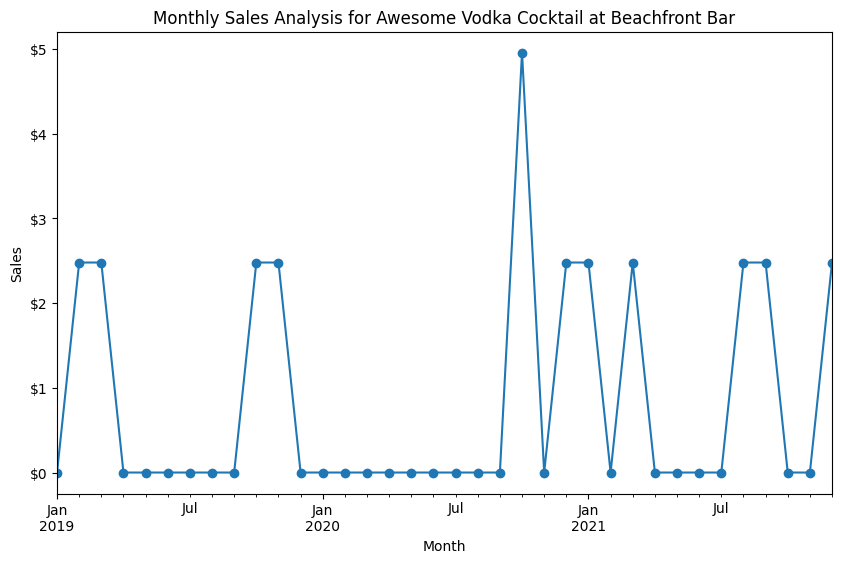

In [40]:
# Plot the item sales by month for "Beachfront Bar"
# Function to format y-values as dollars
def currency(x, pos):
    'The two args are the value and tick position'
    if x >= 1000:
        return '${:1.1f}K'.format(x*1e-3)  # Adjusted to show one decimal place for thousands
    else:
        return '${:1.0f}'.format(x)

formatter = ticker.FuncFormatter(currency)

# Filter the DataFrame for "Bob's Diner"
df_beachfront_bar = df[df['restaurant'] == "Beachfront Bar"]

# Get the unique items sold at "Bob's Diner"
items = df_beachfront_bar['item_name'].unique()

# Loop over the items
for item in items:
    # Filter the data for the current item at "Bob's Diner"
    df_item = df_beachfront_bar[df_beachfront_bar['item_name'] == item]
    
    # Resample the data by month and sum the sales for each month
    df_resampled = df_item['sales'].resample('M').sum()
    
    # Plot the data
    fig, ax = plt.subplots(figsize=(10, 6))
    df_resampled.plot(marker='o', ax=ax)
    ax.yaxis.set_major_formatter(formatter)
    plt.title(f'Monthly Sales Analysis for {item} at Beachfront Bar')
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.show()

**Notes**: No discernable patterns other than that the original sweet milky soft drink has no sales at all.

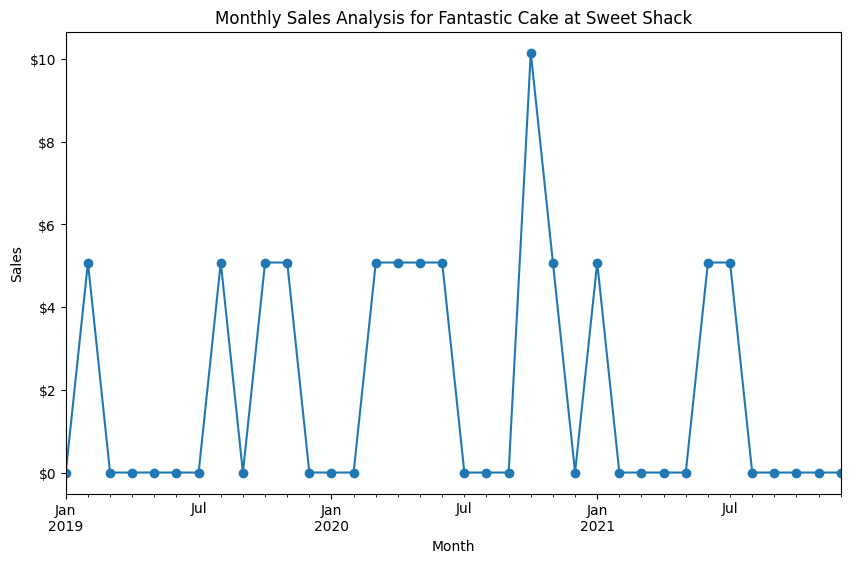

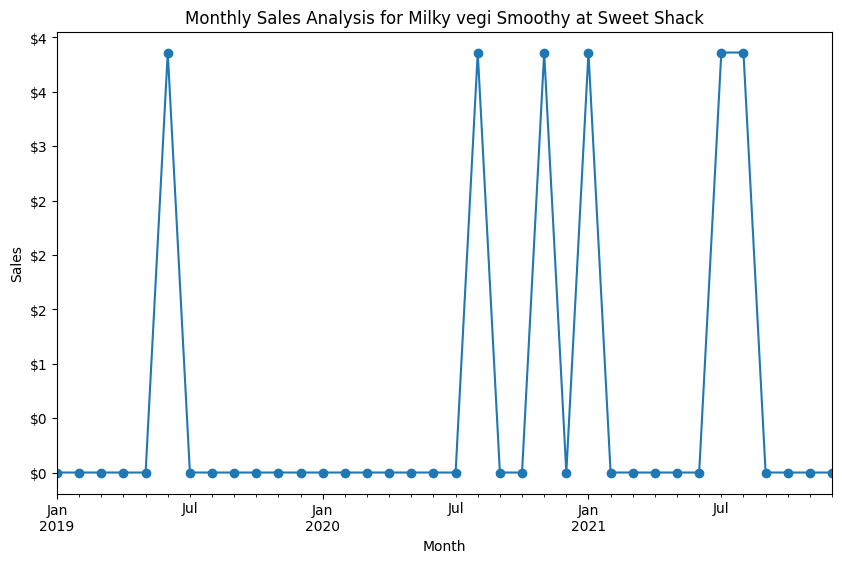

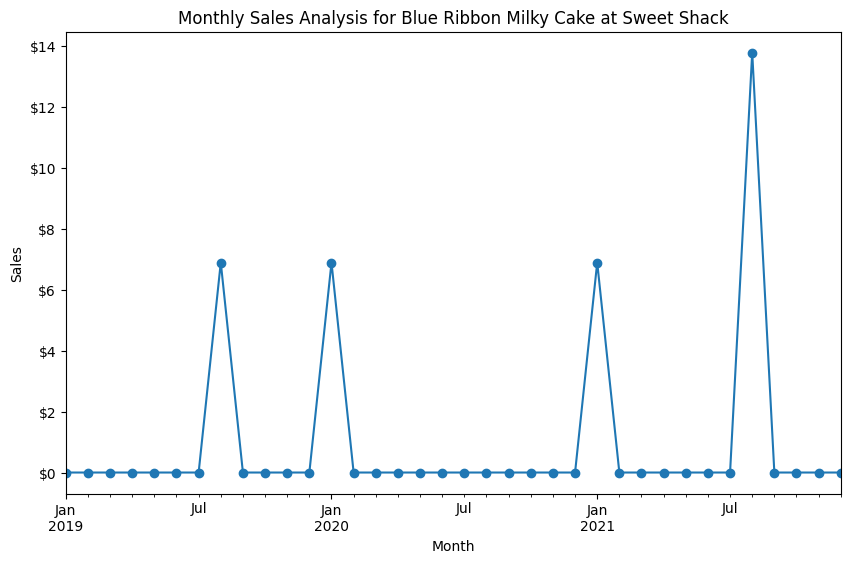

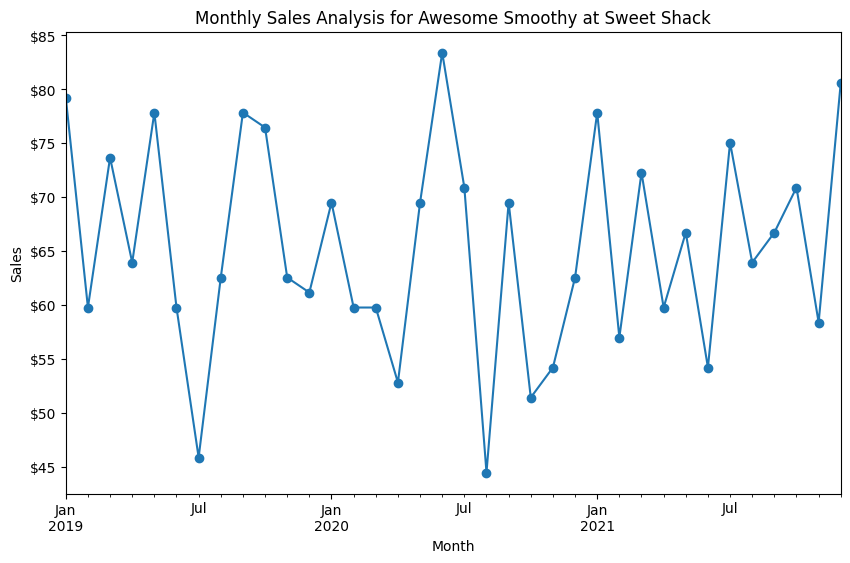

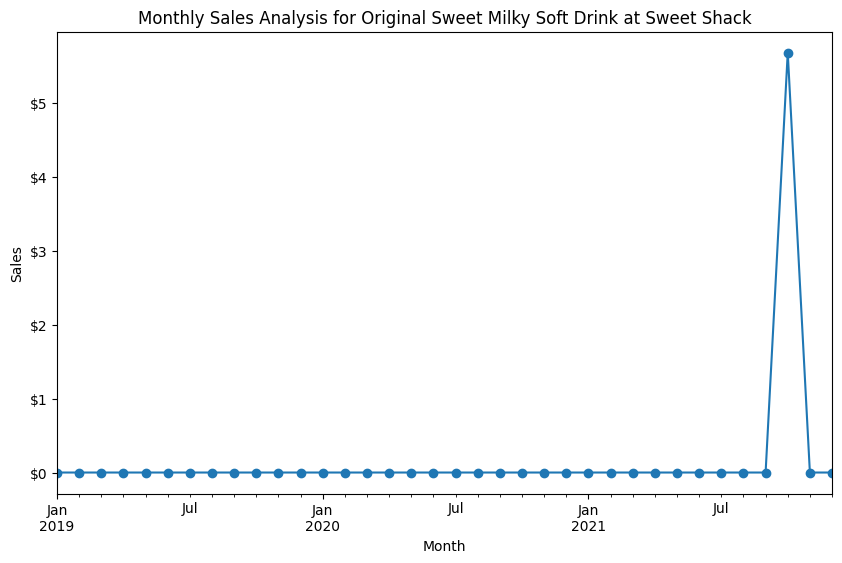

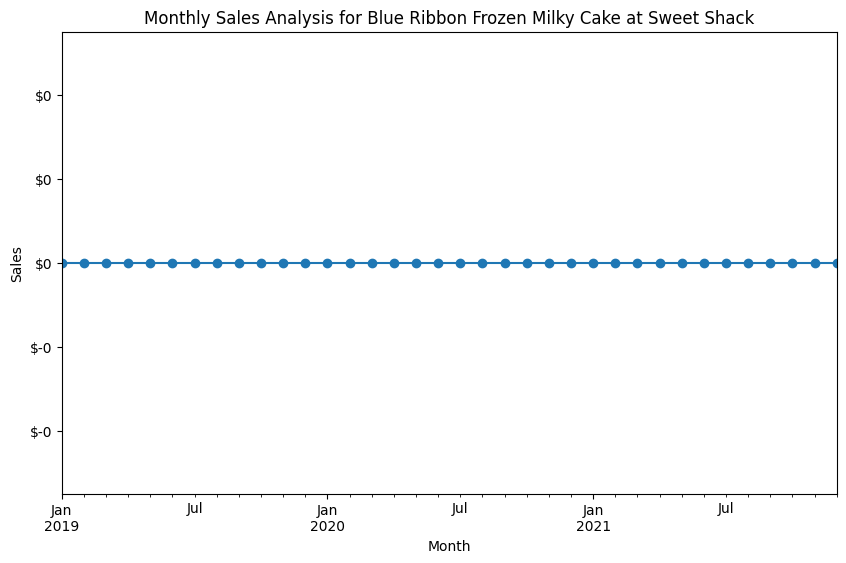

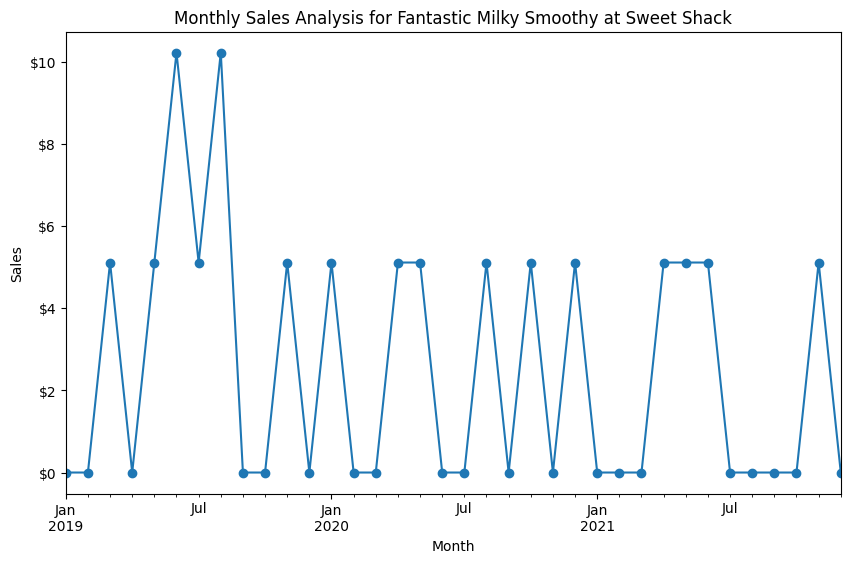

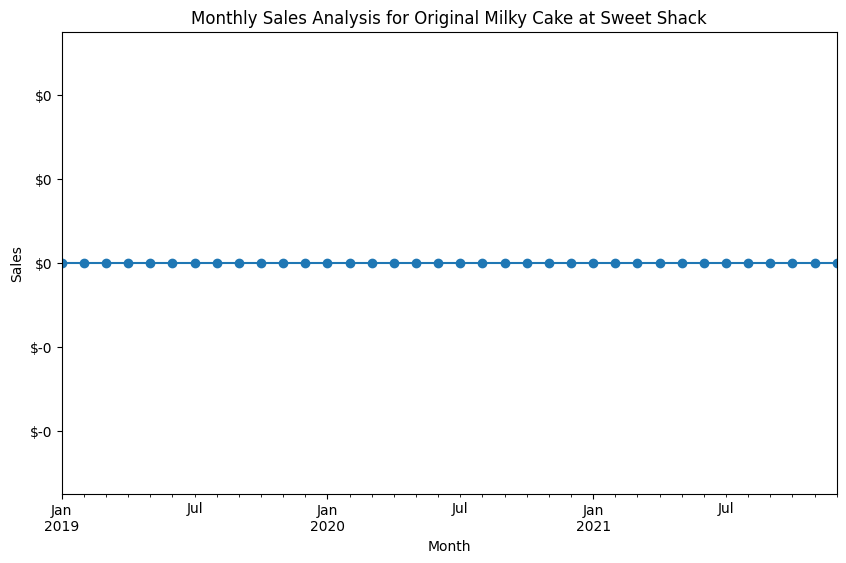

In [41]:
# Plot the item sales by month for "Sweet Shack"
# Function to format y-values as dollars
def currency(x, pos):
    'The two args are the value and tick position'
    if x >= 1000:
        return '${:1.1f}K'.format(x*1e-3)  # Adjusted to show one decimal place for thousands
    else:
        return '${:1.0f}'.format(x)

formatter = ticker.FuncFormatter(currency)

# Filter the DataFrame for "Bob's Diner"
df_sweet_shack = df[df['restaurant'] == "Sweet Shack"]

# Get the unique items sold at "Bob's Diner"
items = df_sweet_shack['item_name'].unique()

# Loop over the items
for item in items:
    # Filter the data for the current item at "Bob's Diner"
    df_item = df_sweet_shack[df_sweet_shack['item_name'] == item]
    
    # Resample the data by month and sum the sales for each month
    df_resampled = df_item['sales'].resample('M').sum()
    
    # Plot the data
    fig, ax = plt.subplots(figsize=(10, 6))
    df_resampled.plot(marker='o', ax=ax)
    ax.yaxis.set_major_formatter(formatter)
    plt.title(f'Monthly Sales Analysis for {item} at Sweet Shack')
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.show()

**Notes**: Very few sales overall.

Items sold less than 4 times - blue ribbon milky cake, original sweet milky soft drink, blue ribbon frozen milky cake, original milky cake. 

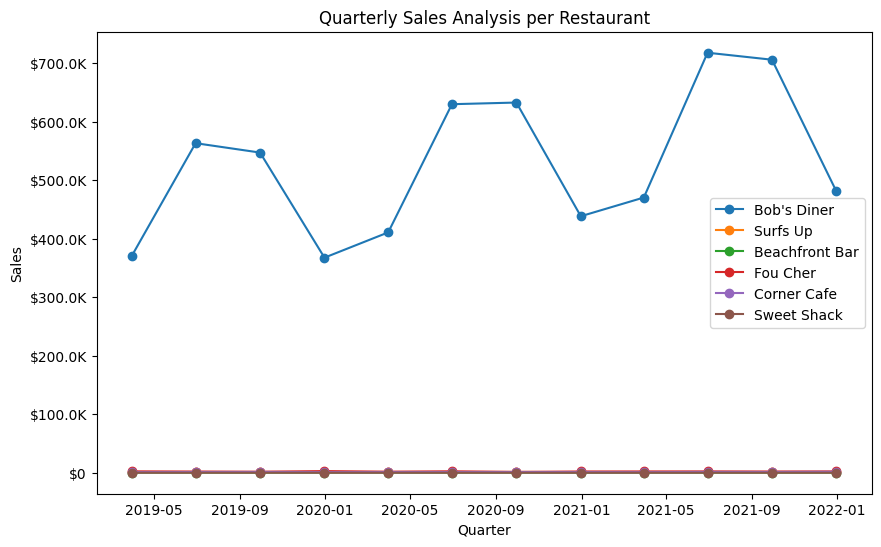

In [42]:
# Quarterly Sales Analysis
# Function to format y-values as dollars
def currency(x, pos):
    'The two args are the value and tick position'
    if x >= 1000:
        return '${:1.1f}K'.format(x*1e-3)
    else:
        return '${:1.0f}'.format(x)

formatter = ticker.FuncFormatter(currency)

# Get the unique restaurants
restaurants = df['restaurant'].unique()

# Create a new figure
fig, ax = plt.subplots(figsize=(10,6))

# Loop over the restaurants
for restaurant in restaurants:
  
    # Filter the data for the current restaurant
    df_restaurant = df[df['restaurant'] == restaurant]
    
    # Resample the data by quarter and sum the sales for each quarter
    df_resampled = df_restaurant['sales'].resample('Q').sum()
    
    # Plot the data
    ax.plot(df_resampled.index, df_resampled, 'o-', label=restaurant)

# Set the title and labels
ax.set_title('Quarterly Sales Analysis per Restaurant')
ax.set_xlabel('Quarter')
ax.set_ylabel('Sales')
ax.yaxis.set_major_formatter(formatter)

# Add a legend
ax.legend()

# Show the plot
plt.show()

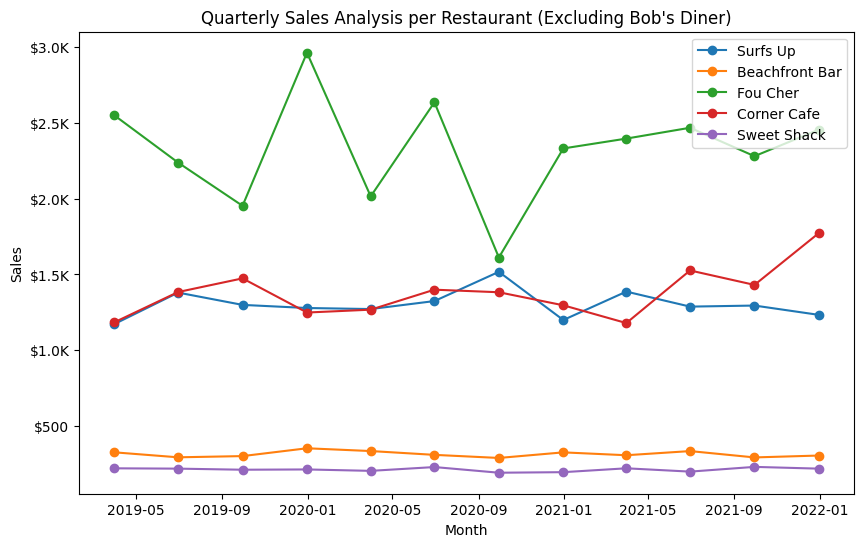

In [43]:
# Plot the restuarants without Bob's Diner
# Function to format y-values as dollars
def currency(x, pos):
    'The two args are the value and tick position'
    if x >= 1000:
        return '${:1.1f}K'.format(x*1e-3)  # Adjusted to show one decimal place for thousands
    else:
        return '${:1.0f}'.format(x)

formatter = ticker.FuncFormatter(currency)

# Get the unique restaurants
restaurants = df['restaurant'].unique()

# Create a new figure
fig, ax = plt.subplots(figsize=(10,6))

# Loop over the restaurants
for restaurant in restaurants:
    # Skip "Bob's Diner"
    if restaurant == "Bob's Diner":
        continue
    
    # Filter the data for the current restaurant
    df_restaurant = df[df['restaurant'] == restaurant]
    
    # Resample the data by month and sum the sales for each month
    df_resampled = df_restaurant['sales'].resample('Q').sum()
    
    # Plot the data
    ax.plot(df_resampled.index, df_resampled, 'o-', label=restaurant)

# Set the title and labels
ax.set_title('Quarterly Sales Analysis per Restaurant (Excluding Bob\'s Diner)')
ax.set_xlabel('Month')
ax.set_ylabel('Sales')
ax.yaxis.set_major_formatter(formatter)

# Add a legend
ax.legend()

# Show the plot
plt.show()

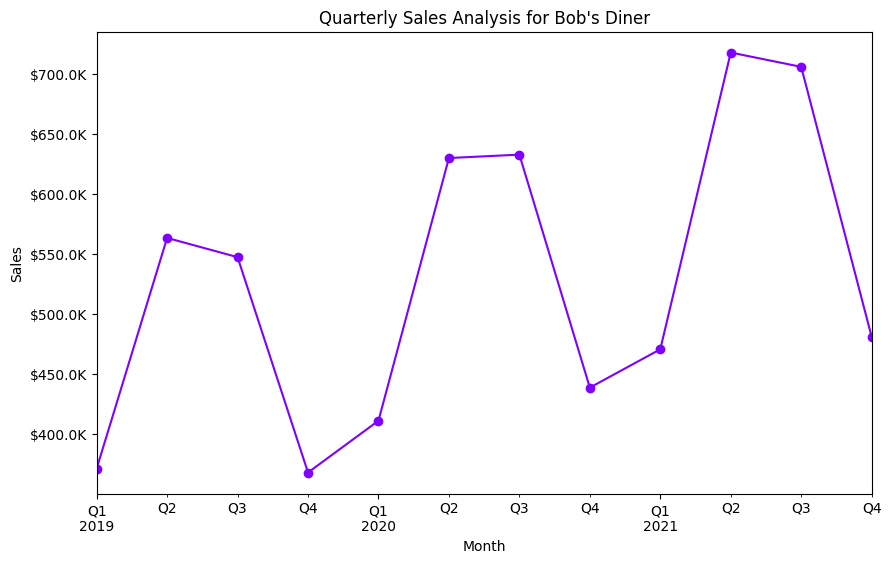

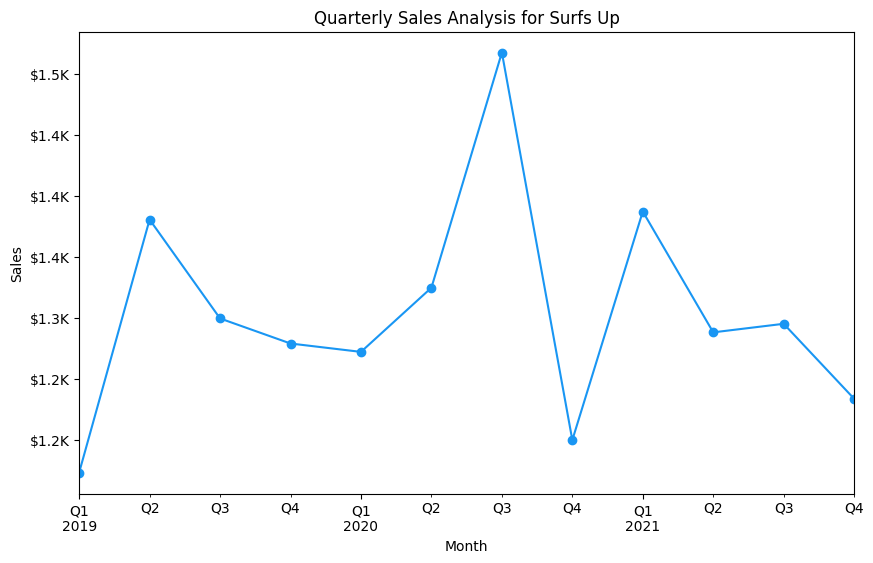

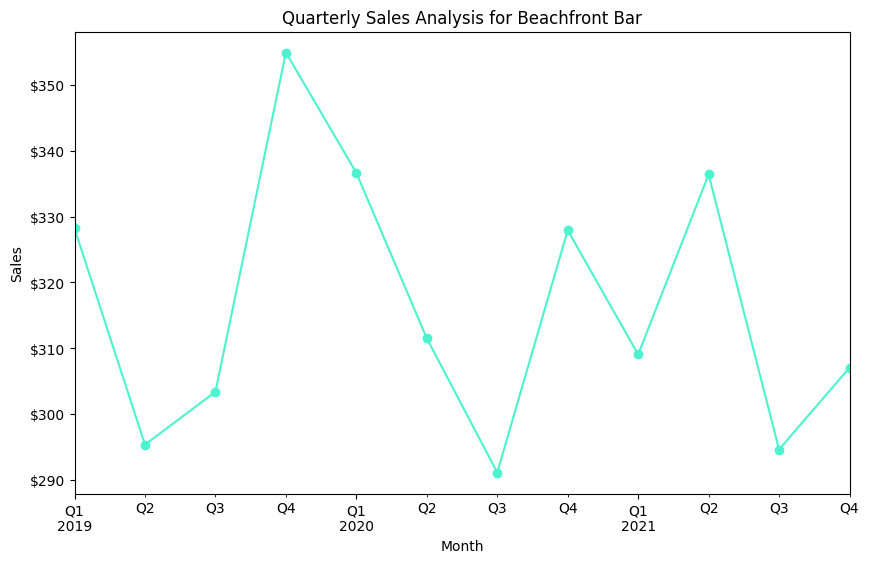

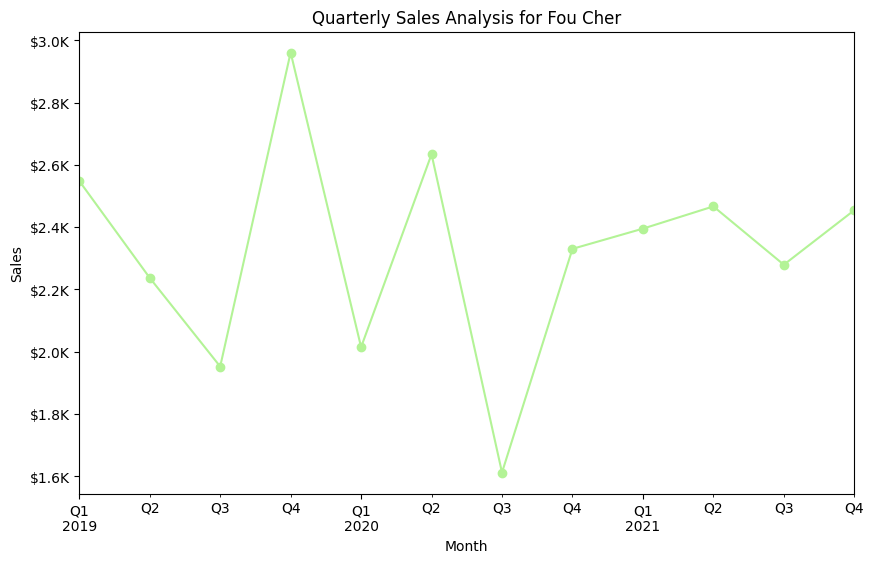

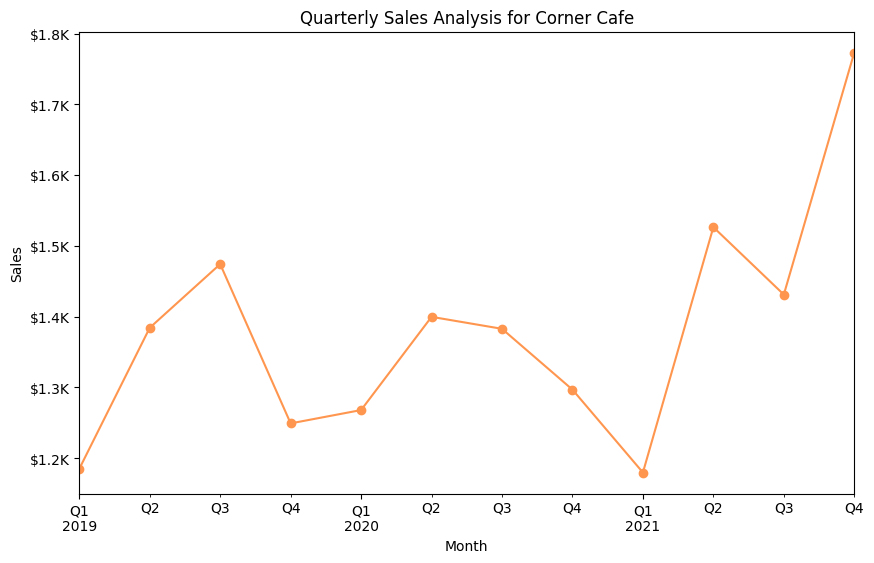

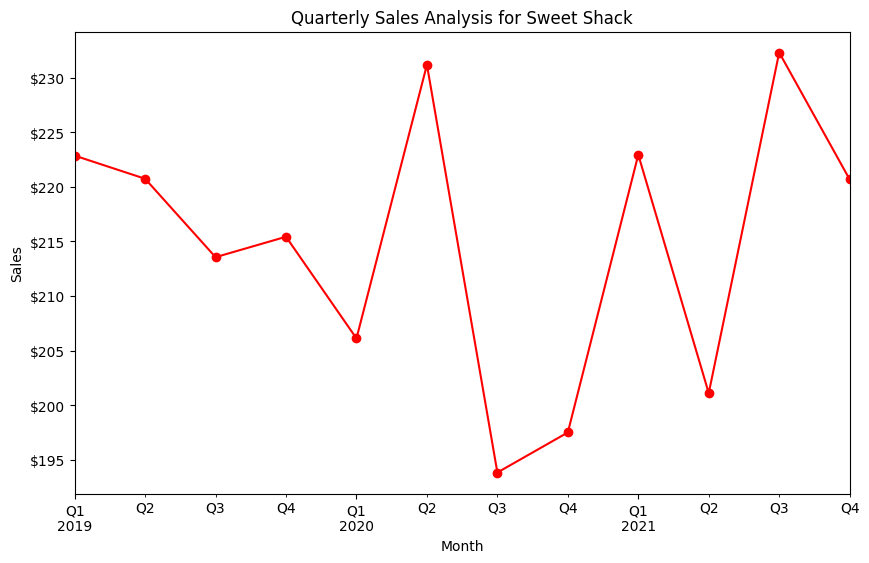

In [44]:
# Function to format y-values as dollars
def currency(x, pos):
    'The two args are the value and tick position'
    if x >= 1000:
        return '${:1.1f}K'.format(x*1e-3)  # Adjusted to show one decimal place for thousands
    else:
        return '${:1.0f}'.format(x)

formatter = ticker.FuncFormatter(currency)

# Get the unique restaurants
restaurants = df['restaurant'].unique()
colors = cm.rainbow(np.linspace(0, 1, len(restaurants)))

# Loop over the restaurants
for restaurant, color in zip(restaurants, colors):
    # Filter the data for the current restaurant
    df_restaurant = df[df['restaurant'] == restaurant]
    
    # Resample the data by month and sum the sales for each month
    df_resampled = df_restaurant['sales'].resample('Q').sum()
    
    # Plot the data
    fig, ax = plt.subplots(figsize = (10,6))
    df_resampled.plot(marker = 'o', color=color, ax=ax)
    ax.yaxis.set_major_formatter(formatter)
    plt.title(f'Quarterly Sales Analysis for {restaurant}')
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.show()

**Notes**: No discernable patterns other than the seasonal change for Bob's Diner and a small uptick in sales for Corner Cafe.

In [45]:
# Popular Item Identification

# Most popular overall items, which restaurant they are sold, and what the total sales are per item

# Group by item and restaurant and sum the sales
item_sales = df.groupby(['item_name', 'restaurant'])['sales'].sum()

# Sort the sales in descending order
item_sales_sorted = item_sales.sort_values(ascending=False)

# Print the sorted sales
print(item_sales_sorted)

item_name                                   restaurant 
Amazing pork lunch                          Bob's Diner    1094500.99
Blue Ribbon Beef Entree                     Bob's Diner     999628.38
Amazing Steak Dinner with Rolls             Bob's Diner     909878.38
Sea Bass with Vegetables Dinner             Bob's Diner     685371.25
Strawberry Smoothy                          Bob's Diner     683013.93
                                                              ...    
Awesome Fruity Lamb with Vegetables Dinner  Corner Cafe          0.00
Original Milky Cake                         Fou Cher             0.00
                                            Sweet Shack          0.00
Fantastic Fruity Salmon with Bread meal     Fou Cher             0.00
Blue Ribbon Frozen Milky Cake               Sweet Shack          0.00
Name: sales, Length: 100, dtype: float64


In [46]:
# Most popular items at each restaurant

# Group by restaurant and item and sum the sales
item_sales = df.groupby(['restaurant', 'item_name'])['sales'].sum().reset_index()

# Find the index of the item with the highest sales at each restaurant
idx = item_sales.groupby(['restaurant'])['sales'].transform(max) == item_sales['sales']

# Filter the rows with the most sales (this includes duplicates if there are ties)
most_popular_items = item_sales[idx]

# Merge with the original DataFrame to get the cost of the most popular items
most_popular_with_cost = pd.merge(most_popular_items, df[['restaurant', 'item_name', 'cost']].drop_duplicates(), on=['restaurant', 'item_name'], how='left')

# Select distinct rows in case of duplicates
most_popular_with_cost = most_popular_with_cost.drop_duplicates(subset=['restaurant', 'item_name'])

# Print the most popular items at each restaurant with their cost
print(most_popular_with_cost[['restaurant', 'item_name', 'cost']])

       restaurant                      item_name   cost
0  Beachfront Bar        Fantastic Milky Smoothy   2.91
1     Bob's Diner             Amazing pork lunch  17.93
2     Corner Cafe   Awesome Hamburger with Fries  26.04
3        Fou Cher  Blue Ribbon Fruity Vegi Lunch  53.98
4        Surfs Up                     Steak Meal  26.21
5     Sweet Shack                Awesome Smoothy   1.39


C:\Users\tarad\AppData\Local\Temp\ipykernel_3036\2505367971.py:7: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  idx = item_sales.groupby(['restaurant'])['sales'].transform(max) == item_sales['sales']


In [47]:
df.columns

Index(['item_id', 'item_count', 'store_id', 'item_name', 'kcal', 'cost',
       'restaurant', 'sales', 'day_of_week'],
      dtype='object')

In [48]:
# Revenue vs sales volume analysis

# Reset the index so 'date' becomes a column
df_reset = df.reset_index()

# Calculate total sales for each restaurant
total_sales = df_reset.groupby('restaurant')['sales'].sum()

# Calculate the number of unique days for each restaurant
unique_days = df_reset.groupby('restaurant')['date'].nunique()

# Calculate sales per day for each restaurant
sales_per_day = total_sales / unique_days

# Get the restaurant with the highest total sales
highest_total_sales_restaurant = total_sales.idxmax()

# Get the restaurant with the highest sales per day
highest_sales_per_day_restaurant = sales_per_day.idxmax()

# Check if the restaurant with the highest total sales also has the highest sales per day
if highest_total_sales_restaurant == highest_sales_per_day_restaurant:
    print(f"The restaurant with the highest total sales also has the highest sales per day: {highest_total_sales_restaurant}")
else:
    print(f"The restaurant with the highest total sales is {highest_total_sales_restaurant}, but the restaurant with the highest sales per day is {highest_sales_per_day_restaurant}")

The restaurant with the highest total sales also has the highest sales per day: Bob's Diner


In [49]:
# Expensive Item Analysis
# Group by restaurant and item, then find the item with the highest price for each restaurant
most_expensive_items = df_reset.groupby('restaurant')['cost'].idxmax()

# Create a DataFrame with the most expensive items and their calorie count
most_expensive_items_df = df_reset.loc[most_expensive_items][['restaurant', 'item_name', 'cost', 'kcal']]

# Print the most expensive items and their calorie count for each restaurant
print(most_expensive_items_df)

            restaurant                      item_name   cost  kcal
39456   Beachfront Bar          Sweet Vegi Soft Drink   5.70   538
0          Bob's Diner              Sweet Fruity Cake  29.22   931
85488      Corner Cafe                     Pike Lunch  26.37   653
66856         Fou Cher  Blue Ribbon Fruity Vegi Lunch  53.98   881
26304         Surfs Up                     Steak Meal  26.21   607
106312     Sweet Shack  Blue Ribbon Frozen Milky Cake   7.70   636


## Step 3: Machine Learning Model

In [50]:
# Create new features from the date column

# Reset index
df = df.reset_index()

# Ensure the date column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract day, day of the week (Monday=0, Sunday=6), month, and year from the datetime column
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [51]:
df.columns

Index(['date', 'item_id', 'item_count', 'store_id', 'item_name', 'kcal',
       'cost', 'restaurant', 'sales', 'day_of_week', 'day', 'month', 'year'],
      dtype='object')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   date         109600 non-null  datetime64[ns]
 1   item_id      109600 non-null  int64         
 2   item_count   109600 non-null  float64       
 3   store_id     109600 non-null  int64         
 4   item_name    109600 non-null  object        
 5   kcal         109600 non-null  int64         
 6   cost         109600 non-null  float64       
 7   restaurant   109600 non-null  object        
 8   sales        109600 non-null  float64       
 9   day_of_week  109600 non-null  int32         
 10  day          109600 non-null  int32         
 11  month        109600 non-null  int32         
 12  year         109600 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(4), int64(3), object(2)
memory usage: 9.2+ MB


In [53]:
# Drop date column since all relevant info is extracted for the model
df = df.drop('date', axis=1)

In [54]:
# Convert categorial columns to numerical using one-hot encoding
# Apply Standard Scaler to standardize the data

X = df.drop('sales', axis=1)
y = df['sales']

# Identify categorical columns (example method, adjust as needed)
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply one-hot encoding
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_encoded)

# Convert it back to a dataframe
X_standardized_df = pd.DataFrame(X_standardized, columns=X_encoded.columns)

In [55]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized_df, y, test_size=0.3, random_state=42)

In [56]:
# Initialize each model being tested - linear regression, decision tree, random forest, and xgboost
linear_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)
xgboost_model = XGBRegressor(random_state=42)

In [57]:
# Fit each model to the training data
linear_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
xgboost_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [58]:
# Make predictions on th testing data
linear_predictions = linear_model.predict(X_test)
decision_tree_predictions = decision_tree_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)
xgboost_predictions = xgboost_model.predict(X_test)

In [59]:
# Evaluate each model using mean squared error and r-squared
# Linear Regression
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

# Decision Tree
decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)
decision_tree_r2 = r2_score(y_test, decision_tree_predictions)

# Random Forest
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
random_forest_r2 = r2_score(y_test, random_forest_predictions)

# XGBoost
xgboost_mse = mean_squared_error(y_test, xgboost_predictions)
xgboost_r2 = r2_score(y_test, xgboost_predictions)

# Print the results
print("Linear Regression Results:")
print(f"Mean Squared Error: {linear_mse:.2f}")
print(f"R-squared: {linear_r2:.2f}\n")
print("Decision Tree Results:")
print(f"Mean Squared Error: {decision_tree_mse:.2f}")
print(f"R-squared: {decision_tree_r2:.2f}\n")
print("Random Forest Results:")
print(f"Mean Squared Error: {random_forest_mse:.2f}")
print(f"R-squared: {random_forest_r2:.2f}\n")
print("XGBoost Results:")
print(f"Mean Squared Error: {xgboost_mse:.2f}")
print(f"R-squared: {xgboost_r2:.2f}")

Linear Regression Results:
Mean Squared Error: 4842.22
R-squared: 0.89

Decision Tree Results:
Mean Squared Error: 9.59
R-squared: 1.00

Random Forest Results:
Mean Squared Error: 6.57
R-squared: 1.00

XGBoost Results:
Mean Squared Error: 14.76
R-squared: 1.00


**Notes**:

Linear Regression Results:
MSE: 4829.46
R2: 0.89

The Linear Regression model has a relatively high MSE compared to the other models, indicating that the predictions are, on average, about 4829.46 units squared away from the actual values. An R2 score of 0.89 suggests that the model explains 89% of the variance in the dependent variable, which is generally considered good but not as perfect as the other models.

Decision Tree Results:
MSE: 10.11
R2: 1.00

The Decision Tree model shows a significantly lower MSE, indicating much closer predictions to the actual values. An R2 score of 1.00 suggests a perfect fit, which might indicate overfitting, especially if such a score is not replicated in unseen data.

Random Forest Results:
MSE: 15.79
R2: 1.00

Similar to the Decision Tree, the Random Forest model has a low MSE and a perfect R2 score. Given that Random Forest is an ensemble method that usually mitigates the overfitting issue of Decision Trees, these results suggest excellent performance, though the perfect R2 again raises the question of overfitting.

XGBoost Results:
MSE: 15.15
R2: 1.00

XGBoost, another ensemble method, shows results similar to the Random Forest model. The slightly lower MSE compared to Random Forest suggests it might be making slightly more accurate predictions. The perfect R2 score indicates a perfect fit, which is impressive but should be critically evaluated for overfitting.

Overall Analysis:

The Decision Tree, Random Forest, and XGBoost models all show exceptionally low MSEs and perfect R2 scores, suggesting they are performing extremely well on the test data. However, perfect R2 scores are rare in practice and might indicate overfitting, especially if the model performs significantly worse on new, unseen data.

The Linear Regression model, while not performing as well as the other models based on these metrics, still shows a strong R2 score, indicating a good fit to the data. Its higher MSE suggests that it may not predict as accurately as the other models.

The models should be evaluated further to check for overfitting, possibly using cross validation.


In [60]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb

# Assuming 'X_encoded' is your one-hot encoded dataset and 'y' is your target variable
models = {
    'Decision Tree': decision_tree_model,
    'Random Forest': random_forest_model,
    'XGBoost': xgboost_model
}

for name, model in models.items():
    scores = cross_val_score(model, X_encoded, y, cv=5, scoring='neg_mean_squared_error')
    print(f"{name} Cross-Validation MSE: {-scores.mean():.2f}")

Decision Tree Cross-Validation MSE: 38980.68
Random Forest Cross-Validation MSE: 38328.30
XGBoost Cross-Validation MSE: 38576.13


**Notes**:  Based on these MSE scores, the Random Forest model is the best performing model among the three. It has the overall best R2, MSE, and cross validation MSE scores among the three and will be chosen to make predictions.

In [61]:
# Creating future data and running it against the random forest model to make a forecast

# Create a date range for the next year
future_dates = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')  # Adjust freq as needed (e.g., 'M' for monthly)
future_features = pd.DataFrame({'Date': future_dates})


In [62]:
X_encoded.columns

Index(['item_id', 'item_count', 'store_id', 'kcal', 'cost', 'day_of_week',
       'day', 'month', 'year', 'item_name_Amazing Cocktail',
       ...
       'item_name_Sweet Lamb Cake', 'item_name_Sweet Savory Cake',
       'item_name_Sweet Vegi Soft Drink',
       'item_name_Vegetarian Plate with Bread entree',
       'restaurant_Beachfront Bar', 'restaurant_Bob's Diner',
       'restaurant_Corner Cafe', 'restaurant_Fou Cher', 'restaurant_Surfs Up',
       'restaurant_Sweet Shack'],
      dtype='object', length=109)

In [63]:
X_standardized_df.columns

Index(['item_id', 'item_count', 'store_id', 'kcal', 'cost', 'day_of_week',
       'day', 'month', 'year', 'item_name_Amazing Cocktail',
       ...
       'item_name_Sweet Lamb Cake', 'item_name_Sweet Savory Cake',
       'item_name_Sweet Vegi Soft Drink',
       'item_name_Vegetarian Plate with Bread entree',
       'restaurant_Beachfront Bar', 'restaurant_Bob's Diner',
       'restaurant_Corner Cafe', 'restaurant_Fou Cher', 'restaurant_Surfs Up',
       'restaurant_Sweet Shack'],
      dtype='object', length=109)

In [64]:

pca = PCA(n_components=0.90)
pca.fit(X_standardized_df)
X_pca_df = pca.transform(X_standardized_df)

In [65]:
X_pca_df.shape

(109600, 87)

In [66]:

X = X_pca_df[:, :-1]  # All rows, all but the last column
y = X_pca_df[:, -1]   # All rows, only the last column

# Now, correctly splitting the data into training and testing sets using X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Step 2: Train the Random Forest Model
# Initialize the Random Forest model
# Adjust n_estimators (number of trees) and other parameters as needed
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 3: Evaluate the Model
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate the accuracy or another metric of your choice
mean_squared_error = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mean_squared_error}")

Mean Squared Error: 4.155859642001241e-11


Notes: The models predictions are very close to the tested values, indicating a good performance.

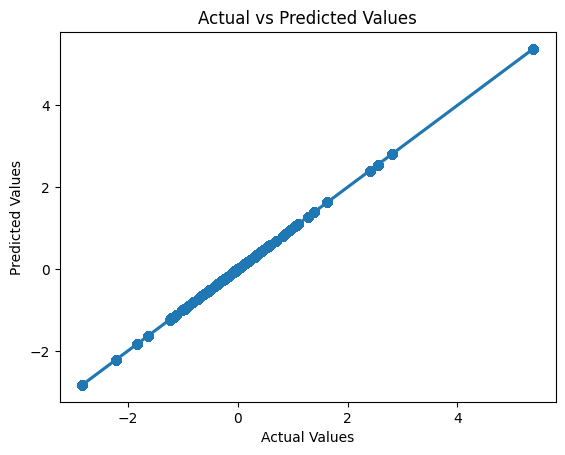

In [68]:
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

## Step 4: Plotting the RandomForest Model

Given the accuracy of the model, next step will be to plot out the forecast for the sales of each restaurant for next year to see if the model performs well. 

In [69]:
# Generate future dataset

# Function to extract features from date column
def extract_date_features(df):
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    return df.drop(columns=['Date'])

# Create a date range for the next year
future_dates = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')
future_features = pd.DataFrame({'Date': future_dates})

# Generate date-related features
future_features = extract_date_features(future_features)

# Define the number of restaurants and other static features
num_restaurants = 6  # Example number of restaurants
num_static_features = 81  # Number of static features excluding date-related ones

# Generate restaurant IDs
restaurant_ids = np.tile(np.arange(num_restaurants), len(future_dates) // num_restaurants + 1)[:len(future_dates)]

# Generate other static features
static_features = np.random.rand(len(future_dates), num_static_features)  # Replace with actual static features

# Combine date features with static features
future_features['RestaurantID'] = restaurant_ids

# Combine with static features
future_features = pd.concat([future_features, pd.DataFrame(static_features)], axis=1)

future_features.columns = future_features.columns.astype(str)

# Ensure the shape matches the training data before PCA
print(future_features.shape)  # Should be (366, 84) if 4 date features + 1 restaurant ID + 80 static features



(366, 86)


In [70]:
# Assuming X is your training data with 86 features
# Fit the scaler and PCA on the training data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(X_standardized)

# Standardize the future features using the same scaler fitted on training data
future_features_standardized = scaler.transform(future_features)

# Apply the PCA transformation to the standardized future features
future_features_pca = pca.transform(future_features_standardized)

# Check the shape to ensure it matches
print(future_features_pca.shape)  # Should have the same number of columns as X_pca_df (87)


(366, 78)


c:\Users\tarad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [71]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_pca, y)  # X_pca is the PCA-transformed training data

# Predict future sales
future_predictions = rf_model.predict(future_features_pca)


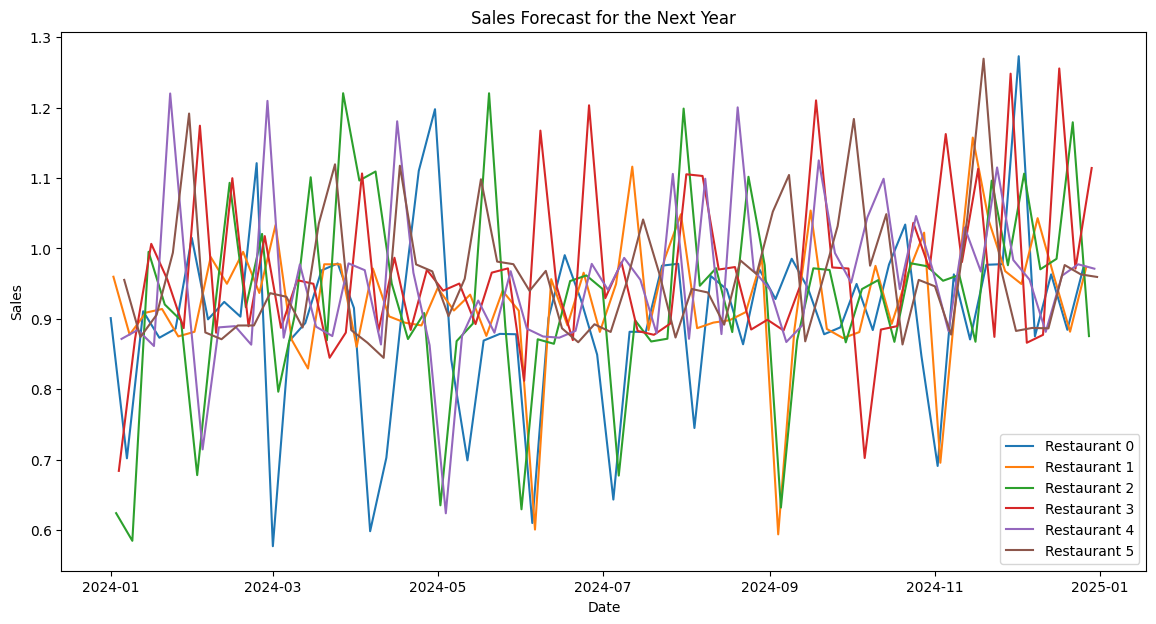

In [72]:
# Create a DataFrame with the predictions
forecast_df = pd.DataFrame({'Date': future_dates, 'Sales': future_predictions})
forecast_df['RestaurantID'] = restaurant_ids


# Plot the forecasted sales
plt.figure(figsize=(14, 7))
for restaurant_id in forecast_df['RestaurantID'].unique():
    restaurant_data = forecast_df[forecast_df['RestaurantID'] == restaurant_id]
    plt.plot(restaurant_data['Date'], restaurant_data['Sales'], label=f'Restaurant {restaurant_id}')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast for the Next Year')
plt.legend()
plt.show()




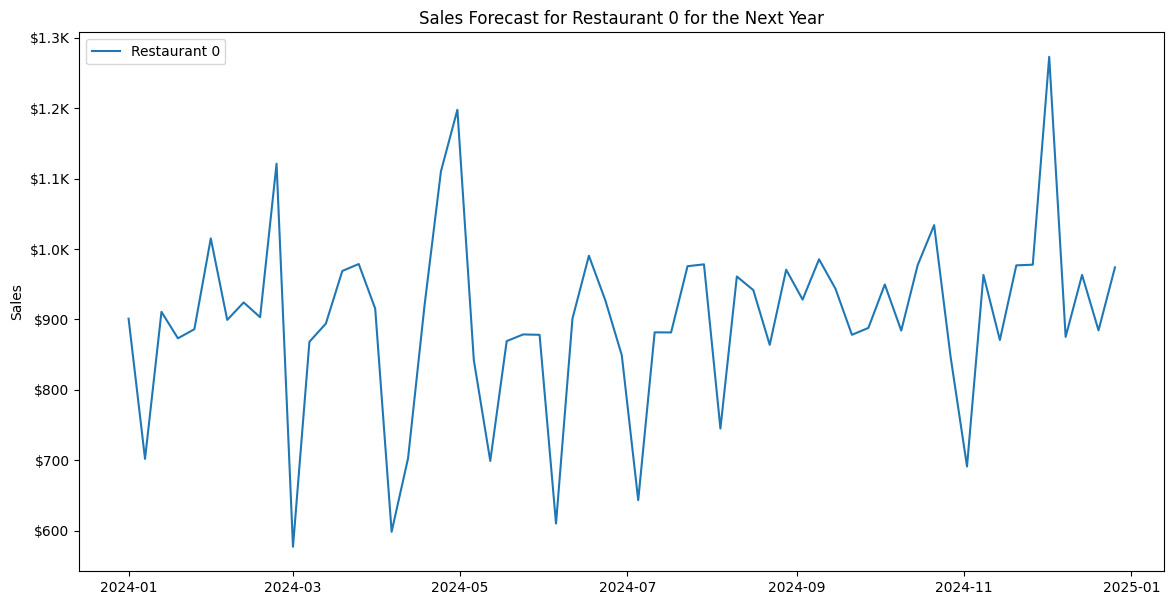

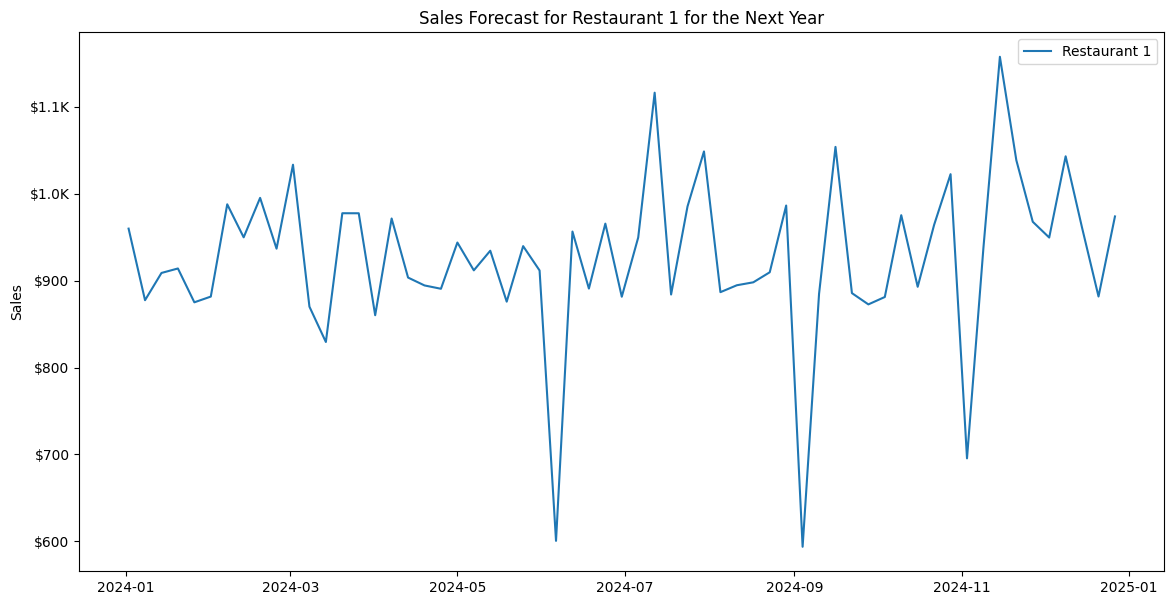

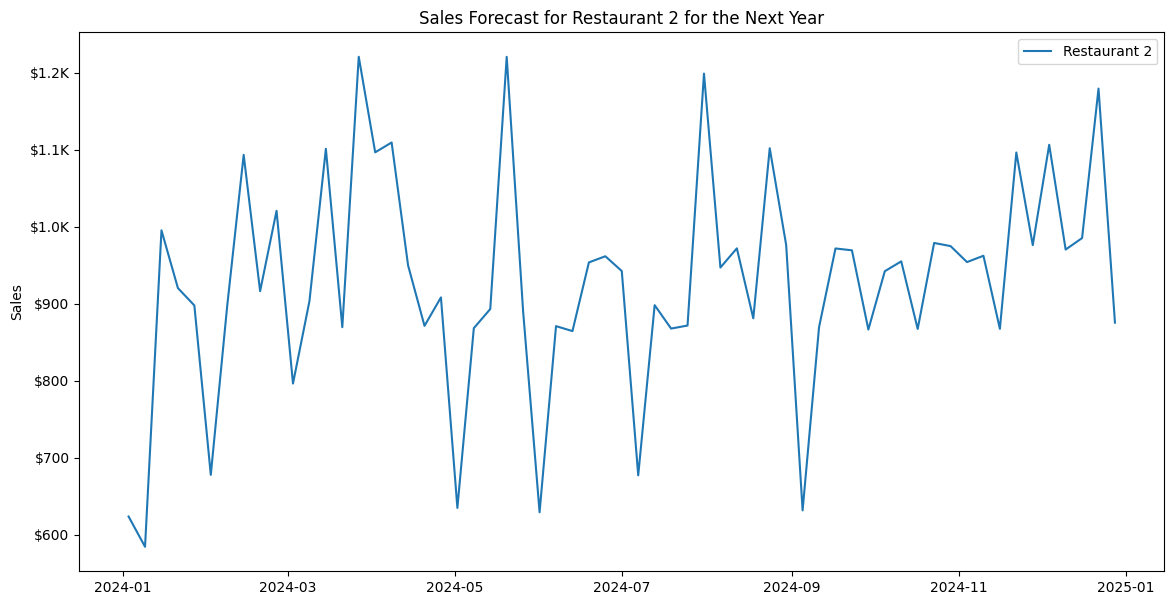

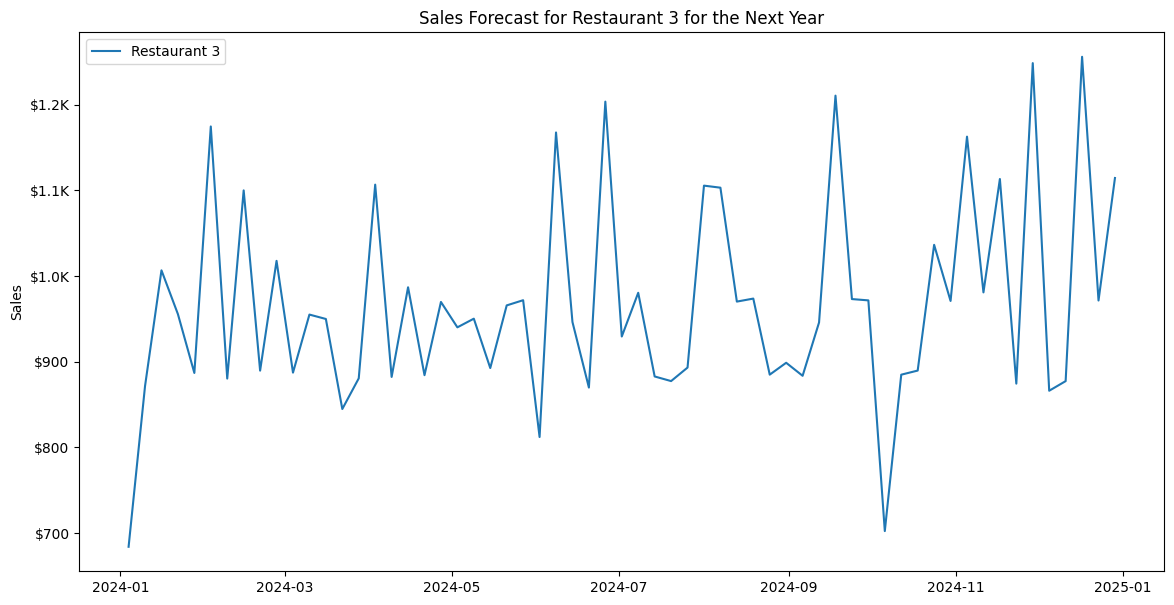

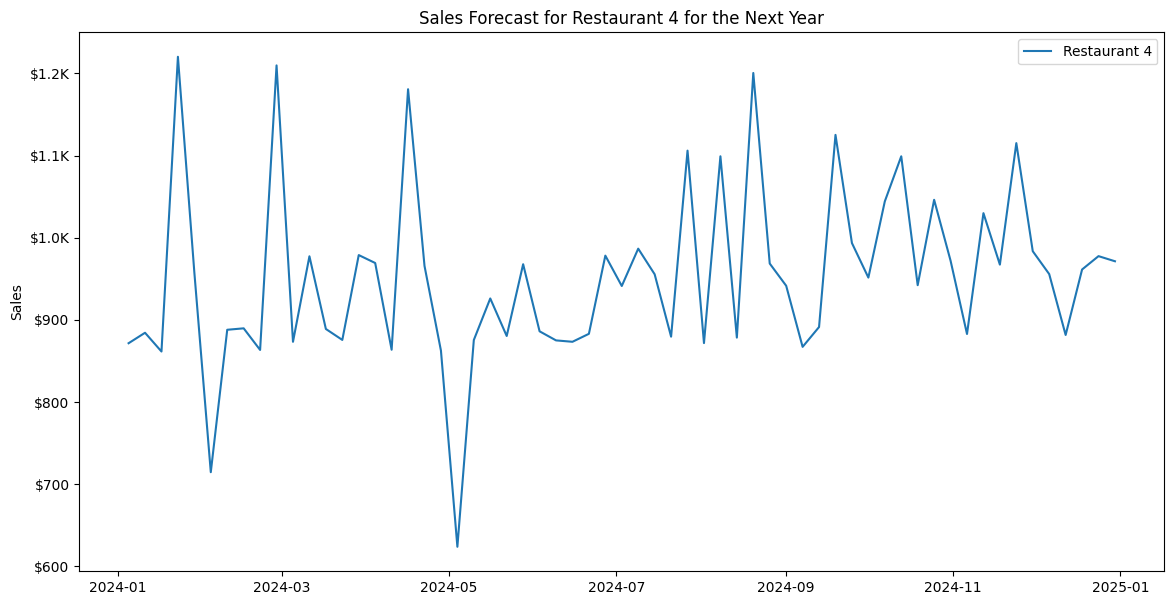

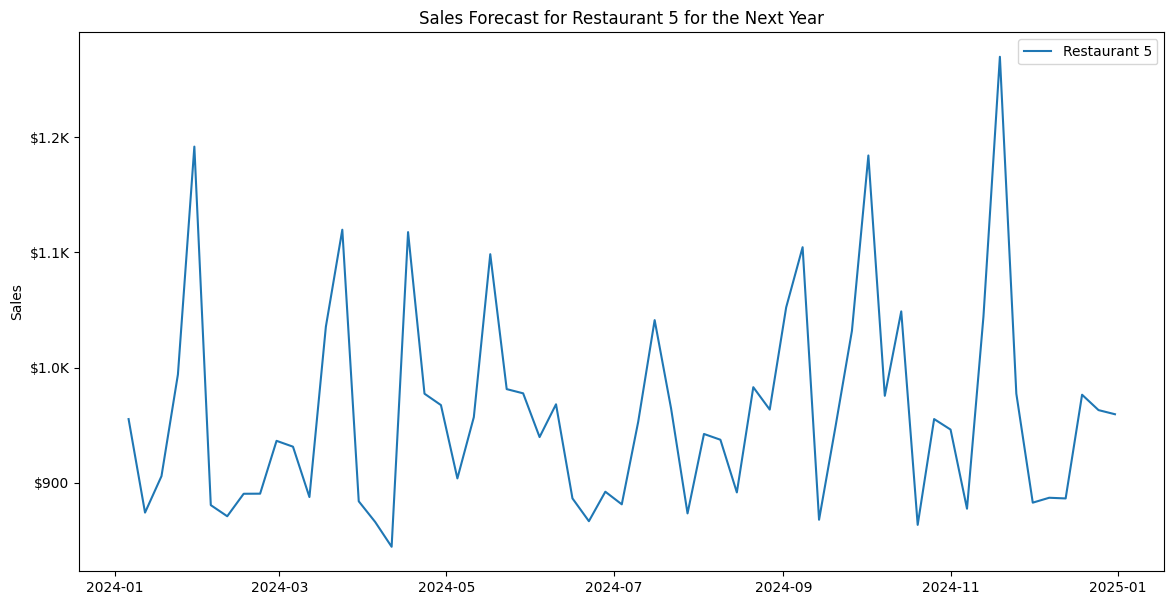

In [77]:
# Plot the restaurants individually

# Define the currency formatter with a print statement for debugging
# def currency(x, pos):
#     'The two args are the value and tick position'
#     print(f'Formatting value: {x}')  # Debugging statement
#     if x >= 1000:
#         return '${:1.1f}K'.format(x*1e-3)  # Adjusted to show one decimal place for thousands
#     else:
#         return '${:1.0f}'.format(x)

# formatter = ticker.FuncFormatter(currency)

# # Plot the forecasted sales for each restaurant individually
# unique_restaurants = forecast_df['RestaurantID'].unique()

# for restaurant_id in unique_restaurants:
#     plt.figure(figsize=(14, 7))
#     restaurant_data = forecast_df[forecast_df['RestaurantID'] == restaurant_id]
    
#     # Print the sales values for debugging
#     print(f'Restaurant {restaurant_id} Sales: {restaurant_data["Sales"].values}')
    
#     plt.plot(restaurant_data['Date'], restaurant_data['Sales'], label=f'Restaurant {restaurant_id}')
    
#     # Format the y-axis as currency
#     ax = plt.gca()
#     ax.yaxis.set_major_formatter(formatter)
    
#     plt.xlabel('Date')
#     plt.ylabel('Sales')
#     plt.title(f'Sales Forecast for Restaurant {restaurant_id} for the Next Year')
#     plt.legend()
#     plt.show()


# Scale factor to adjust the values
scale_factor = 1000

# Define the currency formatter
def currency(x, pos):
    'The two args are the value and tick position'
    if x >= 1000:
        return '${:1.1f}K'.format(x*1e-3)  # Thousands
    else:
        return '${:1.0f}'.format(x)

formatter = ticker.FuncFormatter(currency)

# Create a DataFrame with the predictions
forecast_df = pd.DataFrame({'Date': future_dates, 'Sales': future_predictions * scale_factor})
forecast_df['RestaurantID'] = restaurant_ids  # Adjust based on your static feature

# Ensure Sales column is numeric for plotting purposes
forecast_df['Sales'] = forecast_df['Sales'].astype(float)

# Plot the forecasted sales for each restaurant individually
unique_restaurants = forecast_df['RestaurantID'].unique()

for restaurant_id in unique_restaurants:
    plt.figure(figsize=(14, 7))
    restaurant_data = forecast_df[forecast_df['RestaurantID'] == restaurant_id]
    
    plt.plot(restaurant_data['Date'], restaurant_data['Sales'], label=f'Restaurant {restaurant_id}')
    
    # Format the y-axis as currency
    ax = plt.gca()
    ax.yaxis.set_major_formatter(formatter)
    
    plt.xlabel
    plt.ylabel('Sales')
    plt.title(f'Sales Forecast for Restaurant {restaurant_id} for the Next Year')
    plt.legend()
    plt.show()


